> **DO NOT EDIT IF INSIDE annadl_f19 folder**


# Keras, overfitting, regularlization

- Part 3.1: Basic Keras
- Part 3.2: Regularization and overfitting

[**Feedback**]((https://ulfaslak.com/vent))

In [1]:
%matplotlib inline
%load_ext tensorboard
import matplotlib.pylab as plt
import numpy as np
import keras
import datetime
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


## Exercises

### Part 3.1: Basic Keras

> **Ex. 3.1.1** Let's get started with Keras by working with an actual neural network.
1. Implement a very simple `Sequential` model using [*Getting started with the Keras Sequential model*](https://keras.io/getting-started/sequential-model-guide/) as a guide.
2. Fit it to the [mnist](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset of handwritten digits that I have prepared below.
3. Compute the accuracy on the test set using the `evaluate` function.
4. BONUS: Can you score over 90% accuracy in just five training epochs?

In [2]:
(x, y), _ = keras.datasets.mnist.load_data()

# Reshape each image to 1dim vector. Effectively, reshape
# `x_train` from (60000, 28, 28) to (60000, 28*28)
x_train = x[:50000].reshape(-1, 28*28)
x_test = x[50000:].reshape(-1, 28*28)

# Convert y_train from vector of labels to one-hot encoding vector
y = keras.utils.to_categorical(y, num_classes=10)
y_train = y[:50000]
y_test = y[50000:]

In [3]:
#build model

image_size = 784 # 28*28 pixel input
num_classes = 10 # ten unique digits

model = Sequential()

#building layers
model.add(Dense(units=32, activation='sigmoid', input_dim = image_size))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()



model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy','mse'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [4]:
#train
hist = model.fit(x_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
50000/50000 [==============================] - 1s 30us/step - loss: 0.0896 - accuracy: 0.1891 - mse: 0.0896
Epoch 2/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0802 - accuracy: 0.3758 - mse: 0.0802
Epoch 3/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0720 - accuracy: 0.5307 - mse: 0.0720
Epoch 4/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0655 - accuracy: 0.6240 - mse: 0.0655
Epoch 5/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0601 - accuracy: 0.6640 - mse: 0.0601
Epoch 6/100
50000/50000 [==============================] - 1s 28us/step - loss: 0.0561 - accuracy: 0.6899 - mse: 0.0561
Epoch 7/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0527 - accuracy: 0.7106 - mse: 0.0527
Epoch 8/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0496 - accuracy: 0.7328 - mse: 0.0496
Epoch 9/100
50000/50000 [===============

50000/50000 [==============================] - 1s 24us/step - loss: 0.0160 - accuracy: 0.9072 - mse: 0.0160
Epoch 69/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0159 - accuracy: 0.9072 - mse: 0.0159
Epoch 70/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.0158 - accuracy: 0.9081 - mse: 0.0158
Epoch 71/100
50000/50000 [==============================] - 1s 27us/step - loss: 0.0157 - accuracy: 0.9091 - mse: 0.0157
Epoch 72/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0156 - accuracy: 0.9095 - mse: 0.0156
Epoch 73/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0155 - accuracy: 0.9101 - mse: 0.0155
Epoch 74/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0154 - accuracy: 0.9105 - mse: 0.0154
Epoch 75/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.0154 - accuracy: 0.9109 - mse: 0.0154
Epoch 76/100
50000/50000 [===================

In [5]:
#evaluate
metrics = model.evaluate(x_test, y_test)

print("loss, accuracy, mse")
print(metrics)

10000/10000 [==============================] - 0s 20us/step
loss, accuracy, mse
[0.014747582766786218, 0.9071999788284302, 0.01474758144468069]


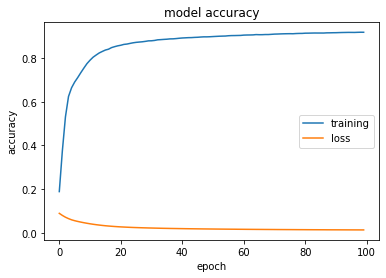

In [6]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'loss'], loc='best')
plt.show()

> **Ex. 3.1.2** One of the coolest features we get basically for free when using Keras with the Tensorflow backend is the **Tensorboard**.
It allows us to visualize training and test curves, our network graph, and more, in an interactive format.
Below I have implemented a simple linear regression, adapt and launch a visualization of the training performance.

In [7]:
x = np.linspace(-1, 1, 101)
y = 3 * x + np.random.randn(*x.shape) * 0.33

model = Sequential()

model.add(Dense(input_dim=1, units=1,  bias_initializer='uniform', activation='linear'))

In [8]:
log_dir="./logs/ex1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

In [9]:
model.compile(optimizer='sgd', 
              loss='mse',
              metrics=['accuracy','mse']
             )

model.fit(x, y, epochs=200, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/200
101/101 [==============================] - 0s 639us/step - loss: 0.8645 - accuracy: 0.0000e+00 - mse: 0.8645
Epoch 2/200
101/101 [==============================] - 0s 39us/step - loss: 0.8225 - accuracy: 0.0000e+00 - mse: 0.8225
Epoch 3/200
101/101 [==============================] - 0s 41us/step - loss: 0.7886 - accuracy: 0.0000e+00 - mse: 0.7886
Epoch 4/200
101/101 [==============================] - 0s 56us/step - loss: 0.7504 - accuracy: 0.0000e+00 - mse: 0.7504
Epoch 5/200
101/101 [==============================] - 0s 52us/step - loss: 0.7146 - accuracy: 0.0000e+00 - mse: 0.7146
Epoch 6/200
101/101 [==============================] - 0s 57us/step - loss: 0.6791 - accuracy: 0.0000e+00 - mse: 0.6791
Epoch 7/200
101/101 [==============================] - 0s 64us/step - loss: 0.6470 - accuracy: 0.0000e+00 - mse: 0.6470
Epoch 8/200
101/101 [==============================] - 0s 47us/step - loss: 0.6192 - accuracy: 0.0000e+00 - mse: 0.6192
Epoch 9/200
101/101 [==================

101/101 [==============================] - 0s 47us/step - loss: 0.1271 - accuracy: 0.0000e+00 - mse: 0.1271
Epoch 69/200
101/101 [==============================] - 0s 46us/step - loss: 0.1256 - accuracy: 0.0000e+00 - mse: 0.1256
Epoch 70/200
101/101 [==============================] - ETA: 0s - loss: 0.1303 - accuracy: 0.0000e+00 - mse: 0.13 - 0s 37us/step - loss: 0.1245 - accuracy: 0.0000e+00 - mse: 0.1245
Epoch 71/200
101/101 [==============================] - 0s 48us/step - loss: 0.1236 - accuracy: 0.0000e+00 - mse: 0.1236
Epoch 72/200
101/101 [==============================] - 0s 42us/step - loss: 0.1228 - accuracy: 0.0000e+00 - mse: 0.1228
Epoch 73/200
101/101 [==============================] - 0s 59us/step - loss: 0.1217 - accuracy: 0.0000e+00 - mse: 0.1217
Epoch 74/200
101/101 [==============================] - 0s 38us/step - loss: 0.1208 - accuracy: 0.0000e+00 - mse: 0.1208
Epoch 75/200
101/101 [==============================] - 0s 53us/step - loss: 0.1200 - accuracy: 0.0000e+00

101/101 [==============================] - 0s 55us/step - loss: 0.1063 - accuracy: 0.0000e+00 - mse: 0.1063
Epoch 136/200
101/101 [==============================] - 0s 53us/step - loss: 0.1063 - accuracy: 0.0000e+00 - mse: 0.1063
Epoch 137/200
101/101 [==============================] - 0s 48us/step - loss: 0.1061 - accuracy: 0.0000e+00 - mse: 0.1061
Epoch 138/200
101/101 [==============================] - 0s 51us/step - loss: 0.1061 - accuracy: 0.0000e+00 - mse: 0.1061
Epoch 139/200
101/101 [==============================] - 0s 47us/step - loss: 0.1063 - accuracy: 0.0000e+00 - mse: 0.1063
Epoch 140/200
101/101 [==============================] - 0s 47us/step - loss: 0.1063 - accuracy: 0.0000e+00 - mse: 0.1063
Epoch 141/200
101/101 [==============================] - 0s 37us/step - loss: 0.1063 - accuracy: 0.0000e+00 - mse: 0.1063
Epoch 142/200
101/101 [==============================] - 0s 53us/step - loss: 0.1060 - accuracy: 0.0000e+00 - mse: 0.1060
Epoch 143/200
101/101 [===============

In [10]:
%tensorboard --logdir logs/ex1

> **Ex. 3.1.3** Solve exercises 1.2.2 and 1.2.3 from week 1, but solve them using Keras.
> Comment on differences in speed (and outcome if you observe any).
You can for example use Tensorboard to inspect the training performance throught the training epochs.

In [11]:
# generate data

def generate_X_linear(N=200):
    X = np.vstack([
        np.random.normal([-2, -2], 1, size=(int(N/2), 2)),
        np.random.normal([2, 2], 1, size=(int(N/2), 2))
    ])

    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y

def generate_X_nonlinear(N=200, R=5):
    X_inner = np.random.normal([0, 0], 1, size=(int(N/2), 2))

    X_outer = np.array([
        [R*np.cos(theta), R*np.sin(theta)]
        for theta in np.linspace(0, 2 * np.pi, int(N/2))
    ]) + np.random.randn(int(N/2), 2)

    X = np.vstack([X_inner, X_outer])
    y = np.array([0] * int(N/2) + [1] * int(N/2)).reshape(-1, 1)
    
    return X, y



x, y = generate_X_linear()
x_nl, y_nl = generate_X_nonlinear()

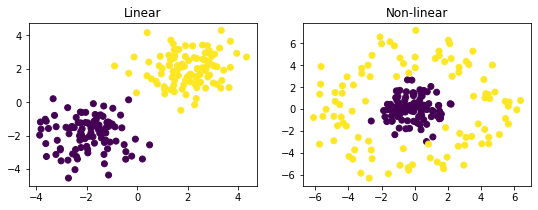

In [12]:
# visualize data
plt.figure(figsize=(9, 3))

plt.subplot(1, 2, 1)
plt.title("Linear", fontsize=12)
plt.scatter(x[:, 0], x[:, 1], c=list(y.reshape(-1)))

plt.subplot(1, 2, 2)
plt.title("Non-linear", fontsize=12)
plt.scatter(x_nl[:, 0], x_nl[:, 1], c=list(y.reshape(-1)))

plt.show()

In [13]:
#Linear data
model = Sequential()

#building layers
model.add(Dense(units=1, activation='sigmoid', input_dim = 2))
model.summary()

model.compile(loss='mse',
              optimizer='sgd',
              metrics=['accuracy','mse'])

log_dir="./logs/ex2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [14]:
#train
hist = model.fit(x, y, epochs=100, batch_size=50, callbacks=[tensorboard_callback])

Epoch 1/100
200/200 [==============================] - 0s 200us/step - loss: 0.8525 - accuracy: 0.0100 - mse: 0.8525
Epoch 2/100
200/200 [==============================] - 0s 26us/step - loss: 0.8501 - accuracy: 0.0100 - mse: 0.8501
Epoch 3/100
200/200 [==============================] - 0s 21us/step - loss: 0.8476 - accuracy: 0.0100 - mse: 0.8476
Epoch 4/100
200/200 [==============================] - 0s 19us/step - loss: 0.8451 - accuracy: 0.0100 - mse: 0.8451
Epoch 5/100
200/200 [==============================] - 0s 22us/step - loss: 0.8425 - accuracy: 0.0100 - mse: 0.8425
Epoch 6/100
200/200 [==============================] - 0s 19us/step - loss: 0.8398 - accuracy: 0.0100 - mse: 0.8398
Epoch 7/100
200/200 [==============================] - 0s 18us/step - loss: 0.8369 - accuracy: 0.0100 - mse: 0.8369
Epoch 8/100
200/200 [==============================] - 0s 21us/step - loss: 0.8340 - accuracy: 0.0100 - mse: 0.8340
Epoch 9/100
200/200 [==============================] - 0s 19us/step - l

200/200 [==============================] - 0s 25us/step - loss: 0.1924 - accuracy: 0.7450 - mse: 0.1924
Epoch 72/100
200/200 [==============================] - 0s 34us/step - loss: 0.1842 - accuracy: 0.7650 - mse: 0.1842
Epoch 73/100
200/200 [==============================] - 0s 29us/step - loss: 0.1766 - accuracy: 0.7750 - mse: 0.1766
Epoch 74/100
200/200 [==============================] - 0s 33us/step - loss: 0.1694 - accuracy: 0.7800 - mse: 0.1694
Epoch 75/100
200/200 [==============================] - 0s 29us/step - loss: 0.1626 - accuracy: 0.7850 - mse: 0.1626
Epoch 76/100
200/200 [==============================] - 0s 44us/step - loss: 0.1563 - accuracy: 0.8050 - mse: 0.1563
Epoch 77/100
200/200 [==============================] - 0s 33us/step - loss: 0.1503 - accuracy: 0.8150 - mse: 0.1503
Epoch 78/100
200/200 [==============================] - 0s 28us/step - loss: 0.1447 - accuracy: 0.8300 - mse: 0.1447
Epoch 79/100
200/200 [==============================] - 0s 70us/step - loss: 

In [15]:
%tensorboard --logdir logs/ex2

In [16]:
#Linear data
nl_model = Sequential()

#building layers
nl_model.add(Dense(units=2, activation='sigmoid', input_dim = 2))
nl_model.add(Dense(units=3, activation='sigmoid'))
nl_model.add(Dense(units=1, activation='sigmoid'))
nl_model.summary()


sgd = tf.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

nl_model.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy','mse'])

log_dir="./logs/ex3/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [17]:
#train
hist = nl_model.fit(x_nl, y_nl, epochs=1000, batch_size=4, callbacks=[tensorboard_callback])

Epoch 1/1000
200/200 [==============================] - 0s 492us/step - loss: 0.2503 - accuracy: 0.5000 - mse: 0.2503
Epoch 2/1000
200/200 [==============================] - 0s 280us/step - loss: 0.2502 - accuracy: 0.4900 - mse: 0.2502
Epoch 3/1000
200/200 [==============================] - 0s 258us/step - loss: 0.2502 - accuracy: 0.4500 - mse: 0.2502
Epoch 4/1000
200/200 [==============================] - 0s 203us/step - loss: 0.2500 - accuracy: 0.5000 - mse: 0.2500
Epoch 5/1000
200/200 [==============================] - 0s 204us/step - loss: 0.2500 - accuracy: 0.3600 - mse: 0.2500
Epoch 6/1000
200/200 [==============================] - 0s 255us/step - loss: 0.2501 - accuracy: 0.4300 - mse: 0.2501
Epoch 7/1000
200/200 [==============================] - 0s 219us/step - loss: 0.2500 - accuracy: 0.4050 - mse: 0.2500
Epoch 8/1000
200/200 [==============================] - 0s 199us/step - loss: 0.2500 - accuracy: 0.3950 - mse: 0.2500
Epoch 9/1000
200/200 [==============================] - 

200/200 [==============================] - 0s 189us/step - loss: 0.2499 - accuracy: 0.5500 - mse: 0.2499
Epoch 70/1000
200/200 [==============================] - 0s 202us/step - loss: 0.2498 - accuracy: 0.5200 - mse: 0.2498
Epoch 71/1000
200/200 [==============================] - 0s 199us/step - loss: 0.2499 - accuracy: 0.5100 - mse: 0.2499
Epoch 72/1000
200/200 [==============================] - 0s 202us/step - loss: 0.2499 - accuracy: 0.5150 - mse: 0.2499
Epoch 73/1000
200/200 [==============================] - 0s 189us/step - loss: 0.2499 - accuracy: 0.4650 - mse: 0.2499
Epoch 74/1000
200/200 [==============================] - 0s 194us/step - loss: 0.2499 - accuracy: 0.4400 - mse: 0.2499
Epoch 75/1000
200/200 [==============================] - 0s 164us/step - loss: 0.2499 - accuracy: 0.5050 - mse: 0.2499
Epoch 76/1000
200/200 [==============================] - 0s 201us/step - loss: 0.2498 - accuracy: 0.4950 - mse: 0.2498
Epoch 77/1000
200/200 [==============================] - 0s 18

200/200 [==============================] - 0s 184us/step - loss: 0.2498 - accuracy: 0.5250 - mse: 0.2498
Epoch 136/1000
200/200 [==============================] - 0s 208us/step - loss: 0.2498 - accuracy: 0.4850 - mse: 0.2498
Epoch 137/1000
200/200 [==============================] - 0s 174us/step - loss: 0.2498 - accuracy: 0.5100 - mse: 0.2498
Epoch 138/1000
200/200 [==============================] - 0s 203us/step - loss: 0.2498 - accuracy: 0.4850 - mse: 0.2498
Epoch 139/1000
200/200 [==============================] - 0s 200us/step - loss: 0.2498 - accuracy: 0.5250 - mse: 0.2498
Epoch 140/1000
200/200 [==============================] - 0s 202us/step - loss: 0.2498 - accuracy: 0.5150 - mse: 0.2498
Epoch 141/1000
200/200 [==============================] - 0s 190us/step - loss: 0.2498 - accuracy: 0.4850 - mse: 0.2498
Epoch 142/1000
200/200 [==============================] - 0s 188us/step - loss: 0.2498 - accuracy: 0.5100 - mse: 0.2498
Epoch 143/1000
200/200 [==============================]

200/200 [==============================] - 0s 198us/step - loss: 0.2497 - accuracy: 0.4900 - mse: 0.2497
Epoch 203/1000
200/200 [==============================] - 0s 201us/step - loss: 0.2497 - accuracy: 0.5600 - mse: 0.2497
Epoch 204/1000
200/200 [==============================] - 0s 172us/step - loss: 0.2497 - accuracy: 0.4900 - mse: 0.2497
Epoch 205/1000
200/200 [==============================] - 0s 195us/step - loss: 0.2497 - accuracy: 0.5750 - mse: 0.2497
Epoch 206/1000
200/200 [==============================] - 0s 183us/step - loss: 0.2496 - accuracy: 0.4800 - mse: 0.2496
Epoch 207/1000
200/200 [==============================] - 0s 205us/step - loss: 0.2496 - accuracy: 0.5700 - mse: 0.2496
Epoch 208/1000
200/200 [==============================] - 0s 173us/step - loss: 0.2496 - accuracy: 0.5200 - mse: 0.2496
Epoch 209/1000
200/200 [==============================] - 0s 198us/step - loss: 0.2497 - accuracy: 0.5150 - mse: 0.2497
Epoch 210/1000
200/200 [==============================]

200/200 [==============================] - 0s 211us/step - loss: 0.2495 - accuracy: 0.5800 - mse: 0.2495
Epoch 270/1000
200/200 [==============================] - 0s 229us/step - loss: 0.2495 - accuracy: 0.4950 - mse: 0.2495
Epoch 271/1000
200/200 [==============================] - 0s 206us/step - loss: 0.2495 - accuracy: 0.5350 - mse: 0.2495
Epoch 272/1000
200/200 [==============================] - 0s 219us/step - loss: 0.2495 - accuracy: 0.5750 - mse: 0.2495
Epoch 273/1000
200/200 [==============================] - 0s 219us/step - loss: 0.2495 - accuracy: 0.5550 - mse: 0.2495
Epoch 274/1000
200/200 [==============================] - 0s 210us/step - loss: 0.2495 - accuracy: 0.4950 - mse: 0.2495
Epoch 275/1000
200/200 [==============================] - 0s 200us/step - loss: 0.2495 - accuracy: 0.5200 - mse: 0.2495
Epoch 276/1000
200/200 [==============================] - 0s 177us/step - loss: 0.2495 - accuracy: 0.5150 - mse: 0.2495
Epoch 277/1000
200/200 [==============================]

200/200 [==============================] - 0s 201us/step - loss: 0.2493 - accuracy: 0.6100 - mse: 0.2493
Epoch 338/1000
200/200 [==============================] - 0s 195us/step - loss: 0.2493 - accuracy: 0.5700 - mse: 0.2493
Epoch 339/1000
200/200 [==============================] - 0s 186us/step - loss: 0.2493 - accuracy: 0.5300 - mse: 0.2493
Epoch 340/1000
200/200 [==============================] - 0s 194us/step - loss: 0.2493 - accuracy: 0.4950 - mse: 0.2493
Epoch 341/1000
200/200 [==============================] - 0s 237us/step - loss: 0.2493 - accuracy: 0.5450 - mse: 0.2493
Epoch 342/1000
200/200 [==============================] - 0s 230us/step - loss: 0.2493 - accuracy: 0.5500 - mse: 0.2493
Epoch 343/1000
200/200 [==============================] - 0s 180us/step - loss: 0.2493 - accuracy: 0.5100 - mse: 0.2493
Epoch 344/1000
200/200 [==============================] - 0s 214us/step - loss: 0.2492 - accuracy: 0.5350 - mse: 0.2492
Epoch 345/1000
200/200 [==============================]

200/200 [==============================] - 0s 172us/step - loss: 0.2490 - accuracy: 0.5800 - mse: 0.2490
Epoch 405/1000
200/200 [==============================] - 0s 196us/step - loss: 0.2490 - accuracy: 0.5350 - mse: 0.2490
Epoch 406/1000
200/200 [==============================] - 0s 188us/step - loss: 0.2489 - accuracy: 0.5750 - mse: 0.2489
Epoch 407/1000
200/200 [==============================] - 0s 183us/step - loss: 0.2490 - accuracy: 0.5600 - mse: 0.2490
Epoch 408/1000
200/200 [==============================] - 0s 202us/step - loss: 0.2489 - accuracy: 0.5700 - mse: 0.2489
Epoch 409/1000
200/200 [==============================] - 0s 181us/step - loss: 0.2489 - accuracy: 0.5800 - mse: 0.2489
Epoch 410/1000
200/200 [==============================] - 0s 209us/step - loss: 0.2489 - accuracy: 0.5800 - mse: 0.2489
Epoch 411/1000
200/200 [==============================] - 0s 185us/step - loss: 0.2490 - accuracy: 0.5450 - mse: 0.2490
Epoch 412/1000
200/200 [==============================]

200/200 [==============================] - 0s 177us/step - loss: 0.2486 - accuracy: 0.5500 - mse: 0.2486
Epoch 472/1000
200/200 [==============================] - 0s 206us/step - loss: 0.2486 - accuracy: 0.5850 - mse: 0.2486
Epoch 473/1000
200/200 [==============================] - 0s 181us/step - loss: 0.2485 - accuracy: 0.5950 - mse: 0.2485
Epoch 474/1000
200/200 [==============================] - 0s 194us/step - loss: 0.2486 - accuracy: 0.6050 - mse: 0.2486
Epoch 475/1000
200/200 [==============================] - 0s 200us/step - loss: 0.2485 - accuracy: 0.5550 - mse: 0.2485
Epoch 476/1000
200/200 [==============================] - 0s 197us/step - loss: 0.2485 - accuracy: 0.5750 - mse: 0.2485
Epoch 477/1000
200/200 [==============================] - 0s 193us/step - loss: 0.2485 - accuracy: 0.5500 - mse: 0.2485
Epoch 478/1000
200/200 [==============================] - 0s 199us/step - loss: 0.2485 - accuracy: 0.6000 - mse: 0.2485
Epoch 479/1000
200/200 [==============================]

200/200 [==============================] - 0s 198us/step - loss: 0.2480 - accuracy: 0.5850 - mse: 0.2480
Epoch 539/1000
200/200 [==============================] - 0s 192us/step - loss: 0.2480 - accuracy: 0.5950 - mse: 0.2480
Epoch 540/1000
200/200 [==============================] - 0s 182us/step - loss: 0.2480 - accuracy: 0.5950 - mse: 0.2480
Epoch 541/1000
200/200 [==============================] - 0s 184us/step - loss: 0.2479 - accuracy: 0.5650 - mse: 0.2479
Epoch 542/1000
200/200 [==============================] - 0s 199us/step - loss: 0.2479 - accuracy: 0.5450 - mse: 0.2479
Epoch 543/1000
200/200 [==============================] - 0s 186us/step - loss: 0.2479 - accuracy: 0.5700 - mse: 0.2479
Epoch 544/1000
200/200 [==============================] - 0s 183us/step - loss: 0.2479 - accuracy: 0.6050 - mse: 0.2479
Epoch 545/1000
200/200 [==============================] - 0s 196us/step - loss: 0.2479 - accuracy: 0.6150 - mse: 0.2479
Epoch 546/1000
200/200 [==============================]

Epoch 605/1000
200/200 [==============================] - 0s 195us/step - loss: 0.2471 - accuracy: 0.6250 - mse: 0.2471
Epoch 606/1000
200/200 [==============================] - 0s 182us/step - loss: 0.2472 - accuracy: 0.6200 - mse: 0.2472
Epoch 607/1000
200/200 [==============================] - 0s 186us/step - loss: 0.2471 - accuracy: 0.5950 - mse: 0.2471
Epoch 608/1000
200/200 [==============================] - 0s 180us/step - loss: 0.2471 - accuracy: 0.6050 - mse: 0.2471
Epoch 609/1000
200/200 [==============================] - 0s 197us/step - loss: 0.2471 - accuracy: 0.6000 - mse: 0.2471
Epoch 610/1000
200/200 [==============================] - 0s 207us/step - loss: 0.2471 - accuracy: 0.6250 - mse: 0.2471
Epoch 611/1000
200/200 [==============================] - 0s 201us/step - loss: 0.2470 - accuracy: 0.6000 - mse: 0.2470
Epoch 612/1000
200/200 [==============================] - 0s 172us/step - loss: 0.2470 - accuracy: 0.6100 - mse: 0.2470
Epoch 613/1000
200/200 [================

200/200 [==============================] - 0s 198us/step - loss: 0.2459 - accuracy: 0.6150 - mse: 0.2459
Epoch 674/1000
200/200 [==============================] - 0s 186us/step - loss: 0.2459 - accuracy: 0.6000 - mse: 0.2459
Epoch 675/1000
200/200 [==============================] - 0s 176us/step - loss: 0.2459 - accuracy: 0.6100 - mse: 0.2459
Epoch 676/1000
200/200 [==============================] - 0s 194us/step - loss: 0.2459 - accuracy: 0.6150 - mse: 0.2459
Epoch 677/1000
200/200 [==============================] - 0s 205us/step - loss: 0.2458 - accuracy: 0.6100 - mse: 0.2458
Epoch 678/1000
200/200 [==============================] - 0s 201us/step - loss: 0.2458 - accuracy: 0.6100 - mse: 0.2458
Epoch 679/1000
200/200 [==============================] - 0s 202us/step - loss: 0.2458 - accuracy: 0.6150 - mse: 0.2458
Epoch 680/1000
200/200 [==============================] - 0s 196us/step - loss: 0.2458 - accuracy: 0.6100 - mse: 0.2458
Epoch 681/1000
200/200 [==============================]

200/200 [==============================] - 0s 226us/step - loss: 0.2443 - accuracy: 0.6200 - mse: 0.2443
Epoch 742/1000
200/200 [==============================] - 0s 217us/step - loss: 0.2442 - accuracy: 0.6250 - mse: 0.2442
Epoch 743/1000
200/200 [==============================] - 0s 201us/step - loss: 0.2442 - accuracy: 0.6150 - mse: 0.2442
Epoch 744/1000
200/200 [==============================] - 0s 208us/step - loss: 0.2442 - accuracy: 0.6200 - mse: 0.2442
Epoch 745/1000
200/200 [==============================] - 0s 209us/step - loss: 0.2441 - accuracy: 0.6200 - mse: 0.2441
Epoch 746/1000
200/200 [==============================] - 0s 200us/step - loss: 0.2441 - accuracy: 0.6200 - mse: 0.2441
Epoch 747/1000
200/200 [==============================] - 0s 232us/step - loss: 0.2441 - accuracy: 0.6250 - mse: 0.2441
Epoch 748/1000
200/200 [==============================] - 0s 327us/step - loss: 0.2440 - accuracy: 0.6200 - mse: 0.2440
Epoch 749/1000
200/200 [==============================]

200/200 [==============================] - 0s 226us/step - loss: 0.2418 - accuracy: 0.6300 - mse: 0.2418
Epoch 810/1000
200/200 [==============================] - 0s 224us/step - loss: 0.2419 - accuracy: 0.6250 - mse: 0.2419
Epoch 811/1000
200/200 [==============================] - 0s 252us/step - loss: 0.2418 - accuracy: 0.6350 - mse: 0.2418
Epoch 812/1000
200/200 [==============================] - 0s 247us/step - loss: 0.2418 - accuracy: 0.6250 - mse: 0.2418
Epoch 813/1000
200/200 [==============================] - 0s 259us/step - loss: 0.2417 - accuracy: 0.6350 - mse: 0.2417
Epoch 814/1000
200/200 [==============================] - 0s 256us/step - loss: 0.2417 - accuracy: 0.6300 - mse: 0.2417
Epoch 815/1000
200/200 [==============================] - 0s 217us/step - loss: 0.2416 - accuracy: 0.6350 - mse: 0.2416
Epoch 816/1000
200/200 [==============================] - 0s 180us/step - loss: 0.2417 - accuracy: 0.6250 - mse: 0.2417
Epoch 817/1000
200/200 [==============================]

200/200 [==============================] - 0s 219us/step - loss: 0.2388 - accuracy: 0.6450 - mse: 0.2388
Epoch 878/1000
200/200 [==============================] - 0s 202us/step - loss: 0.2388 - accuracy: 0.6300 - mse: 0.2388
Epoch 879/1000
200/200 [==============================] - 0s 174us/step - loss: 0.2388 - accuracy: 0.6400 - mse: 0.2388
Epoch 880/1000
200/200 [==============================] - 0s 183us/step - loss: 0.2387 - accuracy: 0.6400 - mse: 0.2387
Epoch 881/1000
200/200 [==============================] - 0s 192us/step - loss: 0.2387 - accuracy: 0.6400 - mse: 0.2387
Epoch 882/1000
200/200 [==============================] - 0s 187us/step - loss: 0.2386 - accuracy: 0.6400 - mse: 0.2386
Epoch 883/1000
200/200 [==============================] - 0s 194us/step - loss: 0.2386 - accuracy: 0.6250 - mse: 0.2386
Epoch 884/1000
200/200 [==============================] - 0s 206us/step - loss: 0.2386 - accuracy: 0.6500 - mse: 0.2386
Epoch 885/1000
200/200 [==============================]

200/200 [==============================] - 0s 256us/step - loss: 0.2352 - accuracy: 0.6600 - mse: 0.2352
Epoch 946/1000
200/200 [==============================] - 0s 197us/step - loss: 0.2351 - accuracy: 0.6600 - mse: 0.2351
Epoch 947/1000
200/200 [==============================] - 0s 209us/step - loss: 0.2351 - accuracy: 0.6600 - mse: 0.2351
Epoch 948/1000
200/200 [==============================] - 0s 211us/step - loss: 0.2350 - accuracy: 0.6650 - mse: 0.2350
Epoch 949/1000
200/200 [==============================] - 0s 200us/step - loss: 0.2350 - accuracy: 0.6500 - mse: 0.2350
Epoch 950/1000
200/200 [==============================] - 0s 173us/step - loss: 0.2349 - accuracy: 0.6650 - mse: 0.2349
Epoch 951/1000
200/200 [==============================] - 0s 203us/step - loss: 0.2348 - accuracy: 0.6550 - mse: 0.2348
Epoch 952/1000
200/200 [==============================] - 0s 198us/step - loss: 0.2348 - accuracy: 0.6550 - mse: 0.2348
Epoch 953/1000
200/200 [==============================]

In [18]:
%tensorboard --logdir logs/ex3

### Part 3.1: Overfitting and regularization

When a model *overfits* it means that it memorizes the outcomes for each training data point rather than general patterns.
Thus an overfitted model will score extremely well on the training data but poorly on new unseen data. 
In general, the more flexible a model is the easier it will overfit, and for this reason neural networks are notorious overfitters.
Broadly speaking, the way to combat this is to *regularize* the network.

> **Ex. 3.2.1** To understand overfitting, we overfit some data! Let's fit a neural network to data that has no inherent patterns: *noise*.

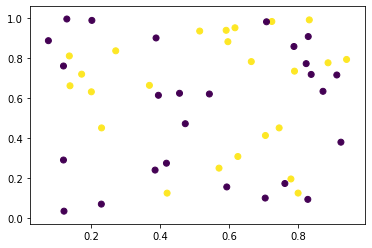

In [22]:
# Generate some data-points
x_ov = np.random.random(size=(50, 2))

# And some random outcomes
y_ov = np.random.randint(0, 2, size=(50, ))

# Plot it
plt.scatter(x_ov[:, 0], x_ov[:, 1], c=y_ov)
plt.show()

> Now, create a network that attains a an accuracy score over 80% in predicting which points are class 0 and which are class 1.
>
> *Hint*: The bigger the network, the bigger the overfitting.

In [51]:
ov_model = Sequential()

#building layers
ov_model.add(Dense(units=1000, activation='relu', input_dim = 2))
ov_model.add(Dense(units=1, activation='sigmoid'))



ov_model.summary()


sgd = tf.optimizers.SGD(learning_rate=1, momentum=0.0, nesterov=False)

ov_model.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy','mse'])

log_dir="./logs/ex4/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 1001      
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


In [53]:
#train
ov_hist = ov_model.fit(x_ov, y_ov, epochs=10000, batch_size=100, callbacks=[tensorboard_callback])

Epoch 1/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2042 - accuracy: 0.6200 - mse: 0.2042
Epoch 2/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2044 - accuracy: 0.6000 - mse: 0.2044
Epoch 3/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2043 - accuracy: 0.6200 - mse: 0.2043
Epoch 4/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2043 - accuracy: 0.6000 - mse: 0.2043
Epoch 5/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2042 - accuracy: 0.6200 - mse: 0.2042
Epoch 6/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2042 - accuracy: 0.6000 - mse: 0.2042
Epoch 7/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2041 - accuracy: 0.6200 - mse: 0.2041
Epoch 8/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2040 - accuracy: 0.6000 - mse: 0.2040
Epoch 9/10000
50/50 [==============================] - 0s 30us/step - lo

50/50 [==============================] - 0s 27us/step - loss: 0.2017 - accuracy: 0.6400 - mse: 0.2017
Epoch 72/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2016 - accuracy: 0.6000 - mse: 0.2016
Epoch 73/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2017 - accuracy: 0.6400 - mse: 0.2017
Epoch 74/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2016 - accuracy: 0.6000 - mse: 0.2016
Epoch 75/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2017 - accuracy: 0.6600 - mse: 0.2017
Epoch 76/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2015 - accuracy: 0.6000 - mse: 0.2015
Epoch 77/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2016 - accuracy: 0.6600 - mse: 0.2016
Epoch 78/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2015 - accuracy: 0.6200 - mse: 0.2015
Epoch 79/10000
50/50 [==============================] - 0s 26us/step - loss: 0.

Epoch 141/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2007 - accuracy: 0.6600 - mse: 0.2007
Epoch 142/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2005 - accuracy: 0.7000 - mse: 0.2005
Epoch 143/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2007 - accuracy: 0.6600 - mse: 0.2007
Epoch 144/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2005 - accuracy: 0.7000 - mse: 0.2005
Epoch 145/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2008 - accuracy: 0.6600 - mse: 0.2008
Epoch 146/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2006 - accuracy: 0.7000 - mse: 0.2006
Epoch 147/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2009 - accuracy: 0.6600 - mse: 0.2009
Epoch 148/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2006 - accuracy: 0.7000 - mse: 0.2006
Epoch 149/10000
50/50 [==============================] -

Epoch 211/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2007 - accuracy: 0.6600 - mse: 0.2007
Epoch 212/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2001 - accuracy: 0.6800 - mse: 0.2001
Epoch 213/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2008 - accuracy: 0.6600 - mse: 0.2008
Epoch 214/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2001 - accuracy: 0.6800 - mse: 0.2001
Epoch 215/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2006 - accuracy: 0.6600 - mse: 0.2006
Epoch 216/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2000 - accuracy: 0.6800 - mse: 0.2000
Epoch 217/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2007 - accuracy: 0.6600 - mse: 0.2007
Epoch 218/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2000 - accuracy: 0.6800 - mse: 0.2000
Epoch 219/10000
50/50 [==============================] -

Epoch 281/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1995 - accuracy: 0.6600 - mse: 0.1995
Epoch 282/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1987 - accuracy: 0.6800 - mse: 0.1987
Epoch 283/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1995 - accuracy: 0.6600 - mse: 0.1995
Epoch 284/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1986 - accuracy: 0.7000 - mse: 0.1986
Epoch 285/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1996 - accuracy: 0.6600 - mse: 0.1996
Epoch 286/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1986 - accuracy: 0.7000 - mse: 0.1986
Epoch 287/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1996 - accuracy: 0.6600 - mse: 0.1996
Epoch 288/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1985 - accuracy: 0.7000 - mse: 0.1985
Epoch 289/10000
50/50 [==============================] -

Epoch 351/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1983 - accuracy: 0.6600 - mse: 0.1983
Epoch 352/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1974 - accuracy: 0.7200 - mse: 0.1974
Epoch 353/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1982 - accuracy: 0.6600 - mse: 0.1982
Epoch 354/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1972 - accuracy: 0.7200 - mse: 0.1972
Epoch 355/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1980 - accuracy: 0.6600 - mse: 0.1980
Epoch 356/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1970 - accuracy: 0.7000 - mse: 0.1970
Epoch 357/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1979 - accuracy: 0.6600 - mse: 0.1979
Epoch 358/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1970 - accuracy: 0.7400 - mse: 0.1970
Epoch 359/10000
50/50 [==============================] -

Epoch 421/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1955 - accuracy: 0.6600 - mse: 0.1955
Epoch 422/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1948 - accuracy: 0.6600 - mse: 0.1948
Epoch 423/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1953 - accuracy: 0.6600 - mse: 0.1953
Epoch 424/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1948 - accuracy: 0.6600 - mse: 0.1948
Epoch 425/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1955 - accuracy: 0.6600 - mse: 0.1955
Epoch 426/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1949 - accuracy: 0.6800 - mse: 0.1949
Epoch 427/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1957 - accuracy: 0.6600 - mse: 0.1957
Epoch 428/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1951 - accuracy: 0.7000 - mse: 0.1951
Epoch 429/10000
50/50 [==============================] -

Epoch 491/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1948 - accuracy: 0.6600 - mse: 0.1948
Epoch 492/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1946 - accuracy: 0.7000 - mse: 0.1946
Epoch 493/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1951 - accuracy: 0.6600 - mse: 0.1951
Epoch 494/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1951 - accuracy: 0.7400 - mse: 0.1951
Epoch 495/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1958 - accuracy: 0.6600 - mse: 0.1958
Epoch 496/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1955 - accuracy: 0.7400 - mse: 0.1955
Epoch 497/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1959 - accuracy: 0.6600 - mse: 0.1959
Epoch 498/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1957 - accuracy: 0.7400 - mse: 0.1957
Epoch 499/10000
50/50 [==============================] -

Epoch 561/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1944 - accuracy: 0.6600 - mse: 0.1944
Epoch 562/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1935 - accuracy: 0.7000 - mse: 0.1935
Epoch 563/10000
50/50 [==============================] - 0s 60us/step - loss: 0.1940 - accuracy: 0.6600 - mse: 0.1940
Epoch 564/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1934 - accuracy: 0.6800 - mse: 0.1934
Epoch 565/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1943 - accuracy: 0.6600 - mse: 0.1943
Epoch 566/10000
50/50 [==============================] - 0s 90us/step - loss: 0.1933 - accuracy: 0.6800 - mse: 0.1933
Epoch 567/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1939 - accuracy: 0.6600 - mse: 0.1939
Epoch 568/10000
50/50 [==============================] - 0s 103us/step - loss: 0.1932 - accuracy: 0.6800 - mse: 0.1932
Epoch 569/10000
50/50 [==============================] 

Epoch 631/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1929 - accuracy: 0.6600 - mse: 0.1929
Epoch 632/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1921 - accuracy: 0.7000 - mse: 0.1921
Epoch 633/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1926 - accuracy: 0.6600 - mse: 0.1926
Epoch 634/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1921 - accuracy: 0.7000 - mse: 0.1921
Epoch 635/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1923 - accuracy: 0.6600 - mse: 0.1923
Epoch 636/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1918 - accuracy: 0.6800 - mse: 0.1918
Epoch 637/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1924 - accuracy: 0.6600 - mse: 0.1924
Epoch 638/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1920 - accuracy: 0.6800 - mse: 0.1920
Epoch 639/10000
50/50 [==============================] -

Epoch 701/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1915 - accuracy: 0.6600 - mse: 0.1915
Epoch 702/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1910 - accuracy: 0.7200 - mse: 0.1910
Epoch 703/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1921 - accuracy: 0.6600 - mse: 0.1921
Epoch 704/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1913 - accuracy: 0.7200 - mse: 0.1913
Epoch 705/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1920 - accuracy: 0.6600 - mse: 0.1920
Epoch 706/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1910 - accuracy: 0.7200 - mse: 0.1910
Epoch 707/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1915 - accuracy: 0.6600 - mse: 0.1915
Epoch 708/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1910 - accuracy: 0.7200 - mse: 0.1910
Epoch 709/10000
50/50 [==============================] -

Epoch 771/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1913 - accuracy: 0.6600 - mse: 0.1913
Epoch 772/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1901 - accuracy: 0.7200 - mse: 0.1901
Epoch 773/10000
50/50 [==============================] - 0s 62us/step - loss: 0.1911 - accuracy: 0.6600 - mse: 0.1911
Epoch 774/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1900 - accuracy: 0.7200 - mse: 0.1900
Epoch 775/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1907 - accuracy: 0.6600 - mse: 0.1907
Epoch 776/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1898 - accuracy: 0.7200 - mse: 0.1898
Epoch 777/10000
50/50 [==============================] - 0s 58us/step - loss: 0.1904 - accuracy: 0.6600 - mse: 0.1904
Epoch 778/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1898 - accuracy: 0.7000 - mse: 0.1898
Epoch 779/10000
50/50 [==============================] -

Epoch 841/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1900 - accuracy: 0.6600 - mse: 0.1900
Epoch 842/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1892 - accuracy: 0.7200 - mse: 0.1892
Epoch 843/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1905 - accuracy: 0.6600 - mse: 0.1905
Epoch 844/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1896 - accuracy: 0.7200 - mse: 0.1896
Epoch 845/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1907 - accuracy: 0.6600 - mse: 0.1907
Epoch 846/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1894 - accuracy: 0.7200 - mse: 0.1894
Epoch 847/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1903 - accuracy: 0.6600 - mse: 0.1903
Epoch 848/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1893 - accuracy: 0.7200 - mse: 0.1893
Epoch 849/10000
50/50 [==============================] -

50/50 [==============================] - 0s 33us/step - loss: 0.1888 - accuracy: 0.7200 - mse: 0.1888
Epoch 911/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1897 - accuracy: 0.6600 - mse: 0.1897
Epoch 912/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1886 - accuracy: 0.7200 - mse: 0.1886
Epoch 913/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1894 - accuracy: 0.6800 - mse: 0.1894
Epoch 914/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1885 - accuracy: 0.7200 - mse: 0.1885
Epoch 915/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1896 - accuracy: 0.6600 - mse: 0.1896
Epoch 916/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1888 - accuracy: 0.7200 - mse: 0.1888
Epoch 917/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1901 - accuracy: 0.6600 - mse: 0.1901
Epoch 918/10000
50/50 [==============================] - 0s 39us/step - 

Epoch 980/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1877 - accuracy: 0.7200 - mse: 0.1877
Epoch 981/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1885 - accuracy: 0.6600 - mse: 0.1885
Epoch 982/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1878 - accuracy: 0.7200 - mse: 0.1878
Epoch 983/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1884 - accuracy: 0.6600 - mse: 0.1884
Epoch 984/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1877 - accuracy: 0.7200 - mse: 0.1877
Epoch 985/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1888 - accuracy: 0.6600 - mse: 0.1888
Epoch 986/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1877 - accuracy: 0.7200 - mse: 0.1877
Epoch 987/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1891 - accuracy: 0.6600 - mse: 0.1891
Epoch 988/10000
50/50 [==============================] -

50/50 [==============================] - 0s 33us/step - loss: 0.1880 - accuracy: 0.6600 - mse: 0.1880
Epoch 1050/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1869 - accuracy: 0.7200 - mse: 0.1869
Epoch 1051/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1879 - accuracy: 0.6600 - mse: 0.1879
Epoch 1052/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1870 - accuracy: 0.7200 - mse: 0.1870
Epoch 1053/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1877 - accuracy: 0.6600 - mse: 0.1877
Epoch 1054/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1870 - accuracy: 0.7200 - mse: 0.1870
Epoch 1055/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1881 - accuracy: 0.6600 - mse: 0.1881
Epoch 1056/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1869 - accuracy: 0.7200 - mse: 0.1869
Epoch 1057/10000
50/50 [==============================] - 0s 34us

Epoch 1118/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1861 - accuracy: 0.7200 - mse: 0.1861
Epoch 1119/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1866 - accuracy: 0.6600 - mse: 0.1866
Epoch 1120/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1856 - accuracy: 0.7200 - mse: 0.1856
Epoch 1121/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1863 - accuracy: 0.6600 - mse: 0.1863
Epoch 1122/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1858 - accuracy: 0.7200 - mse: 0.1858
Epoch 1123/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1865 - accuracy: 0.6600 - mse: 0.1865
Epoch 1124/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1856 - accuracy: 0.7400 - mse: 0.1856
Epoch 1125/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1865 - accuracy: 0.6600 - mse: 0.1865
Epoch 1126/10000
50/50 [========================

Epoch 1187/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1865 - accuracy: 0.6800 - mse: 0.1865
Epoch 1188/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1851 - accuracy: 0.7400 - mse: 0.1851
Epoch 1189/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1862 - accuracy: 0.6800 - mse: 0.1862
Epoch 1190/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1850 - accuracy: 0.7400 - mse: 0.1850
Epoch 1191/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1862 - accuracy: 0.6800 - mse: 0.1862
Epoch 1192/10000
50/50 [==============================] - 0s 52us/step - loss: 0.1855 - accuracy: 0.7200 - mse: 0.1855
Epoch 1193/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1866 - accuracy: 0.6800 - mse: 0.1866
Epoch 1194/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1851 - accuracy: 0.7400 - mse: 0.1851
Epoch 1195/10000
50/50 [========================

Epoch 1256/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1839 - accuracy: 0.7600 - mse: 0.1839
Epoch 1257/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1851 - accuracy: 0.6800 - mse: 0.1851
Epoch 1258/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1843 - accuracy: 0.7800 - mse: 0.1843
Epoch 1259/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1855 - accuracy: 0.6800 - mse: 0.1855
Epoch 1260/10000
50/50 [==============================] - 0s 21us/step - loss: 0.1841 - accuracy: 0.7800 - mse: 0.1841
Epoch 1261/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1854 - accuracy: 0.6800 - mse: 0.1854
Epoch 1262/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1841 - accuracy: 0.7800 - mse: 0.1841
Epoch 1263/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1852 - accuracy: 0.6800 - mse: 0.1852
Epoch 1264/10000
50/50 [========================

Epoch 1325/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1849 - accuracy: 0.6800 - mse: 0.1849
Epoch 1326/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1833 - accuracy: 0.7800 - mse: 0.1833
Epoch 1327/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1846 - accuracy: 0.6800 - mse: 0.1846
Epoch 1328/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1826 - accuracy: 0.7800 - mse: 0.1826
Epoch 1329/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1843 - accuracy: 0.6800 - mse: 0.1843
Epoch 1330/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1832 - accuracy: 0.7800 - mse: 0.1832
Epoch 1331/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1844 - accuracy: 0.6800 - mse: 0.1844
Epoch 1332/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1829 - accuracy: 0.7800 - mse: 0.1829
Epoch 1333/10000
50/50 [========================

Epoch 1394/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1818 - accuracy: 0.7800 - mse: 0.1818
Epoch 1395/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1834 - accuracy: 0.6800 - mse: 0.1834
Epoch 1396/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1817 - accuracy: 0.7800 - mse: 0.1817
Epoch 1397/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1827 - accuracy: 0.6800 - mse: 0.1827
Epoch 1398/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1814 - accuracy: 0.7800 - mse: 0.1814
Epoch 1399/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1829 - accuracy: 0.6800 - mse: 0.1829
Epoch 1400/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1816 - accuracy: 0.7800 - mse: 0.1816
Epoch 1401/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1831 - accuracy: 0.6800 - mse: 0.1831
Epoch 1402/10000
50/50 [========================

Epoch 1463/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1820 - accuracy: 0.7000 - mse: 0.1820
Epoch 1464/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1808 - accuracy: 0.7800 - mse: 0.1808
Epoch 1465/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1821 - accuracy: 0.7000 - mse: 0.1821
Epoch 1466/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1805 - accuracy: 0.7800 - mse: 0.1805
Epoch 1467/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1822 - accuracy: 0.7000 - mse: 0.1822
Epoch 1468/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1808 - accuracy: 0.7800 - mse: 0.1808
Epoch 1469/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1822 - accuracy: 0.7000 - mse: 0.1822
Epoch 1470/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1804 - accuracy: 0.7800 - mse: 0.1804
Epoch 1471/10000
50/50 [========================

Epoch 1532/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1790 - accuracy: 0.7800 - mse: 0.1790
Epoch 1533/10000
50/50 [==============================] - 0s 21us/step - loss: 0.1806 - accuracy: 0.7200 - mse: 0.1806
Epoch 1534/10000
50/50 [==============================] - 0s 20us/step - loss: 0.1790 - accuracy: 0.7800 - mse: 0.1790
Epoch 1535/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1803 - accuracy: 0.7200 - mse: 0.1803
Epoch 1536/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1790 - accuracy: 0.7800 - mse: 0.1790
Epoch 1537/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1804 - accuracy: 0.7200 - mse: 0.1804
Epoch 1538/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1788 - accuracy: 0.7800 - mse: 0.1788
Epoch 1539/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1806 - accuracy: 0.7200 - mse: 0.1806
Epoch 1540/10000
50/50 [========================

Epoch 1601/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1800 - accuracy: 0.7200 - mse: 0.1800
Epoch 1602/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1786 - accuracy: 0.7400 - mse: 0.1786
Epoch 1603/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1794 - accuracy: 0.7200 - mse: 0.1794
Epoch 1604/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1785 - accuracy: 0.7400 - mse: 0.1785
Epoch 1605/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1800 - accuracy: 0.7200 - mse: 0.1800
Epoch 1606/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1786 - accuracy: 0.7400 - mse: 0.1786
Epoch 1607/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1796 - accuracy: 0.7200 - mse: 0.1796
Epoch 1608/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1780 - accuracy: 0.7400 - mse: 0.1780
Epoch 1609/10000
50/50 [========================

Epoch 1670/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1776 - accuracy: 0.7400 - mse: 0.1776
Epoch 1671/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1782 - accuracy: 0.7200 - mse: 0.1782
Epoch 1672/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1768 - accuracy: 0.7400 - mse: 0.1768
Epoch 1673/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1780 - accuracy: 0.7200 - mse: 0.1780
Epoch 1674/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1774 - accuracy: 0.7400 - mse: 0.1774
Epoch 1675/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1786 - accuracy: 0.7200 - mse: 0.1786
Epoch 1676/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1770 - accuracy: 0.7400 - mse: 0.1770
Epoch 1677/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1781 - accuracy: 0.7200 - mse: 0.1781
Epoch 1678/10000
50/50 [========================

Epoch 1739/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1784 - accuracy: 0.7200 - mse: 0.1784
Epoch 1740/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1766 - accuracy: 0.7200 - mse: 0.1766
Epoch 1741/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1774 - accuracy: 0.7200 - mse: 0.1774
Epoch 1742/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1763 - accuracy: 0.7200 - mse: 0.1763
Epoch 1743/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1769 - accuracy: 0.7200 - mse: 0.1769
Epoch 1744/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1748 - accuracy: 0.7800 - mse: 0.1748
Epoch 1745/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1759 - accuracy: 0.7200 - mse: 0.1759
Epoch 1746/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1749 - accuracy: 0.7800 - mse: 0.1749
Epoch 1747/10000
50/50 [========================

Epoch 1808/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1752 - accuracy: 0.7200 - mse: 0.1752
Epoch 1809/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1761 - accuracy: 0.7400 - mse: 0.1761
Epoch 1810/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1744 - accuracy: 0.7000 - mse: 0.1744
Epoch 1811/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1752 - accuracy: 0.7400 - mse: 0.1752
Epoch 1812/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1745 - accuracy: 0.7600 - mse: 0.1745
Epoch 1813/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1755 - accuracy: 0.7400 - mse: 0.1755
Epoch 1814/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1743 - accuracy: 0.7200 - mse: 0.1743
Epoch 1815/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1756 - accuracy: 0.7400 - mse: 0.1756
Epoch 1816/10000
50/50 [========================

Epoch 1877/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1746 - accuracy: 0.7400 - mse: 0.1746
Epoch 1878/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1737 - accuracy: 0.7200 - mse: 0.1737
Epoch 1879/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1747 - accuracy: 0.7400 - mse: 0.1747
Epoch 1880/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1733 - accuracy: 0.7400 - mse: 0.1733
Epoch 1881/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1741 - accuracy: 0.7400 - mse: 0.1741
Epoch 1882/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1730 - accuracy: 0.7400 - mse: 0.1730
Epoch 1883/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1744 - accuracy: 0.7400 - mse: 0.1744
Epoch 1884/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1729 - accuracy: 0.7200 - mse: 0.1729
Epoch 1885/10000
50/50 [========================

Epoch 1946/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1717 - accuracy: 0.7400 - mse: 0.1717
Epoch 1947/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1731 - accuracy: 0.7600 - mse: 0.1731
Epoch 1948/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1718 - accuracy: 0.7400 - mse: 0.1718
Epoch 1949/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1733 - accuracy: 0.7600 - mse: 0.1733
Epoch 1950/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1722 - accuracy: 0.7200 - mse: 0.1722
Epoch 1951/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1737 - accuracy: 0.7400 - mse: 0.1737
Epoch 1952/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1724 - accuracy: 0.7200 - mse: 0.1724
Epoch 1953/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1734 - accuracy: 0.7400 - mse: 0.1734
Epoch 1954/10000
50/50 [========================

Epoch 2015/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1717 - accuracy: 0.7600 - mse: 0.1717
Epoch 2016/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1707 - accuracy: 0.7400 - mse: 0.1707
Epoch 2017/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1716 - accuracy: 0.7600 - mse: 0.1716
Epoch 2018/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1702 - accuracy: 0.7400 - mse: 0.1702
Epoch 2019/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1712 - accuracy: 0.7600 - mse: 0.1712
Epoch 2020/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1708 - accuracy: 0.7400 - mse: 0.1708
Epoch 2021/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1719 - accuracy: 0.7600 - mse: 0.1719
Epoch 2022/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1704 - accuracy: 0.7400 - mse: 0.1704
Epoch 2023/10000
50/50 [========================

Epoch 2084/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1692 - accuracy: 0.7400 - mse: 0.1692
Epoch 2085/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1703 - accuracy: 0.7600 - mse: 0.1703
Epoch 2086/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1691 - accuracy: 0.7400 - mse: 0.1691
Epoch 2087/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1703 - accuracy: 0.7600 - mse: 0.1703
Epoch 2088/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1690 - accuracy: 0.7400 - mse: 0.1690
Epoch 2089/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1702 - accuracy: 0.7600 - mse: 0.1702
Epoch 2090/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1693 - accuracy: 0.7400 - mse: 0.1693
Epoch 2091/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1701 - accuracy: 0.7600 - mse: 0.1701
Epoch 2092/10000
50/50 [========================

Epoch 2153/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1700 - accuracy: 0.7600 - mse: 0.1700
Epoch 2154/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1684 - accuracy: 0.7400 - mse: 0.1684
Epoch 2155/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1698 - accuracy: 0.7600 - mse: 0.1698
Epoch 2156/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1682 - accuracy: 0.7400 - mse: 0.1682
Epoch 2157/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1694 - accuracy: 0.7600 - mse: 0.1694
Epoch 2158/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1679 - accuracy: 0.7400 - mse: 0.1679
Epoch 2159/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1690 - accuracy: 0.7600 - mse: 0.1690
Epoch 2160/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1681 - accuracy: 0.7400 - mse: 0.1681
Epoch 2161/10000
50/50 [========================

Epoch 2222/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1674 - accuracy: 0.7400 - mse: 0.1674
Epoch 2223/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1684 - accuracy: 0.7600 - mse: 0.1684
Epoch 2224/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1671 - accuracy: 0.7600 - mse: 0.1671
Epoch 2225/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1676 - accuracy: 0.7600 - mse: 0.1676
Epoch 2226/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1664 - accuracy: 0.7600 - mse: 0.1664
Epoch 2227/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1678 - accuracy: 0.7600 - mse: 0.1678
Epoch 2228/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1673 - accuracy: 0.7400 - mse: 0.1673
Epoch 2229/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1682 - accuracy: 0.7600 - mse: 0.1682
Epoch 2230/10000
50/50 [========================

Epoch 2291/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1668 - accuracy: 0.7600 - mse: 0.1668
Epoch 2292/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1661 - accuracy: 0.7600 - mse: 0.1661
Epoch 2293/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1667 - accuracy: 0.7600 - mse: 0.1667
Epoch 2294/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1659 - accuracy: 0.7600 - mse: 0.1659
Epoch 2295/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1666 - accuracy: 0.7600 - mse: 0.1666
Epoch 2296/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1659 - accuracy: 0.7600 - mse: 0.1659
Epoch 2297/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1675 - accuracy: 0.7600 - mse: 0.1675
Epoch 2298/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1666 - accuracy: 0.7600 - mse: 0.1666
Epoch 2299/10000
50/50 [========================

Epoch 2360/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1649 - accuracy: 0.7600 - mse: 0.1649
Epoch 2361/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1665 - accuracy: 0.7600 - mse: 0.1665
Epoch 2362/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1660 - accuracy: 0.7400 - mse: 0.1660
Epoch 2363/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1679 - accuracy: 0.7600 - mse: 0.1679
Epoch 2364/10000
50/50 [==============================] - 0s 21us/step - loss: 0.1661 - accuracy: 0.7400 - mse: 0.1661
Epoch 2365/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1671 - accuracy: 0.7600 - mse: 0.1671
Epoch 2366/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1662 - accuracy: 0.7400 - mse: 0.1662
Epoch 2367/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1673 - accuracy: 0.7600 - mse: 0.1673
Epoch 2368/10000
50/50 [========================

Epoch 2429/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1642 - accuracy: 0.7600 - mse: 0.1642
Epoch 2430/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1634 - accuracy: 0.7800 - mse: 0.1634
Epoch 2431/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1634 - accuracy: 0.7600 - mse: 0.1634
Epoch 2432/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1630 - accuracy: 0.7800 - mse: 0.1630
Epoch 2433/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1635 - accuracy: 0.7600 - mse: 0.1635
Epoch 2434/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1626 - accuracy: 0.8000 - mse: 0.1626
Epoch 2435/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1642 - accuracy: 0.7600 - mse: 0.1642
Epoch 2436/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1634 - accuracy: 0.7600 - mse: 0.1634
Epoch 2437/10000
50/50 [========================

Epoch 2498/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1616 - accuracy: 0.8000 - mse: 0.1616
Epoch 2499/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1624 - accuracy: 0.7800 - mse: 0.1624
Epoch 2500/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1617 - accuracy: 0.8000 - mse: 0.1617
Epoch 2501/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1629 - accuracy: 0.7600 - mse: 0.1629
Epoch 2502/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1632 - accuracy: 0.7600 - mse: 0.1632
Epoch 2503/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1660 - accuracy: 0.7600 - mse: 0.1660
Epoch 2504/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1647 - accuracy: 0.7400 - mse: 0.1647
Epoch 2505/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1658 - accuracy: 0.7600 - mse: 0.1658
Epoch 2506/10000
50/50 [========================

Epoch 2567/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1613 - accuracy: 0.7800 - mse: 0.1613
Epoch 2568/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1603 - accuracy: 0.8200 - mse: 0.1603
Epoch 2569/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1609 - accuracy: 0.7800 - mse: 0.1609
Epoch 2570/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1601 - accuracy: 0.8000 - mse: 0.1601
Epoch 2571/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1610 - accuracy: 0.7800 - mse: 0.1610
Epoch 2572/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1608 - accuracy: 0.8000 - mse: 0.1608
Epoch 2573/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1633 - accuracy: 0.7600 - mse: 0.1633
Epoch 2574/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1622 - accuracy: 0.7800 - mse: 0.1622
Epoch 2575/10000
50/50 [========================

Epoch 2636/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1619 - accuracy: 0.7600 - mse: 0.1619
Epoch 2637/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1639 - accuracy: 0.7600 - mse: 0.1639
Epoch 2638/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1607 - accuracy: 0.7600 - mse: 0.1607
Epoch 2639/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1617 - accuracy: 0.7800 - mse: 0.1617
Epoch 2640/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1603 - accuracy: 0.8000 - mse: 0.1603
Epoch 2641/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1616 - accuracy: 0.7600 - mse: 0.1616
Epoch 2642/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1585 - accuracy: 0.8000 - mse: 0.1585
Epoch 2643/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1594 - accuracy: 0.7800 - mse: 0.1594
Epoch 2644/10000
50/50 [========================

Epoch 2705/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1663 - accuracy: 0.7600 - mse: 0.1663
Epoch 2706/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1629 - accuracy: 0.7600 - mse: 0.1629
Epoch 2707/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1621 - accuracy: 0.7600 - mse: 0.1621
Epoch 2708/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1599 - accuracy: 0.8000 - mse: 0.1599
Epoch 2709/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1588 - accuracy: 0.7800 - mse: 0.1588
Epoch 2710/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1568 - accuracy: 0.8000 - mse: 0.1568
Epoch 2711/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1570 - accuracy: 0.8000 - mse: 0.1570
Epoch 2712/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1572 - accuracy: 0.8000 - mse: 0.1572
Epoch 2713/10000
50/50 [========================

Epoch 2774/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1576 - accuracy: 0.8200 - mse: 0.1576
Epoch 2775/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1594 - accuracy: 0.7800 - mse: 0.1594
Epoch 2776/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1582 - accuracy: 0.8200 - mse: 0.1582
Epoch 2777/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1601 - accuracy: 0.7600 - mse: 0.1601
Epoch 2778/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1576 - accuracy: 0.8200 - mse: 0.1576
Epoch 2779/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1595 - accuracy: 0.7800 - mse: 0.1595
Epoch 2780/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1585 - accuracy: 0.8000 - mse: 0.1585
Epoch 2781/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1609 - accuracy: 0.7600 - mse: 0.1609
Epoch 2782/10000
50/50 [========================

Epoch 2843/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1598 - accuracy: 0.7600 - mse: 0.1598
Epoch 2844/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1569 - accuracy: 0.8200 - mse: 0.1569
Epoch 2845/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1563 - accuracy: 0.8000 - mse: 0.1563
Epoch 2846/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1554 - accuracy: 0.8200 - mse: 0.1554
Epoch 2847/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1561 - accuracy: 0.8000 - mse: 0.1561
Epoch 2848/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1557 - accuracy: 0.8200 - mse: 0.1557
Epoch 2849/10000
50/50 [==============================] - 0s 20us/step - loss: 0.1582 - accuracy: 0.7800 - mse: 0.1582
Epoch 2850/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1592 - accuracy: 0.7800 - mse: 0.1592
Epoch 2851/10000
50/50 [========================

Epoch 2912/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1559 - accuracy: 0.8200 - mse: 0.1559
Epoch 2913/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1587 - accuracy: 0.7800 - mse: 0.1587
Epoch 2914/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1583 - accuracy: 0.8000 - mse: 0.1583
Epoch 2915/10000
50/50 [==============================] - 0s 65us/step - loss: 0.1619 - accuracy: 0.7600 - mse: 0.1619
Epoch 2916/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1603 - accuracy: 0.7800 - mse: 0.1603
Epoch 2917/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1615 - accuracy: 0.7600 - mse: 0.1615
Epoch 2918/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1600 - accuracy: 0.7600 - mse: 0.1600
Epoch 2919/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1616 - accuracy: 0.7600 - mse: 0.1616
Epoch 2920/10000
50/50 [========================

Epoch 2981/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1560 - accuracy: 0.8000 - mse: 0.1560
Epoch 2982/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1564 - accuracy: 0.8200 - mse: 0.1564
Epoch 2983/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1590 - accuracy: 0.7600 - mse: 0.1590
Epoch 2984/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1605 - accuracy: 0.7600 - mse: 0.1605
Epoch 2985/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1638 - accuracy: 0.7600 - mse: 0.1638
Epoch 2986/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1608 - accuracy: 0.7600 - mse: 0.1608
Epoch 2987/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1613 - accuracy: 0.7600 - mse: 0.1613
Epoch 2988/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1583 - accuracy: 0.7800 - mse: 0.1583
Epoch 2989/10000
50/50 [========================

Epoch 3050/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1545 - accuracy: 0.8200 - mse: 0.1545
Epoch 3051/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1562 - accuracy: 0.7800 - mse: 0.1562
Epoch 3052/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1558 - accuracy: 0.8200 - mse: 0.1558
Epoch 3053/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1585 - accuracy: 0.7600 - mse: 0.1585
Epoch 3054/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1556 - accuracy: 0.8200 - mse: 0.1556
Epoch 3055/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1582 - accuracy: 0.7600 - mse: 0.1582
Epoch 3056/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1570 - accuracy: 0.8000 - mse: 0.1570
Epoch 3057/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1595 - accuracy: 0.7600 - mse: 0.1595
Epoch 3058/10000
50/50 [========================

Epoch 3119/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1589 - accuracy: 0.7600 - mse: 0.1589
Epoch 3120/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1581 - accuracy: 0.7600 - mse: 0.1581
Epoch 3121/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1602 - accuracy: 0.7600 - mse: 0.1602
Epoch 3122/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1592 - accuracy: 0.7600 - mse: 0.1592
Epoch 3123/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1611 - accuracy: 0.7600 - mse: 0.1611
Epoch 3124/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1590 - accuracy: 0.7600 - mse: 0.1590
Epoch 3125/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1605 - accuracy: 0.7600 - mse: 0.1605
Epoch 3126/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1592 - accuracy: 0.7600 - mse: 0.1592
Epoch 3127/10000
50/50 [========================

Epoch 3188/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1565 - accuracy: 0.8200 - mse: 0.1565
Epoch 3189/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1588 - accuracy: 0.7600 - mse: 0.1588
Epoch 3190/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1552 - accuracy: 0.7800 - mse: 0.1552
Epoch 3191/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1578 - accuracy: 0.7800 - mse: 0.1578
Epoch 3192/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1583 - accuracy: 0.7800 - mse: 0.1583
Epoch 3193/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1616 - accuracy: 0.7600 - mse: 0.1616
Epoch 3194/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1586 - accuracy: 0.7600 - mse: 0.1586
Epoch 3195/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1614 - accuracy: 0.7600 - mse: 0.1614
Epoch 3196/10000
50/50 [========================

Epoch 3257/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1571 - accuracy: 0.7600 - mse: 0.1571
Epoch 3258/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1550 - accuracy: 0.8200 - mse: 0.1550
Epoch 3259/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1559 - accuracy: 0.8000 - mse: 0.1559
Epoch 3260/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1547 - accuracy: 0.8000 - mse: 0.1547
Epoch 3261/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1570 - accuracy: 0.7600 - mse: 0.1570
Epoch 3262/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1547 - accuracy: 0.8200 - mse: 0.1547
Epoch 3263/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1569 - accuracy: 0.7800 - mse: 0.1569
Epoch 3264/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1555 - accuracy: 0.8200 - mse: 0.1555
Epoch 3265/10000
50/50 [========================

Epoch 3326/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1530 - accuracy: 0.8000 - mse: 0.1530
Epoch 3327/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1555 - accuracy: 0.7800 - mse: 0.1555
Epoch 3328/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1540 - accuracy: 0.8000 - mse: 0.1540
Epoch 3329/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1568 - accuracy: 0.7600 - mse: 0.1568
Epoch 3330/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1547 - accuracy: 0.8000 - mse: 0.1547
Epoch 3331/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1574 - accuracy: 0.7600 - mse: 0.1574
Epoch 3332/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1553 - accuracy: 0.8000 - mse: 0.1553
Epoch 3333/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1576 - accuracy: 0.7600 - mse: 0.1576
Epoch 3334/10000
50/50 [========================

Epoch 3395/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1530 - accuracy: 0.8000 - mse: 0.1530
Epoch 3396/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1526 - accuracy: 0.8000 - mse: 0.1526
Epoch 3397/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1543 - accuracy: 0.8000 - mse: 0.1543
Epoch 3398/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1526 - accuracy: 0.8000 - mse: 0.1526
Epoch 3399/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1549 - accuracy: 0.8000 - mse: 0.1549
Epoch 3400/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1535 - accuracy: 0.8000 - mse: 0.1535
Epoch 3401/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1567 - accuracy: 0.7600 - mse: 0.1567
Epoch 3402/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1552 - accuracy: 0.8000 - mse: 0.1552
Epoch 3403/10000
50/50 [========================

Epoch 3464/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1523 - accuracy: 0.8000 - mse: 0.1523
Epoch 3465/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1538 - accuracy: 0.8000 - mse: 0.1538
Epoch 3466/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1529 - accuracy: 0.8000 - mse: 0.1529
Epoch 3467/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1559 - accuracy: 0.8000 - mse: 0.1559
Epoch 3468/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1550 - accuracy: 0.8200 - mse: 0.1550
Epoch 3469/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1586 - accuracy: 0.7600 - mse: 0.1586
Epoch 3470/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1567 - accuracy: 0.7800 - mse: 0.1567
Epoch 3471/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1594 - accuracy: 0.7600 - mse: 0.1594
Epoch 3472/10000
50/50 [========================

Epoch 3533/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1520 - accuracy: 0.8000 - mse: 0.1520
Epoch 3534/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1507 - accuracy: 0.8200 - mse: 0.1507
Epoch 3535/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1534 - accuracy: 0.8000 - mse: 0.1534
Epoch 3536/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1524 - accuracy: 0.8200 - mse: 0.1524
Epoch 3537/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1558 - accuracy: 0.7800 - mse: 0.1558
Epoch 3538/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1533 - accuracy: 0.7800 - mse: 0.1533
Epoch 3539/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1562 - accuracy: 0.7600 - mse: 0.1562
Epoch 3540/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1539 - accuracy: 0.7800 - mse: 0.1539
Epoch 3541/10000
50/50 [========================

Epoch 3602/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1526 - accuracy: 0.7800 - mse: 0.1526
Epoch 3603/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1544 - accuracy: 0.8000 - mse: 0.1544
Epoch 3604/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1516 - accuracy: 0.8200 - mse: 0.1516
Epoch 3605/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1530 - accuracy: 0.8000 - mse: 0.1530
Epoch 3606/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1505 - accuracy: 0.8200 - mse: 0.1505
Epoch 3607/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1530 - accuracy: 0.8000 - mse: 0.1530
Epoch 3608/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1516 - accuracy: 0.8200 - mse: 0.1516
Epoch 3609/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1536 - accuracy: 0.8000 - mse: 0.1536
Epoch 3610/10000
50/50 [========================

Epoch 3671/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1551 - accuracy: 0.8000 - mse: 0.1551
Epoch 3672/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1521 - accuracy: 0.8000 - mse: 0.1521
Epoch 3673/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1541 - accuracy: 0.8000 - mse: 0.1541
Epoch 3674/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1511 - accuracy: 0.8200 - mse: 0.1511
Epoch 3675/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1522 - accuracy: 0.8000 - mse: 0.1522
Epoch 3676/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1500 - accuracy: 0.8200 - mse: 0.1500
Epoch 3677/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1526 - accuracy: 0.8000 - mse: 0.1526
Epoch 3678/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1508 - accuracy: 0.8200 - mse: 0.1508
Epoch 3679/10000
50/50 [========================

Epoch 3740/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1524 - accuracy: 0.8200 - mse: 0.1524
Epoch 3741/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1547 - accuracy: 0.8000 - mse: 0.1547
Epoch 3742/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1511 - accuracy: 0.8000 - mse: 0.1511
Epoch 3743/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1527 - accuracy: 0.8000 - mse: 0.1527
Epoch 3744/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1500 - accuracy: 0.8200 - mse: 0.1500
Epoch 3745/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1517 - accuracy: 0.8000 - mse: 0.1517
Epoch 3746/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1492 - accuracy: 0.8200 - mse: 0.1492
Epoch 3747/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1513 - accuracy: 0.8000 - mse: 0.1513
Epoch 3748/10000
50/50 [========================

Epoch 3809/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1537 - accuracy: 0.8000 - mse: 0.1537
Epoch 3810/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1518 - accuracy: 0.7800 - mse: 0.1518
Epoch 3811/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1549 - accuracy: 0.8000 - mse: 0.1549
Epoch 3812/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1536 - accuracy: 0.7800 - mse: 0.1536
Epoch 3813/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1555 - accuracy: 0.7800 - mse: 0.1555
Epoch 3814/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1508 - accuracy: 0.7800 - mse: 0.1508
Epoch 3815/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1533 - accuracy: 0.8000 - mse: 0.1533
Epoch 3816/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1509 - accuracy: 0.8200 - mse: 0.1509
Epoch 3817/10000
50/50 [========================

Epoch 3878/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1478 - accuracy: 0.8200 - mse: 0.1478
Epoch 3879/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1502 - accuracy: 0.8000 - mse: 0.1502
Epoch 3880/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1484 - accuracy: 0.8200 - mse: 0.1484
Epoch 3881/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1507 - accuracy: 0.8000 - mse: 0.1507
Epoch 3882/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1506 - accuracy: 0.8000 - mse: 0.1506
Epoch 3883/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1550 - accuracy: 0.8000 - mse: 0.1550
Epoch 3884/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1531 - accuracy: 0.8000 - mse: 0.1531
Epoch 3885/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1554 - accuracy: 0.7600 - mse: 0.1554
Epoch 3886/10000
50/50 [========================

Epoch 3947/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1510 - accuracy: 0.8000 - mse: 0.1510
Epoch 3948/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1484 - accuracy: 0.8200 - mse: 0.1484
Epoch 3949/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1497 - accuracy: 0.8000 - mse: 0.1497
Epoch 3950/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1471 - accuracy: 0.8200 - mse: 0.1471
Epoch 3951/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1490 - accuracy: 0.8000 - mse: 0.1490
Epoch 3952/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1472 - accuracy: 0.8200 - mse: 0.1472
Epoch 3953/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1499 - accuracy: 0.8000 - mse: 0.1499
Epoch 3954/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1495 - accuracy: 0.8000 - mse: 0.1495
Epoch 3955/10000
50/50 [========================

Epoch 4016/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1478 - accuracy: 0.8200 - mse: 0.1478
Epoch 4017/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1490 - accuracy: 0.8000 - mse: 0.1490
Epoch 4018/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1473 - accuracy: 0.8200 - mse: 0.1473
Epoch 4019/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1491 - accuracy: 0.8000 - mse: 0.1491
Epoch 4020/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1473 - accuracy: 0.8200 - mse: 0.1473
Epoch 4021/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1502 - accuracy: 0.8000 - mse: 0.1502
Epoch 4022/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1501 - accuracy: 0.8000 - mse: 0.1501
Epoch 4023/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1532 - accuracy: 0.8000 - mse: 0.1532
Epoch 4024/10000
50/50 [========================

Epoch 4085/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1504 - accuracy: 0.8000 - mse: 0.1504
Epoch 4086/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1491 - accuracy: 0.8200 - mse: 0.1491
Epoch 4087/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1527 - accuracy: 0.8000 - mse: 0.1527
Epoch 4088/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1507 - accuracy: 0.7800 - mse: 0.1507
Epoch 4089/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1526 - accuracy: 0.8000 - mse: 0.1526
Epoch 4090/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1499 - accuracy: 0.8000 - mse: 0.1499
Epoch 4091/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1518 - accuracy: 0.8000 - mse: 0.1518
Epoch 4092/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1484 - accuracy: 0.8200 - mse: 0.1484
Epoch 4093/10000
50/50 [========================

Epoch 4154/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1498 - accuracy: 0.8200 - mse: 0.1498
Epoch 4155/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1506 - accuracy: 0.8000 - mse: 0.1506
Epoch 4156/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1471 - accuracy: 0.8200 - mse: 0.1471
Epoch 4157/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1488 - accuracy: 0.8000 - mse: 0.1488
Epoch 4158/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1471 - accuracy: 0.8200 - mse: 0.1471
Epoch 4159/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1501 - accuracy: 0.8000 - mse: 0.1501
Epoch 4160/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1484 - accuracy: 0.8000 - mse: 0.1484
Epoch 4161/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1527 - accuracy: 0.8000 - mse: 0.1527
Epoch 4162/10000
50/50 [========================

Epoch 4223/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1538 - accuracy: 0.8000 - mse: 0.1538
Epoch 4224/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1494 - accuracy: 0.8000 - mse: 0.1494
Epoch 4225/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1524 - accuracy: 0.8000 - mse: 0.1524
Epoch 4226/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1488 - accuracy: 0.8200 - mse: 0.1488
Epoch 4227/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1494 - accuracy: 0.8000 - mse: 0.1494
Epoch 4228/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1474 - accuracy: 0.8200 - mse: 0.1474
Epoch 4229/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1479 - accuracy: 0.8000 - mse: 0.1479
Epoch 4230/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1454 - accuracy: 0.8200 - mse: 0.1454
Epoch 4231/10000
50/50 [========================

Epoch 4292/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1497 - accuracy: 0.8000 - mse: 0.1497
Epoch 4293/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1515 - accuracy: 0.8000 - mse: 0.1515
Epoch 4294/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1480 - accuracy: 0.8200 - mse: 0.1480
Epoch 4295/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1506 - accuracy: 0.8000 - mse: 0.1506
Epoch 4296/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1486 - accuracy: 0.8200 - mse: 0.1486
Epoch 4297/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1510 - accuracy: 0.8000 - mse: 0.1510
Epoch 4298/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1480 - accuracy: 0.8200 - mse: 0.1480
Epoch 4299/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1500 - accuracy: 0.8000 - mse: 0.1500
Epoch 4300/10000
50/50 [========================

Epoch 4361/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1488 - accuracy: 0.8000 - mse: 0.1488
Epoch 4362/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1483 - accuracy: 0.8200 - mse: 0.1483
Epoch 4363/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1502 - accuracy: 0.8000 - mse: 0.1502
Epoch 4364/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1485 - accuracy: 0.8200 - mse: 0.1485
Epoch 4365/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1522 - accuracy: 0.8000 - mse: 0.1522
Epoch 4366/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1489 - accuracy: 0.8000 - mse: 0.1489
Epoch 4367/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1508 - accuracy: 0.8000 - mse: 0.1508
Epoch 4368/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1477 - accuracy: 0.8200 - mse: 0.1477
Epoch 4369/10000
50/50 [========================

Epoch 4430/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1475 - accuracy: 0.8200 - mse: 0.1475
Epoch 4431/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1510 - accuracy: 0.8000 - mse: 0.1510
Epoch 4432/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1487 - accuracy: 0.7800 - mse: 0.1487
Epoch 4433/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1504 - accuracy: 0.8000 - mse: 0.1504
Epoch 4434/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1486 - accuracy: 0.8200 - mse: 0.1486
Epoch 4435/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1494 - accuracy: 0.8000 - mse: 0.1494
Epoch 4436/10000
50/50 [==============================] - 0s 20us/step - loss: 0.1470 - accuracy: 0.8200 - mse: 0.1470
Epoch 4437/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1505 - accuracy: 0.8000 - mse: 0.1505
Epoch 4438/10000
50/50 [========================

Epoch 4499/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1495 - accuracy: 0.8000 - mse: 0.1495
Epoch 4500/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1474 - accuracy: 0.8200 - mse: 0.1474
Epoch 4501/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1496 - accuracy: 0.8000 - mse: 0.1496
Epoch 4502/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1480 - accuracy: 0.8200 - mse: 0.1480
Epoch 4503/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1512 - accuracy: 0.8000 - mse: 0.1512
Epoch 4504/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1488 - accuracy: 0.7800 - mse: 0.1488
Epoch 4505/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1509 - accuracy: 0.8000 - mse: 0.1509
Epoch 4506/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1479 - accuracy: 0.8200 - mse: 0.1479
Epoch 4507/10000
50/50 [========================

Epoch 4568/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1470 - accuracy: 0.8200 - mse: 0.1470
Epoch 4569/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1477 - accuracy: 0.8000 - mse: 0.1477
Epoch 4570/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1468 - accuracy: 0.8200 - mse: 0.1468
Epoch 4571/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1473 - accuracy: 0.8000 - mse: 0.1473
Epoch 4572/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1457 - accuracy: 0.8200 - mse: 0.1457
Epoch 4573/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1479 - accuracy: 0.8000 - mse: 0.1479
Epoch 4574/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1461 - accuracy: 0.8000 - mse: 0.1461
Epoch 4575/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1474 - accuracy: 0.8000 - mse: 0.1474
Epoch 4576/10000
50/50 [========================

Epoch 4637/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1491 - accuracy: 0.8000 - mse: 0.1491
Epoch 4638/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1480 - accuracy: 0.8200 - mse: 0.1480
Epoch 4639/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1489 - accuracy: 0.8000 - mse: 0.1489
Epoch 4640/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1453 - accuracy: 0.8200 - mse: 0.1453
Epoch 4641/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1465 - accuracy: 0.8000 - mse: 0.1465
Epoch 4642/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1455 - accuracy: 0.8200 - mse: 0.1455
Epoch 4643/10000
50/50 [==============================] - 0s 61us/step - loss: 0.1480 - accuracy: 0.8000 - mse: 0.1480
Epoch 4644/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1468 - accuracy: 0.8200 - mse: 0.1468
Epoch 4645/10000
50/50 [========================

Epoch 4706/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1491 - accuracy: 0.7800 - mse: 0.1491
Epoch 4707/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1504 - accuracy: 0.8000 - mse: 0.1504
Epoch 4708/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1471 - accuracy: 0.8200 - mse: 0.1471
Epoch 4709/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1484 - accuracy: 0.8000 - mse: 0.1484
Epoch 4710/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1467 - accuracy: 0.8200 - mse: 0.1467
Epoch 4711/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1462 - accuracy: 0.8000 - mse: 0.1462
Epoch 4712/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1437 - accuracy: 0.8200 - mse: 0.1437
Epoch 4713/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1461 - accuracy: 0.8000 - mse: 0.1461
Epoch 4714/10000
50/50 [========================

Epoch 4775/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1477 - accuracy: 0.8000 - mse: 0.1477
Epoch 4776/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1452 - accuracy: 0.8200 - mse: 0.1452
Epoch 4777/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1466 - accuracy: 0.8000 - mse: 0.1466
Epoch 4778/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1473 - accuracy: 0.8200 - mse: 0.1473
Epoch 4779/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1485 - accuracy: 0.8000 - mse: 0.1485
Epoch 4780/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1472 - accuracy: 0.8200 - mse: 0.1472
Epoch 4781/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1479 - accuracy: 0.8000 - mse: 0.1479
Epoch 4782/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1467 - accuracy: 0.8200 - mse: 0.1467
Epoch 4783/10000
50/50 [========================

Epoch 4844/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1470 - accuracy: 0.8200 - mse: 0.1470
Epoch 4845/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1483 - accuracy: 0.8000 - mse: 0.1483
Epoch 4846/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1479 - accuracy: 0.8200 - mse: 0.1479
Epoch 4847/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1493 - accuracy: 0.8000 - mse: 0.1493
Epoch 4848/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1475 - accuracy: 0.8200 - mse: 0.1475
Epoch 4849/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1486 - accuracy: 0.8000 - mse: 0.1486
Epoch 4850/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1463 - accuracy: 0.8200 - mse: 0.1463
Epoch 4851/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1461 - accuracy: 0.8000 - mse: 0.1461
Epoch 4852/10000
50/50 [========================

Epoch 4913/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1445 - accuracy: 0.8200 - mse: 0.1445
Epoch 4914/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1445 - accuracy: 0.8200 - mse: 0.1445
Epoch 4915/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1453 - accuracy: 0.8000 - mse: 0.1453
Epoch 4916/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1458 - accuracy: 0.8200 - mse: 0.1458
Epoch 4917/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1471 - accuracy: 0.8000 - mse: 0.1471
Epoch 4918/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1465 - accuracy: 0.8000 - mse: 0.1465
Epoch 4919/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1478 - accuracy: 0.8000 - mse: 0.1478
Epoch 4920/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1478 - accuracy: 0.8200 - mse: 0.1478
Epoch 4921/10000
50/50 [========================

Epoch 4982/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1430 - accuracy: 0.8200 - mse: 0.1430
Epoch 4983/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1440 - accuracy: 0.8000 - mse: 0.1440
Epoch 4984/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1442 - accuracy: 0.8200 - mse: 0.1442
Epoch 4985/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1458 - accuracy: 0.8000 - mse: 0.1458
Epoch 4986/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1474 - accuracy: 0.8200 - mse: 0.1474
Epoch 4987/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1501 - accuracy: 0.8000 - mse: 0.1501
Epoch 4988/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1495 - accuracy: 0.8000 - mse: 0.1495
Epoch 4989/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1509 - accuracy: 0.8000 - mse: 0.1509
Epoch 4990/10000
50/50 [========================

Epoch 5051/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1466 - accuracy: 0.8000 - mse: 0.1466
Epoch 5052/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1442 - accuracy: 0.8200 - mse: 0.1442
Epoch 5053/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1445 - accuracy: 0.8000 - mse: 0.1445
Epoch 5054/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1431 - accuracy: 0.8200 - mse: 0.1431
Epoch 5055/10000
50/50 [==============================] - 0s 67us/step - loss: 0.1442 - accuracy: 0.8000 - mse: 0.1442
Epoch 5056/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1432 - accuracy: 0.8200 - mse: 0.1432
Epoch 5057/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1436 - accuracy: 0.8000 - mse: 0.1436
Epoch 5058/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1443 - accuracy: 0.8200 - mse: 0.1443
Epoch 5059/10000
50/50 [========================

Epoch 5120/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1463 - accuracy: 0.8000 - mse: 0.1463
Epoch 5121/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1458 - accuracy: 0.8000 - mse: 0.1458
Epoch 5122/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1455 - accuracy: 0.8200 - mse: 0.1455
Epoch 5123/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1454 - accuracy: 0.8000 - mse: 0.1454
Epoch 5124/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1439 - accuracy: 0.8200 - mse: 0.1439
Epoch 5125/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1439 - accuracy: 0.8000 - mse: 0.1439
Epoch 5126/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1426 - accuracy: 0.8200 - mse: 0.1426
Epoch 5127/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1427 - accuracy: 0.8200 - mse: 0.1427
Epoch 5128/10000
50/50 [========================

Epoch 5189/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1453 - accuracy: 0.8000 - mse: 0.1453
Epoch 5190/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1432 - accuracy: 0.8200 - mse: 0.1432
Epoch 5191/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1439 - accuracy: 0.8200 - mse: 0.1439
Epoch 5192/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1437 - accuracy: 0.8200 - mse: 0.1437
Epoch 5193/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1437 - accuracy: 0.8000 - mse: 0.1437
Epoch 5194/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1439 - accuracy: 0.8200 - mse: 0.1439
Epoch 5195/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1441 - accuracy: 0.8000 - mse: 0.1441
Epoch 5196/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1430 - accuracy: 0.8200 - mse: 0.1430
Epoch 5197/10000
50/50 [========================

Epoch 5258/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1452 - accuracy: 0.8200 - mse: 0.1452
Epoch 5259/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1462 - accuracy: 0.8200 - mse: 0.1462
Epoch 5260/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1474 - accuracy: 0.8200 - mse: 0.1474
Epoch 5261/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1486 - accuracy: 0.8000 - mse: 0.1486
Epoch 5262/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1472 - accuracy: 0.8200 - mse: 0.1472
Epoch 5263/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1472 - accuracy: 0.8200 - mse: 0.1472
Epoch 5264/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1466 - accuracy: 0.8000 - mse: 0.1466
Epoch 5265/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1456 - accuracy: 0.8000 - mse: 0.1456
Epoch 5266/10000
50/50 [========================

Epoch 5327/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1487 - accuracy: 0.8000 - mse: 0.1487
Epoch 5328/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1479 - accuracy: 0.8200 - mse: 0.1479
Epoch 5329/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1471 - accuracy: 0.8000 - mse: 0.1471
Epoch 5330/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1455 - accuracy: 0.8200 - mse: 0.1455
Epoch 5331/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1448 - accuracy: 0.8000 - mse: 0.1448
Epoch 5332/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1444 - accuracy: 0.8200 - mse: 0.1444
Epoch 5333/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1454 - accuracy: 0.8000 - mse: 0.1454
Epoch 5334/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1442 - accuracy: 0.8200 - mse: 0.1442
Epoch 5335/10000
50/50 [========================

Epoch 5396/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1449 - accuracy: 0.8200 - mse: 0.1449
Epoch 5397/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1447 - accuracy: 0.8200 - mse: 0.1447
Epoch 5398/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1442 - accuracy: 0.8200 - mse: 0.1442
Epoch 5399/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1441 - accuracy: 0.8000 - mse: 0.1441
Epoch 5400/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1436 - accuracy: 0.8200 - mse: 0.1436
Epoch 5401/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1435 - accuracy: 0.8200 - mse: 0.1435
Epoch 5402/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1422 - accuracy: 0.8200 - mse: 0.1422
Epoch 5403/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1422 - accuracy: 0.8400 - mse: 0.1422
Epoch 5404/10000
50/50 [========================

Epoch 5465/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1479 - accuracy: 0.8200 - mse: 0.1479
Epoch 5466/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1454 - accuracy: 0.8000 - mse: 0.1454
Epoch 5467/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1436 - accuracy: 0.8000 - mse: 0.1436
Epoch 5468/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1423 - accuracy: 0.8200 - mse: 0.1423
Epoch 5469/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1424 - accuracy: 0.8400 - mse: 0.1424
Epoch 5470/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1422 - accuracy: 0.8400 - mse: 0.1422
Epoch 5471/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1424 - accuracy: 0.8200 - mse: 0.1424
Epoch 5472/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1421 - accuracy: 0.8200 - mse: 0.1421
Epoch 5473/10000
50/50 [========================

Epoch 5534/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1447 - accuracy: 0.8200 - mse: 0.1447
Epoch 5535/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1439 - accuracy: 0.8000 - mse: 0.1439
Epoch 5536/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1425 - accuracy: 0.8400 - mse: 0.1425
Epoch 5537/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1426 - accuracy: 0.8200 - mse: 0.1426
Epoch 5538/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1422 - accuracy: 0.8200 - mse: 0.1422
Epoch 5539/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1429 - accuracy: 0.8200 - mse: 0.1429
Epoch 5540/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1429 - accuracy: 0.8400 - mse: 0.1429
Epoch 5541/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1430 - accuracy: 0.8200 - mse: 0.1430
Epoch 5542/10000
50/50 [========================

Epoch 5603/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1426 - accuracy: 0.8400 - mse: 0.1426
Epoch 5604/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1423 - accuracy: 0.8400 - mse: 0.1423
Epoch 5605/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1419 - accuracy: 0.8200 - mse: 0.1419
Epoch 5606/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1413 - accuracy: 0.8200 - mse: 0.1413
Epoch 5607/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1410 - accuracy: 0.8400 - mse: 0.1410
Epoch 5608/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1416 - accuracy: 0.8400 - mse: 0.1416
Epoch 5609/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1427 - accuracy: 0.8200 - mse: 0.1427
Epoch 5610/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1445 - accuracy: 0.8200 - mse: 0.1445
Epoch 5611/10000
50/50 [========================

Epoch 5672/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1402 - accuracy: 0.8400 - mse: 0.1402
Epoch 5673/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1404 - accuracy: 0.8400 - mse: 0.1404
Epoch 5674/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1421 - accuracy: 0.8400 - mse: 0.1421
Epoch 5675/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1413 - accuracy: 0.8200 - mse: 0.1413
Epoch 5676/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1427 - accuracy: 0.8400 - mse: 0.1427
Epoch 5677/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1411 - accuracy: 0.8200 - mse: 0.1411
Epoch 5678/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1415 - accuracy: 0.8200 - mse: 0.1415
Epoch 5679/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1417 - accuracy: 0.8200 - mse: 0.1417
Epoch 5680/10000
50/50 [========================

Epoch 5741/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1447 - accuracy: 0.8000 - mse: 0.1447
Epoch 5742/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1452 - accuracy: 0.8200 - mse: 0.1452
Epoch 5743/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1437 - accuracy: 0.8200 - mse: 0.1437
Epoch 5744/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1424 - accuracy: 0.8200 - mse: 0.1424
Epoch 5745/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1411 - accuracy: 0.8200 - mse: 0.1411
Epoch 5746/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1406 - accuracy: 0.8400 - mse: 0.1406
Epoch 5747/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1412 - accuracy: 0.8200 - mse: 0.1412
Epoch 5748/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1420 - accuracy: 0.8400 - mse: 0.1420
Epoch 5749/10000
50/50 [========================

Epoch 5810/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1399 - accuracy: 0.8400 - mse: 0.1399
Epoch 5811/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1409 - accuracy: 0.8200 - mse: 0.1409
Epoch 5812/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1427 - accuracy: 0.8200 - mse: 0.1427
Epoch 5813/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1431 - accuracy: 0.8000 - mse: 0.1431
Epoch 5814/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1436 - accuracy: 0.8200 - mse: 0.1436
Epoch 5815/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1437 - accuracy: 0.8000 - mse: 0.1437
Epoch 5816/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1453 - accuracy: 0.8200 - mse: 0.1453
Epoch 5817/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1472 - accuracy: 0.8000 - mse: 0.1472
Epoch 5818/10000
50/50 [========================

Epoch 5879/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1415 - accuracy: 0.8200 - mse: 0.1415
Epoch 5880/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1426 - accuracy: 0.8400 - mse: 0.1426
Epoch 5881/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1439 - accuracy: 0.8000 - mse: 0.1439
Epoch 5882/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1464 - accuracy: 0.8200 - mse: 0.1464
Epoch 5883/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1471 - accuracy: 0.8000 - mse: 0.1471
Epoch 5884/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1477 - accuracy: 0.8200 - mse: 0.1477
Epoch 5885/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1471 - accuracy: 0.8000 - mse: 0.1471
Epoch 5886/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1448 - accuracy: 0.8200 - mse: 0.1448
Epoch 5887/10000
50/50 [========================

Epoch 5948/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1449 - accuracy: 0.8200 - mse: 0.1449
Epoch 5949/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1452 - accuracy: 0.8000 - mse: 0.1452
Epoch 5950/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1451 - accuracy: 0.8200 - mse: 0.1451
Epoch 5951/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1437 - accuracy: 0.8000 - mse: 0.1437
Epoch 5952/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1444 - accuracy: 0.8200 - mse: 0.1444
Epoch 5953/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1431 - accuracy: 0.8000 - mse: 0.1431
Epoch 5954/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1419 - accuracy: 0.8400 - mse: 0.1419
Epoch 5955/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1415 - accuracy: 0.8200 - mse: 0.1415
Epoch 5956/10000
50/50 [========================

Epoch 6017/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1403 - accuracy: 0.8200 - mse: 0.1403
Epoch 6018/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1416 - accuracy: 0.8400 - mse: 0.1416
Epoch 6019/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1423 - accuracy: 0.8200 - mse: 0.1423
Epoch 6020/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1429 - accuracy: 0.8400 - mse: 0.1429
Epoch 6021/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1426 - accuracy: 0.8200 - mse: 0.1426
Epoch 6022/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1438 - accuracy: 0.8200 - mse: 0.1438
Epoch 6023/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1436 - accuracy: 0.8000 - mse: 0.1436
Epoch 6024/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1443 - accuracy: 0.8200 - mse: 0.1443
Epoch 6025/10000
50/50 [========================

Epoch 6086/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1398 - accuracy: 0.8400 - mse: 0.1398
Epoch 6087/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1393 - accuracy: 0.8200 - mse: 0.1393
Epoch 6088/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1405 - accuracy: 0.8400 - mse: 0.1405
Epoch 6089/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1400 - accuracy: 0.8200 - mse: 0.1400
Epoch 6090/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1412 - accuracy: 0.8400 - mse: 0.1412
Epoch 6091/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1416 - accuracy: 0.8200 - mse: 0.1416
Epoch 6092/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1426 - accuracy: 0.8400 - mse: 0.1426
Epoch 6093/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1436 - accuracy: 0.8200 - mse: 0.1436
Epoch 6094/10000
50/50 [========================

Epoch 6155/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1395 - accuracy: 0.8200 - mse: 0.1395
Epoch 6156/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1409 - accuracy: 0.8400 - mse: 0.1409
Epoch 6157/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1406 - accuracy: 0.8200 - mse: 0.1406
Epoch 6158/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1420 - accuracy: 0.8400 - mse: 0.1420
Epoch 6159/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1431 - accuracy: 0.8200 - mse: 0.1431
Epoch 6160/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1445 - accuracy: 0.8200 - mse: 0.1445
Epoch 6161/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1445 - accuracy: 0.8000 - mse: 0.1445
Epoch 6162/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1457 - accuracy: 0.8200 - mse: 0.1457
Epoch 6163/10000
50/50 [========================

Epoch 6224/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1404 - accuracy: 0.8600 - mse: 0.1404
Epoch 6225/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1395 - accuracy: 0.8200 - mse: 0.1395
Epoch 6226/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1396 - accuracy: 0.8400 - mse: 0.1396
Epoch 6227/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1380 - accuracy: 0.8400 - mse: 0.1380
Epoch 6228/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1380 - accuracy: 0.8400 - mse: 0.1380
Epoch 6229/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1387 - accuracy: 0.8200 - mse: 0.1387
Epoch 6230/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1405 - accuracy: 0.8400 - mse: 0.1405
Epoch 6231/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1407 - accuracy: 0.8200 - mse: 0.1407
Epoch 6232/10000
50/50 [========================

Epoch 6293/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1383 - accuracy: 0.8200 - mse: 0.1383
Epoch 6294/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1402 - accuracy: 0.8400 - mse: 0.1402
Epoch 6295/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1403 - accuracy: 0.8200 - mse: 0.1403
Epoch 6296/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1429 - accuracy: 0.8400 - mse: 0.1429
Epoch 6297/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1433 - accuracy: 0.8000 - mse: 0.1433
Epoch 6298/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1452 - accuracy: 0.8200 - mse: 0.1452
Epoch 6299/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1445 - accuracy: 0.8000 - mse: 0.1445
Epoch 6300/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1449 - accuracy: 0.8200 - mse: 0.1449
Epoch 6301/10000
50/50 [========================

Epoch 6362/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1401 - accuracy: 0.8400 - mse: 0.1401
Epoch 6363/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1395 - accuracy: 0.8200 - mse: 0.1395
Epoch 6364/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1406 - accuracy: 0.8400 - mse: 0.1406
Epoch 6365/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1388 - accuracy: 0.8200 - mse: 0.1388
Epoch 6366/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1384 - accuracy: 0.8400 - mse: 0.1384
Epoch 6367/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1372 - accuracy: 0.8200 - mse: 0.1372
Epoch 6368/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1386 - accuracy: 0.8600 - mse: 0.1386
Epoch 6369/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1390 - accuracy: 0.8200 - mse: 0.1390
Epoch 6370/10000
50/50 [========================

Epoch 6431/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1410 - accuracy: 0.8200 - mse: 0.1410
Epoch 6432/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1419 - accuracy: 0.8400 - mse: 0.1419
Epoch 6433/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1403 - accuracy: 0.8200 - mse: 0.1403
Epoch 6434/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1403 - accuracy: 0.8400 - mse: 0.1403
Epoch 6435/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1395 - accuracy: 0.8200 - mse: 0.1395
Epoch 6436/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1402 - accuracy: 0.8400 - mse: 0.1402
Epoch 6437/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1392 - accuracy: 0.8200 - mse: 0.1392
Epoch 6438/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1398 - accuracy: 0.8600 - mse: 0.1398
Epoch 6439/10000
50/50 [========================

Epoch 6500/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1439 - accuracy: 0.8400 - mse: 0.1439
Epoch 6501/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1428 - accuracy: 0.8000 - mse: 0.1428
Epoch 6502/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1443 - accuracy: 0.8200 - mse: 0.1443
Epoch 6503/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1425 - accuracy: 0.8000 - mse: 0.1425
Epoch 6504/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1419 - accuracy: 0.8400 - mse: 0.1419
Epoch 6505/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1390 - accuracy: 0.8400 - mse: 0.1390
Epoch 6506/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1393 - accuracy: 0.8600 - mse: 0.1393
Epoch 6507/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1385 - accuracy: 0.8200 - mse: 0.1385
Epoch 6508/10000
50/50 [========================

Epoch 6569/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1407 - accuracy: 0.8200 - mse: 0.1407
Epoch 6570/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1411 - accuracy: 0.8400 - mse: 0.1411
Epoch 6571/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1404 - accuracy: 0.8200 - mse: 0.1404
Epoch 6572/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1413 - accuracy: 0.8400 - mse: 0.1413
Epoch 6573/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1397 - accuracy: 0.8200 - mse: 0.1397
Epoch 6574/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1392 - accuracy: 0.8600 - mse: 0.1392
Epoch 6575/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1366 - accuracy: 0.8400 - mse: 0.1366
Epoch 6576/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1368 - accuracy: 0.8400 - mse: 0.1368
Epoch 6577/10000
50/50 [========================

Epoch 6638/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1404 - accuracy: 0.8400 - mse: 0.1404
Epoch 6639/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1381 - accuracy: 0.8200 - mse: 0.1381
Epoch 6640/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1387 - accuracy: 0.8400 - mse: 0.1387
Epoch 6641/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1361 - accuracy: 0.8200 - mse: 0.1361
Epoch 6642/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1376 - accuracy: 0.8400 - mse: 0.1376
Epoch 6643/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1378 - accuracy: 0.8200 - mse: 0.1378
Epoch 6644/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1401 - accuracy: 0.8400 - mse: 0.1401
Epoch 6645/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1392 - accuracy: 0.8200 - mse: 0.1392
Epoch 6646/10000
50/50 [========================

Epoch 6707/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1396 - accuracy: 0.8200 - mse: 0.1396
Epoch 6708/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1421 - accuracy: 0.8400 - mse: 0.1421
Epoch 6709/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1409 - accuracy: 0.8200 - mse: 0.1409
Epoch 6710/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1415 - accuracy: 0.8400 - mse: 0.1415
Epoch 6711/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1383 - accuracy: 0.8400 - mse: 0.1383
Epoch 6712/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1393 - accuracy: 0.8600 - mse: 0.1393
Epoch 6713/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1384 - accuracy: 0.8200 - mse: 0.1384
Epoch 6714/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1397 - accuracy: 0.8400 - mse: 0.1397
Epoch 6715/10000
50/50 [========================

Epoch 6776/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1375 - accuracy: 0.8400 - mse: 0.1375
Epoch 6777/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1353 - accuracy: 0.8200 - mse: 0.1353
Epoch 6778/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1369 - accuracy: 0.8400 - mse: 0.1369
Epoch 6779/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1378 - accuracy: 0.8200 - mse: 0.1378
Epoch 6780/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1425 - accuracy: 0.8400 - mse: 0.1425
Epoch 6781/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1416 - accuracy: 0.8200 - mse: 0.1416
Epoch 6782/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1445 - accuracy: 0.8200 - mse: 0.1445
Epoch 6783/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1429 - accuracy: 0.8000 - mse: 0.1429
Epoch 6784/10000
50/50 [========================

Epoch 6845/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1387 - accuracy: 0.8200 - mse: 0.1387
Epoch 6846/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1394 - accuracy: 0.8400 - mse: 0.1394
Epoch 6847/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1379 - accuracy: 0.8200 - mse: 0.1379
Epoch 6848/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1386 - accuracy: 0.8400 - mse: 0.1386
Epoch 6849/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1358 - accuracy: 0.8200 - mse: 0.1358
Epoch 6850/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1375 - accuracy: 0.8400 - mse: 0.1375
Epoch 6851/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1370 - accuracy: 0.8200 - mse: 0.1370
Epoch 6852/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1403 - accuracy: 0.8400 - mse: 0.1403
Epoch 6853/10000
50/50 [========================

Epoch 6914/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1382 - accuracy: 0.8400 - mse: 0.1382
Epoch 6915/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1372 - accuracy: 0.8200 - mse: 0.1372
Epoch 6916/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1395 - accuracy: 0.8400 - mse: 0.1395
Epoch 6917/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1383 - accuracy: 0.8200 - mse: 0.1383
Epoch 6918/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1393 - accuracy: 0.8400 - mse: 0.1393
Epoch 6919/10000
50/50 [==============================] - 0s 59us/step - loss: 0.1377 - accuracy: 0.8200 - mse: 0.1377
Epoch 6920/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1386 - accuracy: 0.8400 - mse: 0.1386
Epoch 6921/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1350 - accuracy: 0.8400 - mse: 0.1350
Epoch 6922/10000
50/50 [========================

Epoch 6983/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1399 - accuracy: 0.8200 - mse: 0.1399
Epoch 6984/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1417 - accuracy: 0.8400 - mse: 0.1417
Epoch 6985/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1379 - accuracy: 0.8400 - mse: 0.1379
Epoch 6986/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1386 - accuracy: 0.8400 - mse: 0.1386
Epoch 6987/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1382 - accuracy: 0.8200 - mse: 0.1382
Epoch 6988/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1419 - accuracy: 0.8400 - mse: 0.1419
Epoch 6989/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1398 - accuracy: 0.8200 - mse: 0.1398
Epoch 6990/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1420 - accuracy: 0.8400 - mse: 0.1420
Epoch 6991/10000
50/50 [========================

Epoch 7052/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1391 - accuracy: 0.8400 - mse: 0.1391
Epoch 7053/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1377 - accuracy: 0.8200 - mse: 0.1377
Epoch 7054/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1411 - accuracy: 0.8400 - mse: 0.1411
Epoch 7055/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1396 - accuracy: 0.8200 - mse: 0.1396
Epoch 7056/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1422 - accuracy: 0.8400 - mse: 0.1422
Epoch 7057/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1395 - accuracy: 0.8200 - mse: 0.1395
Epoch 7058/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1409 - accuracy: 0.8400 - mse: 0.1409
Epoch 7059/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1370 - accuracy: 0.8200 - mse: 0.1370
Epoch 7060/10000
50/50 [========================

Epoch 7121/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1414 - accuracy: 0.8200 - mse: 0.1414
Epoch 7122/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1427 - accuracy: 0.8400 - mse: 0.1427
Epoch 7123/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1377 - accuracy: 0.8200 - mse: 0.1377
Epoch 7124/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1388 - accuracy: 0.8400 - mse: 0.1388
Epoch 7125/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1368 - accuracy: 0.8200 - mse: 0.1368
Epoch 7126/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1376 - accuracy: 0.8400 - mse: 0.1376
Epoch 7127/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1359 - accuracy: 0.8200 - mse: 0.1359
Epoch 7128/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1372 - accuracy: 0.8400 - mse: 0.1372
Epoch 7129/10000
50/50 [========================

Epoch 7190/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1382 - accuracy: 0.8400 - mse: 0.1382
Epoch 7191/10000
50/50 [==============================] - 0s 52us/step - loss: 0.1369 - accuracy: 0.8200 - mse: 0.1369
Epoch 7192/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1386 - accuracy: 0.8400 - mse: 0.1386
Epoch 7193/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1355 - accuracy: 0.8400 - mse: 0.1355
Epoch 7194/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1373 - accuracy: 0.8400 - mse: 0.1373
Epoch 7195/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1353 - accuracy: 0.8200 - mse: 0.1353
Epoch 7196/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1382 - accuracy: 0.8400 - mse: 0.1382
Epoch 7197/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1371 - accuracy: 0.8200 - mse: 0.1371
Epoch 7198/10000
50/50 [========================

Epoch 7259/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1336 - accuracy: 0.8400 - mse: 0.1336
Epoch 7260/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1344 - accuracy: 0.8400 - mse: 0.1344
Epoch 7261/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1345 - accuracy: 0.8200 - mse: 0.1345
Epoch 7262/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1392 - accuracy: 0.8400 - mse: 0.1392
Epoch 7263/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1386 - accuracy: 0.8200 - mse: 0.1386
Epoch 7264/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1442 - accuracy: 0.8200 - mse: 0.1442
Epoch 7265/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1429 - accuracy: 0.8000 - mse: 0.1429
Epoch 7266/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1444 - accuracy: 0.8400 - mse: 0.1444
Epoch 7267/10000
50/50 [========================

Epoch 7328/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1434 - accuracy: 0.8400 - mse: 0.1434
Epoch 7329/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1398 - accuracy: 0.8200 - mse: 0.1398
Epoch 7330/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1411 - accuracy: 0.8400 - mse: 0.1411
Epoch 7331/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1357 - accuracy: 0.8400 - mse: 0.1357
Epoch 7332/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1364 - accuracy: 0.8600 - mse: 0.1364
Epoch 7333/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1356 - accuracy: 0.8200 - mse: 0.1356
Epoch 7334/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1379 - accuracy: 0.8400 - mse: 0.1379
Epoch 7335/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1360 - accuracy: 0.8200 - mse: 0.1360
Epoch 7336/10000
50/50 [========================

Epoch 7397/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1371 - accuracy: 0.8200 - mse: 0.1371
Epoch 7398/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1382 - accuracy: 0.8400 - mse: 0.1382
Epoch 7399/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1363 - accuracy: 0.8200 - mse: 0.1363
Epoch 7400/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1386 - accuracy: 0.8400 - mse: 0.1386
Epoch 7401/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1359 - accuracy: 0.8200 - mse: 0.1359
Epoch 7402/10000
50/50 [==============================] - 0s 65us/step - loss: 0.1371 - accuracy: 0.8400 - mse: 0.1371
Epoch 7403/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1337 - accuracy: 0.8400 - mse: 0.1337
Epoch 7404/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1352 - accuracy: 0.8400 - mse: 0.1352
Epoch 7405/10000
50/50 [========================

Epoch 7466/10000
50/50 [==============================] - 0s 62us/step - loss: 0.1440 - accuracy: 0.8400 - mse: 0.1440
Epoch 7467/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1397 - accuracy: 0.8200 - mse: 0.1397
Epoch 7468/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1408 - accuracy: 0.8400 - mse: 0.1408
Epoch 7469/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1351 - accuracy: 0.8400 - mse: 0.1351
Epoch 7470/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1343 - accuracy: 0.8600 - mse: 0.1343
Epoch 7471/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1326 - accuracy: 0.8200 - mse: 0.1326
Epoch 7472/10000
50/50 [==============================] - 0s 59us/step - loss: 0.1347 - accuracy: 0.8600 - mse: 0.1347
Epoch 7473/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1325 - accuracy: 0.8200 - mse: 0.1325
Epoch 7474/10000
50/50 [========================

Epoch 7535/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1376 - accuracy: 0.8200 - mse: 0.1376
Epoch 7536/10000
50/50 [==============================] - 0s 59us/step - loss: 0.1411 - accuracy: 0.8400 - mse: 0.1411
Epoch 7537/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1376 - accuracy: 0.8200 - mse: 0.1376
Epoch 7538/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1391 - accuracy: 0.8400 - mse: 0.1391
Epoch 7539/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1338 - accuracy: 0.8400 - mse: 0.1338
Epoch 7540/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1341 - accuracy: 0.8600 - mse: 0.1341
Epoch 7541/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1338 - accuracy: 0.8200 - mse: 0.1338
Epoch 7542/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1366 - accuracy: 0.8400 - mse: 0.1366
Epoch 7543/10000
50/50 [========================

Epoch 7604/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1394 - accuracy: 0.8400 - mse: 0.1394
Epoch 7605/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1376 - accuracy: 0.8200 - mse: 0.1376
Epoch 7606/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1420 - accuracy: 0.8400 - mse: 0.1420
Epoch 7607/10000
50/50 [==============================] - 0s 22us/step - loss: 0.1387 - accuracy: 0.8200 - mse: 0.1387
Epoch 7608/10000
50/50 [==============================] - 0s 21us/step - loss: 0.1419 - accuracy: 0.8400 - mse: 0.1419
Epoch 7609/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1369 - accuracy: 0.8200 - mse: 0.1369
Epoch 7610/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1384 - accuracy: 0.8400 - mse: 0.1384
Epoch 7611/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1348 - accuracy: 0.8200 - mse: 0.1348
Epoch 7612/10000
50/50 [========================

Epoch 7673/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1358 - accuracy: 0.8400 - mse: 0.1358
Epoch 7674/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1369 - accuracy: 0.8400 - mse: 0.1369
Epoch 7675/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1352 - accuracy: 0.8200 - mse: 0.1352
Epoch 7676/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1376 - accuracy: 0.8400 - mse: 0.1376
Epoch 7677/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1355 - accuracy: 0.8200 - mse: 0.1355
Epoch 7678/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1373 - accuracy: 0.8400 - mse: 0.1373
Epoch 7679/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1324 - accuracy: 0.8400 - mse: 0.1324
Epoch 7680/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1341 - accuracy: 0.8600 - mse: 0.1341
Epoch 7681/10000
50/50 [========================

Epoch 7742/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1366 - accuracy: 0.8400 - mse: 0.1366
Epoch 7743/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1336 - accuracy: 0.8200 - mse: 0.1336
Epoch 7744/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1367 - accuracy: 0.8400 - mse: 0.1367
Epoch 7745/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1350 - accuracy: 0.8200 - mse: 0.1350
Epoch 7746/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1389 - accuracy: 0.8400 - mse: 0.1389
Epoch 7747/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1360 - accuracy: 0.8200 - mse: 0.1360
Epoch 7748/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1395 - accuracy: 0.8400 - mse: 0.1395
Epoch 7749/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1362 - accuracy: 0.8200 - mse: 0.1362
Epoch 7750/10000
50/50 [========================

Epoch 7811/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1340 - accuracy: 0.8200 - mse: 0.1340
Epoch 7812/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1367 - accuracy: 0.8400 - mse: 0.1367
Epoch 7813/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1340 - accuracy: 0.8200 - mse: 0.1340
Epoch 7814/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1372 - accuracy: 0.8400 - mse: 0.1372
Epoch 7815/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1355 - accuracy: 0.8200 - mse: 0.1355
Epoch 7816/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1399 - accuracy: 0.8400 - mse: 0.1399
Epoch 7817/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1360 - accuracy: 0.8200 - mse: 0.1360
Epoch 7818/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1384 - accuracy: 0.8400 - mse: 0.1384
Epoch 7819/10000
50/50 [========================

Epoch 7880/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1360 - accuracy: 0.8400 - mse: 0.1360
Epoch 7881/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1332 - accuracy: 0.8200 - mse: 0.1332
Epoch 7882/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1354 - accuracy: 0.8400 - mse: 0.1354
Epoch 7883/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1325 - accuracy: 0.8200 - mse: 0.1325
Epoch 7884/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1353 - accuracy: 0.8400 - mse: 0.1353
Epoch 7885/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1335 - accuracy: 0.8200 - mse: 0.1335
Epoch 7886/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1370 - accuracy: 0.8400 - mse: 0.1370
Epoch 7887/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1353 - accuracy: 0.8200 - mse: 0.1353
Epoch 7888/10000
50/50 [========================

Epoch 7949/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1324 - accuracy: 0.8200 - mse: 0.1324
Epoch 7950/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1358 - accuracy: 0.8400 - mse: 0.1358
Epoch 7951/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1342 - accuracy: 0.8200 - mse: 0.1342
Epoch 7952/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1389 - accuracy: 0.8400 - mse: 0.1389
Epoch 7953/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1373 - accuracy: 0.8200 - mse: 0.1373
Epoch 7954/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1420 - accuracy: 0.8400 - mse: 0.1420
Epoch 7955/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1378 - accuracy: 0.8200 - mse: 0.1378
Epoch 7956/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1410 - accuracy: 0.8400 - mse: 0.1410
Epoch 7957/10000
50/50 [========================

Epoch 8018/10000
50/50 [==============================] - 0s 52us/step - loss: 0.1391 - accuracy: 0.8400 - mse: 0.1391
Epoch 8019/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1339 - accuracy: 0.8200 - mse: 0.1339
Epoch 8020/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1371 - accuracy: 0.8400 - mse: 0.1371
Epoch 8021/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1352 - accuracy: 0.8200 - mse: 0.1352
Epoch 8022/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1391 - accuracy: 0.8400 - mse: 0.1391
Epoch 8023/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1359 - accuracy: 0.8200 - mse: 0.1359
Epoch 8024/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1380 - accuracy: 0.8400 - mse: 0.1380
Epoch 8025/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1340 - accuracy: 0.8200 - mse: 0.1340
Epoch 8026/10000
50/50 [========================

Epoch 8087/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1324 - accuracy: 0.8200 - mse: 0.1324
Epoch 8088/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1356 - accuracy: 0.8400 - mse: 0.1356
Epoch 8089/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1341 - accuracy: 0.8200 - mse: 0.1341
Epoch 8090/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1374 - accuracy: 0.8400 - mse: 0.1374
Epoch 8091/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1340 - accuracy: 0.8200 - mse: 0.1340
Epoch 8092/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1368 - accuracy: 0.8400 - mse: 0.1368
Epoch 8093/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1327 - accuracy: 0.8200 - mse: 0.1327
Epoch 8094/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1365 - accuracy: 0.8400 - mse: 0.1365
Epoch 8095/10000
50/50 [========================

Epoch 8156/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1357 - accuracy: 0.8400 - mse: 0.1357
Epoch 8157/10000
50/50 [==============================] - 0s 18us/step - loss: 0.1321 - accuracy: 0.8200 - mse: 0.1321
Epoch 8158/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1352 - accuracy: 0.8400 - mse: 0.1352
Epoch 8159/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1336 - accuracy: 0.8200 - mse: 0.1336
Epoch 8160/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1373 - accuracy: 0.8400 - mse: 0.1373
Epoch 8161/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1344 - accuracy: 0.8200 - mse: 0.1344
Epoch 8162/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1375 - accuracy: 0.8400 - mse: 0.1375
Epoch 8163/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1339 - accuracy: 0.8200 - mse: 0.1339
Epoch 8164/10000
50/50 [========================

Epoch 8225/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1339 - accuracy: 0.8200 - mse: 0.1339
Epoch 8226/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1368 - accuracy: 0.8400 - mse: 0.1368
Epoch 8227/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1332 - accuracy: 0.8200 - mse: 0.1332
Epoch 8228/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1369 - accuracy: 0.8400 - mse: 0.1369
Epoch 8229/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1323 - accuracy: 0.8200 - mse: 0.1323
Epoch 8230/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1360 - accuracy: 0.8400 - mse: 0.1360
Epoch 8231/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1342 - accuracy: 0.8200 - mse: 0.1342
Epoch 8232/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1399 - accuracy: 0.8400 - mse: 0.1399
Epoch 8233/10000
50/50 [========================

Epoch 8294/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1367 - accuracy: 0.8400 - mse: 0.1367
Epoch 8295/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1339 - accuracy: 0.8200 - mse: 0.1339
Epoch 8296/10000
50/50 [==============================] - 0s 21us/step - loss: 0.1372 - accuracy: 0.8400 - mse: 0.1372
Epoch 8297/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1341 - accuracy: 0.8200 - mse: 0.1341
Epoch 8298/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1369 - accuracy: 0.8400 - mse: 0.1369
Epoch 8299/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1315 - accuracy: 0.8400 - mse: 0.1315
Epoch 8300/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1341 - accuracy: 0.8400 - mse: 0.1341
Epoch 8301/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1324 - accuracy: 0.8200 - mse: 0.1324
Epoch 8302/10000
50/50 [========================

Epoch 8363/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1310 - accuracy: 0.8200 - mse: 0.1310
Epoch 8364/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1338 - accuracy: 0.8400 - mse: 0.1338
Epoch 8365/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1319 - accuracy: 0.8200 - mse: 0.1319
Epoch 8366/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1368 - accuracy: 0.8400 - mse: 0.1368
Epoch 8367/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1337 - accuracy: 0.8200 - mse: 0.1337
Epoch 8368/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1382 - accuracy: 0.8400 - mse: 0.1382
Epoch 8369/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1347 - accuracy: 0.8200 - mse: 0.1347
Epoch 8370/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1387 - accuracy: 0.8400 - mse: 0.1387
Epoch 8371/10000
50/50 [========================

Epoch 8432/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1371 - accuracy: 0.8400 - mse: 0.1371
Epoch 8433/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1320 - accuracy: 0.8200 - mse: 0.1320
Epoch 8434/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1348 - accuracy: 0.8400 - mse: 0.1348
Epoch 8435/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1309 - accuracy: 0.8200 - mse: 0.1309
Epoch 8436/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1334 - accuracy: 0.8400 - mse: 0.1334
Epoch 8437/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1318 - accuracy: 0.8200 - mse: 0.1318
Epoch 8438/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1359 - accuracy: 0.8400 - mse: 0.1359
Epoch 8439/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1345 - accuracy: 0.8200 - mse: 0.1345
Epoch 8440/10000
50/50 [========================

Epoch 8501/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1330 - accuracy: 0.8200 - mse: 0.1330
Epoch 8502/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1373 - accuracy: 0.8400 - mse: 0.1373
Epoch 8503/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1334 - accuracy: 0.8200 - mse: 0.1334
Epoch 8504/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1368 - accuracy: 0.8400 - mse: 0.1368
Epoch 8505/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1320 - accuracy: 0.8200 - mse: 0.1320
Epoch 8506/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1339 - accuracy: 0.8400 - mse: 0.1339
Epoch 8507/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1317 - accuracy: 0.8200 - mse: 0.1317
Epoch 8508/10000
50/50 [==============================] - 0s 21us/step - loss: 0.1355 - accuracy: 0.8400 - mse: 0.1355
Epoch 8509/10000
50/50 [========================

Epoch 8570/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1348 - accuracy: 0.8400 - mse: 0.1348
Epoch 8571/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1328 - accuracy: 0.8200 - mse: 0.1328
Epoch 8572/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1370 - accuracy: 0.8400 - mse: 0.1370
Epoch 8573/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1334 - accuracy: 0.8200 - mse: 0.1334
Epoch 8574/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1367 - accuracy: 0.8400 - mse: 0.1367
Epoch 8575/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1319 - accuracy: 0.8200 - mse: 0.1319
Epoch 8576/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1356 - accuracy: 0.8400 - mse: 0.1356
Epoch 8577/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1320 - accuracy: 0.8200 - mse: 0.1320
Epoch 8578/10000
50/50 [========================

Epoch 8639/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1321 - accuracy: 0.8200 - mse: 0.1321
Epoch 8640/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1381 - accuracy: 0.8400 - mse: 0.1381
Epoch 8641/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1346 - accuracy: 0.8200 - mse: 0.1346
Epoch 8642/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1397 - accuracy: 0.8400 - mse: 0.1397
Epoch 8643/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1359 - accuracy: 0.8200 - mse: 0.1359
Epoch 8644/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1394 - accuracy: 0.8400 - mse: 0.1394
Epoch 8645/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1336 - accuracy: 0.8200 - mse: 0.1336
Epoch 8646/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1364 - accuracy: 0.8400 - mse: 0.1364
Epoch 8647/10000
50/50 [========================

Epoch 8708/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1364 - accuracy: 0.8400 - mse: 0.1364
Epoch 8709/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1310 - accuracy: 0.8200 - mse: 0.1310
Epoch 8710/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1339 - accuracy: 0.8400 - mse: 0.1339
Epoch 8711/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1305 - accuracy: 0.8200 - mse: 0.1305
Epoch 8712/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1343 - accuracy: 0.8400 - mse: 0.1343
Epoch 8713/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1301 - accuracy: 0.8200 - mse: 0.1301
Epoch 8714/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1345 - accuracy: 0.8400 - mse: 0.1345
Epoch 8715/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1319 - accuracy: 0.8200 - mse: 0.1319
Epoch 8716/10000
50/50 [========================

Epoch 8777/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1322 - accuracy: 0.8400 - mse: 0.1322
Epoch 8778/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1321 - accuracy: 0.8400 - mse: 0.1321
Epoch 8779/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1300 - accuracy: 0.8200 - mse: 0.1300
Epoch 8780/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1343 - accuracy: 0.8400 - mse: 0.1343
Epoch 8781/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1317 - accuracy: 0.8200 - mse: 0.1317
Epoch 8782/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1352 - accuracy: 0.8400 - mse: 0.1352
Epoch 8783/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1312 - accuracy: 0.8200 - mse: 0.1312
Epoch 8784/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1348 - accuracy: 0.8400 - mse: 0.1348
Epoch 8785/10000
50/50 [========================

Epoch 8846/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1337 - accuracy: 0.8400 - mse: 0.1337
Epoch 8847/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1324 - accuracy: 0.8200 - mse: 0.1324
Epoch 8848/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1385 - accuracy: 0.8400 - mse: 0.1385
Epoch 8849/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1355 - accuracy: 0.8200 - mse: 0.1355
Epoch 8850/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1396 - accuracy: 0.8400 - mse: 0.1396
Epoch 8851/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1354 - accuracy: 0.8200 - mse: 0.1354
Epoch 8852/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1402 - accuracy: 0.8400 - mse: 0.1402
Epoch 8853/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1334 - accuracy: 0.8200 - mse: 0.1334
Epoch 8854/10000
50/50 [========================

Epoch 8915/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1309 - accuracy: 0.8200 - mse: 0.1309
Epoch 8916/10000
50/50 [==============================] - 0s 64us/step - loss: 0.1366 - accuracy: 0.8400 - mse: 0.1366
Epoch 8917/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1329 - accuracy: 0.8200 - mse: 0.1329
Epoch 8918/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1392 - accuracy: 0.8400 - mse: 0.1392
Epoch 8919/10000
50/50 [==============================] - 0s 63us/step - loss: 0.1349 - accuracy: 0.8200 - mse: 0.1349
Epoch 8920/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1392 - accuracy: 0.8400 - mse: 0.1392
Epoch 8921/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1325 - accuracy: 0.8200 - mse: 0.1325
Epoch 8922/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1333 - accuracy: 0.8400 - mse: 0.1333
Epoch 8923/10000
50/50 [========================

Epoch 8984/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1319 - accuracy: 0.8400 - mse: 0.1319
Epoch 8985/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1303 - accuracy: 0.8200 - mse: 0.1303
Epoch 8986/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1351 - accuracy: 0.8400 - mse: 0.1351
Epoch 8987/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1318 - accuracy: 0.8200 - mse: 0.1318
Epoch 8988/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1365 - accuracy: 0.8400 - mse: 0.1365
Epoch 8989/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1317 - accuracy: 0.8200 - mse: 0.1317
Epoch 8990/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1348 - accuracy: 0.8400 - mse: 0.1348
Epoch 8991/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1291 - accuracy: 0.8200 - mse: 0.1291
Epoch 8992/10000
50/50 [========================

Epoch 9053/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1309 - accuracy: 0.8200 - mse: 0.1309
Epoch 9054/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1367 - accuracy: 0.8400 - mse: 0.1367
Epoch 9055/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1331 - accuracy: 0.8200 - mse: 0.1331
Epoch 9056/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1384 - accuracy: 0.8400 - mse: 0.1384
Epoch 9057/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1341 - accuracy: 0.8200 - mse: 0.1341
Epoch 9058/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1375 - accuracy: 0.8400 - mse: 0.1375
Epoch 9059/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1303 - accuracy: 0.8200 - mse: 0.1303
Epoch 9060/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1334 - accuracy: 0.8400 - mse: 0.1334
Epoch 9061/10000
50/50 [========================

Epoch 9122/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1350 - accuracy: 0.8400 - mse: 0.1350
Epoch 9123/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1309 - accuracy: 0.8200 - mse: 0.1309
Epoch 9124/10000
50/50 [==============================] - 0s 24us/step - loss: 0.1347 - accuracy: 0.8400 - mse: 0.1347
Epoch 9125/10000
50/50 [==============================] - 0s 21us/step - loss: 0.1305 - accuracy: 0.8200 - mse: 0.1305
Epoch 9126/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1344 - accuracy: 0.8400 - mse: 0.1344
Epoch 9127/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1287 - accuracy: 0.8200 - mse: 0.1287
Epoch 9128/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1325 - accuracy: 0.8400 - mse: 0.1325
Epoch 9129/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1296 - accuracy: 0.8200 - mse: 0.1296
Epoch 9130/10000
50/50 [========================

Epoch 9191/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1330 - accuracy: 0.8200 - mse: 0.1330
Epoch 9192/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1353 - accuracy: 0.8400 - mse: 0.1353
Epoch 9193/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1284 - accuracy: 0.8200 - mse: 0.1284
Epoch 9194/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1312 - accuracy: 0.8600 - mse: 0.1312
Epoch 9195/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1285 - accuracy: 0.8200 - mse: 0.1285
Epoch 9196/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1330 - accuracy: 0.8400 - mse: 0.1330
Epoch 9197/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1313 - accuracy: 0.8200 - mse: 0.1313
Epoch 9198/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1367 - accuracy: 0.8400 - mse: 0.1367
Epoch 9199/10000
50/50 [========================

Epoch 9260/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1319 - accuracy: 0.8400 - mse: 0.1319
Epoch 9261/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1292 - accuracy: 0.8200 - mse: 0.1292
Epoch 9262/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1338 - accuracy: 0.8400 - mse: 0.1338
Epoch 9263/10000
50/50 [==============================] - 0s 60us/step - loss: 0.1311 - accuracy: 0.8200 - mse: 0.1311
Epoch 9264/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1369 - accuracy: 0.8400 - mse: 0.1369
Epoch 9265/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1330 - accuracy: 0.8200 - mse: 0.1330
Epoch 9266/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1398 - accuracy: 0.8400 - mse: 0.1398
Epoch 9267/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1320 - accuracy: 0.8200 - mse: 0.1320
Epoch 9268/10000
50/50 [========================

Epoch 9329/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1283 - accuracy: 0.8200 - mse: 0.1283
Epoch 9330/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1325 - accuracy: 0.8400 - mse: 0.1325
Epoch 9331/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1302 - accuracy: 0.8200 - mse: 0.1302
Epoch 9332/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1360 - accuracy: 0.8400 - mse: 0.1360
Epoch 9333/10000
50/50 [==============================] - 0s 52us/step - loss: 0.1324 - accuracy: 0.8200 - mse: 0.1324
Epoch 9334/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1374 - accuracy: 0.8400 - mse: 0.1374
Epoch 9335/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1307 - accuracy: 0.8200 - mse: 0.1307
Epoch 9336/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1345 - accuracy: 0.8400 - mse: 0.1345
Epoch 9337/10000
50/50 [========================

Epoch 9398/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1345 - accuracy: 0.8400 - mse: 0.1345
Epoch 9399/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1280 - accuracy: 0.8200 - mse: 0.1280
Epoch 9400/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1312 - accuracy: 0.8400 - mse: 0.1312
Epoch 9401/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1284 - accuracy: 0.8200 - mse: 0.1284
Epoch 9402/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1333 - accuracy: 0.8400 - mse: 0.1333
Epoch 9403/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1312 - accuracy: 0.8200 - mse: 0.1312
Epoch 9404/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1384 - accuracy: 0.8400 - mse: 0.1384
Epoch 9405/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1339 - accuracy: 0.8200 - mse: 0.1339
Epoch 9406/10000
50/50 [========================

Epoch 9467/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1311 - accuracy: 0.8200 - mse: 0.1311
Epoch 9468/10000
50/50 [==============================] - 0s 68us/step - loss: 0.1344 - accuracy: 0.8400 - mse: 0.1344
Epoch 9469/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1291 - accuracy: 0.8200 - mse: 0.1291
Epoch 9470/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1331 - accuracy: 0.8400 - mse: 0.1331
Epoch 9471/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1295 - accuracy: 0.8200 - mse: 0.1295
Epoch 9472/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1339 - accuracy: 0.8400 - mse: 0.1339
Epoch 9473/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1287 - accuracy: 0.8200 - mse: 0.1287
Epoch 9474/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1335 - accuracy: 0.8400 - mse: 0.1335
Epoch 9475/10000
50/50 [========================

Epoch 9536/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1342 - accuracy: 0.8400 - mse: 0.1342
Epoch 9537/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1298 - accuracy: 0.8200 - mse: 0.1298
Epoch 9538/10000
50/50 [==============================] - 0s 73us/step - loss: 0.1352 - accuracy: 0.8400 - mse: 0.1352
Epoch 9539/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1309 - accuracy: 0.8200 - mse: 0.1309
Epoch 9540/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1356 - accuracy: 0.8400 - mse: 0.1356
Epoch 9541/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1287 - accuracy: 0.8200 - mse: 0.1287
Epoch 9542/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1315 - accuracy: 0.8400 - mse: 0.1315
Epoch 9543/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1277 - accuracy: 0.8200 - mse: 0.1277
Epoch 9544/10000
50/50 [========================

Epoch 9605/10000
50/50 [==============================] - 0s 61us/step - loss: 0.1278 - accuracy: 0.8200 - mse: 0.1278
Epoch 9606/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1326 - accuracy: 0.8400 - mse: 0.1326
Epoch 9607/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1285 - accuracy: 0.8200 - mse: 0.1285
Epoch 9608/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1343 - accuracy: 0.8400 - mse: 0.1343
Epoch 9609/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1310 - accuracy: 0.8200 - mse: 0.1310
Epoch 9610/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1364 - accuracy: 0.8400 - mse: 0.1364
Epoch 9611/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1313 - accuracy: 0.8200 - mse: 0.1313
Epoch 9612/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1361 - accuracy: 0.8400 - mse: 0.1361
Epoch 9613/10000
50/50 [========================

Epoch 9674/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1390 - accuracy: 0.8400 - mse: 0.1390
Epoch 9675/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1302 - accuracy: 0.8200 - mse: 0.1302
Epoch 9676/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1340 - accuracy: 0.8400 - mse: 0.1340
Epoch 9677/10000
50/50 [==============================] - 0s 25us/step - loss: 0.1288 - accuracy: 0.8200 - mse: 0.1288
Epoch 9678/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1325 - accuracy: 0.8400 - mse: 0.1325
Epoch 9679/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1290 - accuracy: 0.8200 - mse: 0.1290
Epoch 9680/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1338 - accuracy: 0.8400 - mse: 0.1338
Epoch 9681/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1283 - accuracy: 0.8200 - mse: 0.1283
Epoch 9682/10000
50/50 [========================

Epoch 9743/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1319 - accuracy: 0.8200 - mse: 0.1319
Epoch 9744/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1383 - accuracy: 0.8400 - mse: 0.1383
Epoch 9745/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1319 - accuracy: 0.8200 - mse: 0.1319
Epoch 9746/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1359 - accuracy: 0.8400 - mse: 0.1359
Epoch 9747/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1275 - accuracy: 0.8400 - mse: 0.1275
Epoch 9748/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1300 - accuracy: 0.8600 - mse: 0.1300
Epoch 9749/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1273 - accuracy: 0.8200 - mse: 0.1273
Epoch 9750/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1319 - accuracy: 0.8400 - mse: 0.1319
Epoch 9751/10000
50/50 [========================

Epoch 9812/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1375 - accuracy: 0.8400 - mse: 0.1375
Epoch 9813/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1301 - accuracy: 0.8200 - mse: 0.1301
Epoch 9814/10000
50/50 [==============================] - 0s 26us/step - loss: 0.1342 - accuracy: 0.8400 - mse: 0.1342
Epoch 9815/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1271 - accuracy: 0.8200 - mse: 0.1271
Epoch 9816/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1304 - accuracy: 0.8400 - mse: 0.1304
Epoch 9817/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1273 - accuracy: 0.8200 - mse: 0.1273
Epoch 9818/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1323 - accuracy: 0.8400 - mse: 0.1323
Epoch 9819/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1308 - accuracy: 0.8200 - mse: 0.1308
Epoch 9820/10000
50/50 [========================

Epoch 9881/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1265 - accuracy: 0.8400 - mse: 0.1265
Epoch 9882/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1303 - accuracy: 0.8400 - mse: 0.1303
Epoch 9883/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1276 - accuracy: 0.8200 - mse: 0.1276
Epoch 9884/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1340 - accuracy: 0.8400 - mse: 0.1340
Epoch 9885/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1310 - accuracy: 0.8200 - mse: 0.1310
Epoch 9886/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1371 - accuracy: 0.8400 - mse: 0.1371
Epoch 9887/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1313 - accuracy: 0.8200 - mse: 0.1313
Epoch 9888/10000
50/50 [==============================] - 0s 27us/step - loss: 0.1360 - accuracy: 0.8400 - mse: 0.1360
Epoch 9889/10000
50/50 [========================

Epoch 9950/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1356 - accuracy: 0.8400 - mse: 0.1356
Epoch 9951/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1308 - accuracy: 0.8200 - mse: 0.1308
Epoch 9952/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1358 - accuracy: 0.8400 - mse: 0.1358
Epoch 9953/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1286 - accuracy: 0.8200 - mse: 0.1286
Epoch 9954/10000
50/50 [==============================] - 0s 23us/step - loss: 0.1326 - accuracy: 0.8400 - mse: 0.1326
Epoch 9955/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1273 - accuracy: 0.8200 - mse: 0.1273
Epoch 9956/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1307 - accuracy: 0.8400 - mse: 0.1307
Epoch 9957/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1281 - accuracy: 0.8200 - mse: 0.1281
Epoch 9958/10000
50/50 [========================

In [78]:
%tensorboard --logdir logs/ex4

Reusing TensorBoard on port 6009 (pid 10616), started 0:00:26 ago. (Use '!kill 10616' to kill it.)

> **Ex 3.2.2** Norm regularization:
> 1. Apply L2 regularization to your network so that it, across the same number of batches, cannot overfit.
> 2. What does L2 regularization do? Compare the absolute size of weights in the unregularized and regularized model.
>
> *Hint:* `model.weights` will give you a list of weights and bias arrays for each layer. They are in a Tensorflow format but you can call `.numpy()` on them to get them out as numpy arrays.

In [55]:
l2_model = Sequential()

#building layers
l2_model.add(Dense(units=1000, activation='relu', input_dim = 2, kernel_regularizer=keras.regularizers.l2(0.001)))
l2_model.add(Dense(units=1, activation='sigmoid' , kernel_regularizer=keras.regularizers.l2(0.001)))



l2_model.summary()


sgd = tf.optimizers.SGD(learning_rate=1, momentum=0.0, nesterov=False)

l2_model.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy','mse'])

log_dir="./logs/ex5/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 1001      
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


In [57]:
#train
l2_hist = l2_model.fit(x_ov, y_ov, epochs=10000, batch_size=100, callbacks=[tensorboard_callback])

Epoch 1/10000
50/50 [==============================] - 0s 761us/step - loss: 0.2561 - accuracy: 0.4000 - mse: 0.2501
Epoch 2/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2556 - accuracy: 0.5200 - mse: 0.2497
Epoch 3/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2552 - accuracy: 0.5200 - mse: 0.2493
Epoch 4/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2549 - accuracy: 0.5200 - mse: 0.2490
Epoch 5/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2546 - accuracy: 0.6000 - mse: 0.2487
Epoch 6/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2543 - accuracy: 0.6200 - mse: 0.2484
Epoch 7/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2540 - accuracy: 0.6000 - mse: 0.2482
Epoch 8/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2537 - accuracy: 0.5800 - mse: 0.2479
Epoch 9/10000
50/50 [==============================] - 0s 22us/step - l

50/50 [==============================] - 0s 38us/step - loss: 0.2479 - accuracy: 0.5600 - mse: 0.2427
Epoch 72/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2479 - accuracy: 0.5600 - mse: 0.2426
Epoch 73/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2478 - accuracy: 0.5600 - mse: 0.2426
Epoch 74/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2478 - accuracy: 0.5600 - mse: 0.2426
Epoch 75/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2478 - accuracy: 0.5600 - mse: 0.2425
Epoch 76/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2477 - accuracy: 0.5600 - mse: 0.2425
Epoch 77/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2477 - accuracy: 0.5600 - mse: 0.2425
Epoch 78/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2476 - accuracy: 0.5600 - mse: 0.2425
Epoch 79/10000
50/50 [==============================] - 0s 52us/step - loss: 0.

Epoch 141/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2462 - accuracy: 0.5400 - mse: 0.2413
Epoch 142/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2461 - accuracy: 0.5600 - mse: 0.2413
Epoch 143/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2461 - accuracy: 0.5400 - mse: 0.2413
Epoch 144/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2461 - accuracy: 0.5400 - mse: 0.2412
Epoch 145/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2461 - accuracy: 0.5400 - mse: 0.2412
Epoch 146/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2461 - accuracy: 0.5400 - mse: 0.2412
Epoch 147/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2461 - accuracy: 0.5400 - mse: 0.2412
Epoch 148/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2460 - accuracy: 0.5400 - mse: 0.2412
Epoch 149/10000
50/50 [==============================] -

Epoch 211/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2452 - accuracy: 0.5400 - mse: 0.2406
Epoch 212/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2452 - accuracy: 0.5600 - mse: 0.2406
Epoch 213/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2452 - accuracy: 0.5600 - mse: 0.2406
Epoch 214/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2452 - accuracy: 0.5400 - mse: 0.2406
Epoch 215/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2452 - accuracy: 0.5400 - mse: 0.2406
Epoch 216/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2452 - accuracy: 0.5400 - mse: 0.2406
Epoch 217/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2451 - accuracy: 0.5400 - mse: 0.2405
Epoch 218/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2451 - accuracy: 0.5400 - mse: 0.2405
Epoch 219/10000
50/50 [==============================] -

Epoch 281/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2445 - accuracy: 0.5400 - mse: 0.2401
Epoch 282/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2445 - accuracy: 0.5400 - mse: 0.2401
Epoch 283/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2445 - accuracy: 0.5400 - mse: 0.2401
Epoch 284/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2445 - accuracy: 0.5400 - mse: 0.2400
Epoch 285/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2445 - accuracy: 0.5400 - mse: 0.2400
Epoch 286/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2445 - accuracy: 0.5400 - mse: 0.2400
Epoch 287/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2445 - accuracy: 0.5400 - mse: 0.2400
Epoch 288/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2445 - accuracy: 0.5400 - mse: 0.2400
Epoch 289/10000
50/50 [==============================] -

Epoch 351/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2440 - accuracy: 0.5600 - mse: 0.2396
Epoch 352/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2440 - accuracy: 0.5400 - mse: 0.2396
Epoch 353/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2440 - accuracy: 0.5600 - mse: 0.2395
Epoch 354/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2440 - accuracy: 0.5400 - mse: 0.2395
Epoch 355/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2440 - accuracy: 0.5600 - mse: 0.2395
Epoch 356/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2439 - accuracy: 0.5400 - mse: 0.2395
Epoch 357/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2439 - accuracy: 0.5600 - mse: 0.2395
Epoch 358/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2439 - accuracy: 0.5600 - mse: 0.2395
Epoch 359/10000
50/50 [==============================] -

Epoch 421/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2435 - accuracy: 0.5600 - mse: 0.2390
Epoch 422/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2435 - accuracy: 0.5600 - mse: 0.2390
Epoch 423/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2435 - accuracy: 0.5600 - mse: 0.2390
Epoch 424/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2435 - accuracy: 0.5600 - mse: 0.2390
Epoch 425/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2435 - accuracy: 0.5600 - mse: 0.2390
Epoch 426/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2435 - accuracy: 0.5600 - mse: 0.2390
Epoch 427/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2435 - accuracy: 0.5600 - mse: 0.2390
Epoch 428/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2435 - accuracy: 0.5600 - mse: 0.2390
Epoch 429/10000
50/50 [==============================] -

Epoch 491/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2431 - accuracy: 0.6000 - mse: 0.2385
Epoch 492/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2431 - accuracy: 0.6000 - mse: 0.2385
Epoch 493/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2431 - accuracy: 0.6000 - mse: 0.2385
Epoch 494/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2431 - accuracy: 0.6000 - mse: 0.2385
Epoch 495/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2431 - accuracy: 0.6000 - mse: 0.2385
Epoch 496/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2431 - accuracy: 0.6000 - mse: 0.2385
Epoch 497/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2431 - accuracy: 0.6000 - mse: 0.2385
Epoch 498/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2431 - accuracy: 0.6000 - mse: 0.2385
Epoch 499/10000
50/50 [==============================] -

Epoch 561/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2428 - accuracy: 0.6000 - mse: 0.2380
Epoch 562/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2428 - accuracy: 0.6200 - mse: 0.2380
Epoch 563/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2427 - accuracy: 0.6000 - mse: 0.2380
Epoch 564/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2427 - accuracy: 0.6200 - mse: 0.2380
Epoch 565/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2427 - accuracy: 0.6000 - mse: 0.2380
Epoch 566/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2427 - accuracy: 0.6200 - mse: 0.2380
Epoch 567/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2427 - accuracy: 0.6000 - mse: 0.2379
Epoch 568/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2427 - accuracy: 0.6200 - mse: 0.2379
Epoch 569/10000
50/50 [==============================] -

Epoch 631/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2424 - accuracy: 0.6800 - mse: 0.2374
Epoch 632/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2424 - accuracy: 0.6800 - mse: 0.2374
Epoch 633/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2424 - accuracy: 0.6800 - mse: 0.2374
Epoch 634/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2424 - accuracy: 0.6800 - mse: 0.2374
Epoch 635/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2424 - accuracy: 0.6800 - mse: 0.2374
Epoch 636/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2424 - accuracy: 0.6800 - mse: 0.2374
Epoch 637/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2424 - accuracy: 0.6800 - mse: 0.2374
Epoch 638/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2424 - accuracy: 0.6800 - mse: 0.2374
Epoch 639/10000
50/50 [==============================] -

Epoch 701/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2421 - accuracy: 0.6400 - mse: 0.2368
Epoch 702/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2421 - accuracy: 0.6600 - mse: 0.2368
Epoch 703/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2421 - accuracy: 0.6400 - mse: 0.2368
Epoch 704/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2421 - accuracy: 0.6600 - mse: 0.2368
Epoch 705/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2421 - accuracy: 0.6400 - mse: 0.2368
Epoch 706/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2421 - accuracy: 0.6600 - mse: 0.2368
Epoch 707/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2421 - accuracy: 0.6400 - mse: 0.2368
Epoch 708/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2421 - accuracy: 0.6600 - mse: 0.2368
Epoch 709/10000
50/50 [==============================] -

Epoch 771/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2418 - accuracy: 0.6200 - mse: 0.2362
Epoch 772/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2418 - accuracy: 0.6200 - mse: 0.2362
Epoch 773/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2418 - accuracy: 0.6200 - mse: 0.2362
Epoch 774/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2418 - accuracy: 0.6200 - mse: 0.2362
Epoch 775/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2418 - accuracy: 0.6200 - mse: 0.2362
Epoch 776/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2418 - accuracy: 0.6200 - mse: 0.2361
Epoch 777/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2418 - accuracy: 0.6200 - mse: 0.2361
Epoch 778/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2418 - accuracy: 0.6200 - mse: 0.2361
Epoch 779/10000
50/50 [==============================] -

Epoch 841/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2415 - accuracy: 0.6200 - mse: 0.2355
Epoch 842/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2415 - accuracy: 0.6200 - mse: 0.2355
Epoch 843/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2415 - accuracy: 0.6200 - mse: 0.2355
Epoch 844/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2415 - accuracy: 0.6200 - mse: 0.2355
Epoch 845/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2415 - accuracy: 0.6200 - mse: 0.2355
Epoch 846/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2415 - accuracy: 0.6200 - mse: 0.2355
Epoch 847/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2414 - accuracy: 0.6200 - mse: 0.2355
Epoch 848/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2414 - accuracy: 0.6200 - mse: 0.2355
Epoch 849/10000
50/50 [==============================] -

Epoch 911/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2412 - accuracy: 0.6200 - mse: 0.2348
Epoch 912/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2411 - accuracy: 0.6200 - mse: 0.2348
Epoch 913/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2411 - accuracy: 0.6200 - mse: 0.2348
Epoch 914/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2411 - accuracy: 0.6200 - mse: 0.2348
Epoch 915/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2411 - accuracy: 0.6200 - mse: 0.2348
Epoch 916/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2411 - accuracy: 0.6200 - mse: 0.2348
Epoch 917/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2411 - accuracy: 0.6200 - mse: 0.2348
Epoch 918/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2411 - accuracy: 0.6200 - mse: 0.2348
Epoch 919/10000
50/50 [==============================] -

Epoch 981/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2408 - accuracy: 0.6200 - mse: 0.2341
Epoch 982/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2408 - accuracy: 0.6200 - mse: 0.2341
Epoch 983/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2408 - accuracy: 0.6200 - mse: 0.2341
Epoch 984/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2408 - accuracy: 0.6200 - mse: 0.2341
Epoch 985/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2408 - accuracy: 0.6200 - mse: 0.2341
Epoch 986/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2408 - accuracy: 0.6200 - mse: 0.2341
Epoch 987/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2408 - accuracy: 0.6200 - mse: 0.2341
Epoch 988/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2408 - accuracy: 0.6200 - mse: 0.2341
Epoch 989/10000
50/50 [==============================] -

Epoch 1051/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2405 - accuracy: 0.6200 - mse: 0.2334
Epoch 1052/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2405 - accuracy: 0.6200 - mse: 0.2334
Epoch 1053/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2405 - accuracy: 0.6200 - mse: 0.2334
Epoch 1054/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2405 - accuracy: 0.6200 - mse: 0.2333
Epoch 1055/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2405 - accuracy: 0.6200 - mse: 0.2333
Epoch 1056/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2405 - accuracy: 0.6200 - mse: 0.2333
Epoch 1057/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2405 - accuracy: 0.6200 - mse: 0.2333
Epoch 1058/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2405 - accuracy: 0.6200 - mse: 0.2333
Epoch 1059/10000
50/50 [========================

Epoch 1120/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2402 - accuracy: 0.6200 - mse: 0.2326
Epoch 1121/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2402 - accuracy: 0.6200 - mse: 0.2326
Epoch 1122/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2402 - accuracy: 0.6200 - mse: 0.2326
Epoch 1123/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2402 - accuracy: 0.6200 - mse: 0.2326
Epoch 1124/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2402 - accuracy: 0.6200 - mse: 0.2326
Epoch 1125/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2402 - accuracy: 0.6200 - mse: 0.2326
Epoch 1126/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2402 - accuracy: 0.6200 - mse: 0.2326
Epoch 1127/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2401 - accuracy: 0.6200 - mse: 0.2326
Epoch 1128/10000
50/50 [========================

Epoch 1189/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2399 - accuracy: 0.6200 - mse: 0.2319
Epoch 1190/10000
50/50 [==============================] - 0s 71us/step - loss: 0.2399 - accuracy: 0.6200 - mse: 0.2319
Epoch 1191/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2398 - accuracy: 0.6200 - mse: 0.2318
Epoch 1192/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2398 - accuracy: 0.6200 - mse: 0.2318
Epoch 1193/10000
50/50 [==============================] - 0s 72us/step - loss: 0.2398 - accuracy: 0.6200 - mse: 0.2318
Epoch 1194/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2398 - accuracy: 0.6200 - mse: 0.2318
Epoch 1195/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2398 - accuracy: 0.6200 - mse: 0.2318
Epoch 1196/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2398 - accuracy: 0.6200 - mse: 0.2318
Epoch 1197/10000
50/50 [========================

Epoch 1258/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2395 - accuracy: 0.6200 - mse: 0.2311
Epoch 1259/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2395 - accuracy: 0.6200 - mse: 0.2311
Epoch 1260/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2395 - accuracy: 0.6200 - mse: 0.2311
Epoch 1261/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2395 - accuracy: 0.6200 - mse: 0.2311
Epoch 1262/10000
50/50 [==============================] - 0s 68us/step - loss: 0.2395 - accuracy: 0.6200 - mse: 0.2311
Epoch 1263/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2395 - accuracy: 0.6200 - mse: 0.2311
Epoch 1264/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2395 - accuracy: 0.6200 - mse: 0.2310
Epoch 1265/10000
50/50 [==============================] - 0s 57us/step - loss: 0.2395 - accuracy: 0.6200 - mse: 0.2310
Epoch 1266/10000
50/50 [========================

Epoch 1327/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2392 - accuracy: 0.6200 - mse: 0.2303
Epoch 1328/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2392 - accuracy: 0.6200 - mse: 0.2303
Epoch 1329/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2392 - accuracy: 0.6200 - mse: 0.2303
Epoch 1330/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2392 - accuracy: 0.6200 - mse: 0.2303
Epoch 1331/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2392 - accuracy: 0.6200 - mse: 0.2303
Epoch 1332/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2392 - accuracy: 0.6200 - mse: 0.2303
Epoch 1333/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2392 - accuracy: 0.6200 - mse: 0.2303
Epoch 1334/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2392 - accuracy: 0.6200 - mse: 0.2303
Epoch 1335/10000
50/50 [========================

Epoch 1396/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2390 - accuracy: 0.6200 - mse: 0.2296
Epoch 1397/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2390 - accuracy: 0.6200 - mse: 0.2296
Epoch 1398/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2390 - accuracy: 0.6200 - mse: 0.2296
Epoch 1399/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2390 - accuracy: 0.6200 - mse: 0.2296
Epoch 1400/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2390 - accuracy: 0.6200 - mse: 0.2296
Epoch 1401/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2389 - accuracy: 0.6200 - mse: 0.2296
Epoch 1402/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2390 - accuracy: 0.6200 - mse: 0.2296
Epoch 1403/10000
50/50 [==============================] - 0s 65us/step - loss: 0.2390 - accuracy: 0.6200 - mse: 0.2296
Epoch 1404/10000
50/50 [========================

Epoch 1465/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2387 - accuracy: 0.6200 - mse: 0.2290
Epoch 1466/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2387 - accuracy: 0.6200 - mse: 0.2289
Epoch 1467/10000
50/50 [==============================] - 0s 57us/step - loss: 0.2387 - accuracy: 0.6200 - mse: 0.2289
Epoch 1468/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2387 - accuracy: 0.6200 - mse: 0.2289
Epoch 1469/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2387 - accuracy: 0.6200 - mse: 0.2289
Epoch 1470/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2387 - accuracy: 0.6200 - mse: 0.2289
Epoch 1471/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2387 - accuracy: 0.6200 - mse: 0.2289
Epoch 1472/10000
50/50 [==============================] - 0s 64us/step - loss: 0.2387 - accuracy: 0.6000 - mse: 0.2289
Epoch 1473/10000
50/50 [========================

Epoch 1534/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2385 - accuracy: 0.6000 - mse: 0.2283
Epoch 1535/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2385 - accuracy: 0.6000 - mse: 0.2283
Epoch 1536/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2385 - accuracy: 0.6200 - mse: 0.2283
Epoch 1537/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2385 - accuracy: 0.6200 - mse: 0.2283
Epoch 1538/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2385 - accuracy: 0.6000 - mse: 0.2283
Epoch 1539/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2385 - accuracy: 0.6200 - mse: 0.2283
Epoch 1540/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2385 - accuracy: 0.6000 - mse: 0.2283
Epoch 1541/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2385 - accuracy: 0.6000 - mse: 0.2283
Epoch 1542/10000
50/50 [========================

Epoch 1603/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2383 - accuracy: 0.6000 - mse: 0.2278
Epoch 1604/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2383 - accuracy: 0.6000 - mse: 0.2278
Epoch 1605/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2383 - accuracy: 0.6000 - mse: 0.2278
Epoch 1606/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2383 - accuracy: 0.6000 - mse: 0.2278
Epoch 1607/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2383 - accuracy: 0.6000 - mse: 0.2278
Epoch 1608/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2383 - accuracy: 0.6000 - mse: 0.2277
Epoch 1609/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2383 - accuracy: 0.6000 - mse: 0.2277
Epoch 1610/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2383 - accuracy: 0.6000 - mse: 0.2277
Epoch 1611/10000
50/50 [========================

Epoch 1672/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2382 - accuracy: 0.6000 - mse: 0.2273
Epoch 1673/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2382 - accuracy: 0.6000 - mse: 0.2273
Epoch 1674/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2382 - accuracy: 0.6000 - mse: 0.2273
Epoch 1675/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2382 - accuracy: 0.6000 - mse: 0.2273
Epoch 1676/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2382 - accuracy: 0.6000 - mse: 0.2273
Epoch 1677/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2382 - accuracy: 0.6000 - mse: 0.2273
Epoch 1678/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2382 - accuracy: 0.6000 - mse: 0.2273
Epoch 1679/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2381 - accuracy: 0.6000 - mse: 0.2272
Epoch 1680/10000
50/50 [========================

Epoch 1741/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2381 - accuracy: 0.6000 - mse: 0.2268
Epoch 1742/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2380 - accuracy: 0.6000 - mse: 0.2268
Epoch 1743/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2381 - accuracy: 0.6000 - mse: 0.2268
Epoch 1744/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2380 - accuracy: 0.6000 - mse: 0.2268
Epoch 1745/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2380 - accuracy: 0.6000 - mse: 0.2268
Epoch 1746/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2380 - accuracy: 0.6000 - mse: 0.2268
Epoch 1747/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2380 - accuracy: 0.6000 - mse: 0.2268
Epoch 1748/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2381 - accuracy: 0.6000 - mse: 0.2268
Epoch 1749/10000
50/50 [========================

Epoch 1810/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2379 - accuracy: 0.6200 - mse: 0.2264
Epoch 1811/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2380 - accuracy: 0.6000 - mse: 0.2264
Epoch 1812/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2379 - accuracy: 0.6200 - mse: 0.2263
Epoch 1813/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2379 - accuracy: 0.6200 - mse: 0.2264
Epoch 1814/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2379 - accuracy: 0.6200 - mse: 0.2264
Epoch 1815/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2379 - accuracy: 0.6200 - mse: 0.2264
Epoch 1816/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2379 - accuracy: 0.6000 - mse: 0.2264
Epoch 1817/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2379 - accuracy: 0.6200 - mse: 0.2263
Epoch 1818/10000
50/50 [========================

Epoch 1879/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2379 - accuracy: 0.6200 - mse: 0.2260
Epoch 1880/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2259
Epoch 1881/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2259
Epoch 1882/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2260
Epoch 1883/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2260
Epoch 1884/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2260
Epoch 1885/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2259
Epoch 1886/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2259
Epoch 1887/10000
50/50 [========================

Epoch 1948/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2256
Epoch 1949/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2256
Epoch 1950/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2256
Epoch 1951/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2256
Epoch 1952/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2256
Epoch 1953/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2256
Epoch 1954/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2378 - accuracy: 0.6200 - mse: 0.2256
Epoch 1955/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2256
Epoch 1956/10000
50/50 [========================

Epoch 2017/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2253
Epoch 2018/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2252
Epoch 2019/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2252
Epoch 2020/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2377 - accuracy: 0.6000 - mse: 0.2253
Epoch 2021/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2252
Epoch 2022/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2252
Epoch 2023/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2252
Epoch 2024/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2377 - accuracy: 0.6200 - mse: 0.2252
Epoch 2025/10000
50/50 [========================

Epoch 2086/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2376 - accuracy: 0.6200 - mse: 0.2250
Epoch 2087/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2376 - accuracy: 0.6200 - mse: 0.2250
Epoch 2088/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2250
Epoch 2089/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2249
Epoch 2090/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2249
Epoch 2091/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2377 - accuracy: 0.6000 - mse: 0.2250
Epoch 2092/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2249
Epoch 2093/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2250
Epoch 2094/10000
50/50 [========================

Epoch 2155/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2247
Epoch 2156/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2247
Epoch 2157/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2247
Epoch 2158/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2247
Epoch 2159/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2247
Epoch 2160/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2247
Epoch 2161/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2247
Epoch 2162/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2247
Epoch 2163/10000
50/50 [========================

Epoch 2224/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2245
Epoch 2225/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2245
Epoch 2226/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2245
Epoch 2227/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2245
Epoch 2228/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2245
Epoch 2229/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2245
Epoch 2230/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2245
Epoch 2231/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2245
Epoch 2232/10000
50/50 [========================

Epoch 2293/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2243
Epoch 2294/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2243
Epoch 2295/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2243
Epoch 2296/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2376 - accuracy: 0.6000 - mse: 0.2243
Epoch 2297/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2243
Epoch 2298/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2243
Epoch 2299/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2243
Epoch 2300/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2243
Epoch 2301/10000
50/50 [========================

Epoch 2362/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2241
Epoch 2363/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2241
Epoch 2364/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2242
Epoch 2365/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2241
Epoch 2366/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2241
Epoch 2367/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2242
Epoch 2368/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2241
Epoch 2369/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2241
Epoch 2370/10000
50/50 [========================

Epoch 2431/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2240
Epoch 2432/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2240
Epoch 2433/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2240
Epoch 2434/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2240
Epoch 2435/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2240
Epoch 2436/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2240
Epoch 2437/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2240
Epoch 2438/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2240
Epoch 2439/10000
50/50 [========================

Epoch 2500/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2239
Epoch 2501/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2239
Epoch 2502/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2239
Epoch 2503/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2239
Epoch 2504/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2239
Epoch 2505/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2239
Epoch 2506/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2239
Epoch 2507/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2239
Epoch 2508/10000
50/50 [========================

Epoch 2569/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2238
Epoch 2570/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2237
Epoch 2571/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2238
Epoch 2572/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2238
Epoch 2573/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2238
Epoch 2574/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2375 - accuracy: 0.6000 - mse: 0.2238
Epoch 2575/10000
50/50 [==============================] - 0s 64us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2238
Epoch 2576/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2238
Epoch 2577/10000
50/50 [========================

Epoch 2638/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2237
Epoch 2639/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2237
Epoch 2640/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2236
Epoch 2641/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2237
Epoch 2642/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2237
Epoch 2643/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2236
Epoch 2644/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2237
Epoch 2645/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2237
Epoch 2646/10000
50/50 [========================

Epoch 2707/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2236
Epoch 2708/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2236
Epoch 2709/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2710/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2375 - accuracy: 0.5800 - mse: 0.2236
Epoch 2711/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2236
Epoch 2712/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2713/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2236
Epoch 2714/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2236
Epoch 2715/10000
50/50 [========================

Epoch 2776/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2777/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2778/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2779/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2780/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2781/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2782/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2783/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2235
Epoch 2784/10000
50/50 [========================

Epoch 2845/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2846/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2847/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2848/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2849/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2850/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2851/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2852/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2234
Epoch 2853/10000
50/50 [========================

Epoch 2914/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2233
Epoch 2915/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2233
Epoch 2916/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2233
Epoch 2917/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2233
Epoch 2918/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2233
Epoch 2919/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2233
Epoch 2920/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2233
Epoch 2921/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2233
Epoch 2922/10000
50/50 [========================

Epoch 2983/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2232
Epoch 2984/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2232
Epoch 2985/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2232
Epoch 2986/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2232
Epoch 2987/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2232
Epoch 2988/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2232
Epoch 2989/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2232
Epoch 2990/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2232
Epoch 2991/10000
50/50 [========================

Epoch 3052/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3053/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3054/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3055/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3056/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3057/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3058/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3059/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3060/10000
50/50 [========================

Epoch 3121/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2231
Epoch 3122/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2230
Epoch 3123/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.6000 - mse: 0.2230
Epoch 3124/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2230
Epoch 3125/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2374 - accuracy: 0.6000 - mse: 0.2230
Epoch 3126/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2230
Epoch 3127/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2230
Epoch 3128/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2230
Epoch 3129/10000
50/50 [========================

Epoch 3190/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2230
Epoch 3191/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2229
Epoch 3192/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2374 - accuracy: 0.6000 - mse: 0.2230
Epoch 3193/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2229
Epoch 3194/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2374 - accuracy: 0.6000 - mse: 0.2229
Epoch 3195/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2229
Epoch 3196/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.6000 - mse: 0.2229
Epoch 3197/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2229
Epoch 3198/10000
50/50 [========================

Epoch 3259/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2229
Epoch 3260/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2229
Epoch 3261/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2229
Epoch 3262/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3263/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2374 - accuracy: 0.5800 - mse: 0.2229
Epoch 3264/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2229
Epoch 3265/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.5800 - mse: 0.2229
Epoch 3266/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2374 - accuracy: 0.6000 - mse: 0.2229
Epoch 3267/10000
50/50 [========================

Epoch 3328/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3329/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3330/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3331/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3332/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3333/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3334/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3335/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2228
Epoch 3336/10000
50/50 [========================

Epoch 3397/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2227
Epoch 3398/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2227
Epoch 3399/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2227
Epoch 3400/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2227
Epoch 3401/10000
50/50 [==============================] - 0s 20us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2227
Epoch 3402/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2227
Epoch 3403/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2227
Epoch 3404/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2227
Epoch 3405/10000
50/50 [========================

Epoch 3466/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2226
Epoch 3467/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2226
Epoch 3468/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2226
Epoch 3469/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2226
Epoch 3470/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2226
Epoch 3471/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2226
Epoch 3472/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2226
Epoch 3473/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2226
Epoch 3474/10000
50/50 [========================

Epoch 3535/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2225
Epoch 3536/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2225
Epoch 3537/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2225
Epoch 3538/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2225
Epoch 3539/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2225
Epoch 3540/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2225
Epoch 3541/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2225
Epoch 3542/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2225
Epoch 3543/10000
50/50 [========================

Epoch 3604/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2224
Epoch 3605/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2224
Epoch 3606/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2224
Epoch 3607/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2224
Epoch 3608/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2224
Epoch 3609/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2224
Epoch 3610/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2224
Epoch 3611/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2224
Epoch 3612/10000
50/50 [========================

Epoch 3673/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3674/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3675/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2223
Epoch 3676/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3677/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3678/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3679/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3680/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3681/10000
50/50 [========================

Epoch 3742/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3743/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3744/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2222
Epoch 3745/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2222
Epoch 3746/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2222
Epoch 3747/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2223
Epoch 3748/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2222
Epoch 3749/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2222
Epoch 3750/10000
50/50 [========================

Epoch 3811/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3812/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2222
Epoch 3813/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2222
Epoch 3814/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3815/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3816/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3817/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2222
Epoch 3818/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3819/10000
50/50 [========================

Epoch 3880/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2373 - accuracy: 0.6000 - mse: 0.2221
Epoch 3881/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3882/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3883/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3884/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3885/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3886/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2221
Epoch 3887/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3888/10000
50/50 [========================

Epoch 3949/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3950/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3951/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3952/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2219
Epoch 3953/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3954/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3955/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3956/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2220
Epoch 3957/10000
50/50 [========================

Epoch 4018/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2219
Epoch 4019/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2219
Epoch 4020/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2219
Epoch 4021/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2219
Epoch 4022/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2219
Epoch 4023/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2219
Epoch 4024/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2219
Epoch 4025/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2219
Epoch 4026/10000
50/50 [========================

Epoch 4087/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2218
Epoch 4088/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2218
Epoch 4089/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2218
Epoch 4090/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2218
Epoch 4091/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2218
Epoch 4092/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2218
Epoch 4093/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2218
Epoch 4094/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2218
Epoch 4095/10000
50/50 [========================

Epoch 4156/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2217
Epoch 4157/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2217
Epoch 4158/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2217
Epoch 4159/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2217
Epoch 4160/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2217
Epoch 4161/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2217
Epoch 4162/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2217
Epoch 4163/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2217
Epoch 4164/10000
50/50 [========================

Epoch 4225/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4226/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2216
Epoch 4227/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4228/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4229/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4230/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4231/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4232/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4233/10000
50/50 [========================

Epoch 4294/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4295/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4296/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2215
Epoch 4297/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2215
Epoch 4298/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4299/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2215
Epoch 4300/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2215
Epoch 4301/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2216
Epoch 4302/10000
50/50 [========================

Epoch 4363/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2215
Epoch 4364/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2215
Epoch 4365/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2215
Epoch 4366/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2215
Epoch 4367/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2215
Epoch 4368/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2215
Epoch 4369/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2215
Epoch 4370/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2215
Epoch 4371/10000
50/50 [========================

Epoch 4432/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2214
Epoch 4433/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2371 - accuracy: 0.5800 - mse: 0.2214
Epoch 4434/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2214
Epoch 4435/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2371 - accuracy: 0.5800 - mse: 0.2214
Epoch 4436/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2214
Epoch 4437/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2371 - accuracy: 0.5800 - mse: 0.2214
Epoch 4438/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2214
Epoch 4439/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2371 - accuracy: 0.5800 - mse: 0.2214
Epoch 4440/10000
50/50 [========================

Epoch 4501/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2371 - accuracy: 0.6200 - mse: 0.2213
Epoch 4502/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2213
Epoch 4503/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2213
Epoch 4504/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2213
Epoch 4505/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2371 - accuracy: 0.6200 - mse: 0.2213
Epoch 4506/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2213
Epoch 4507/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2213
Epoch 4508/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2213
Epoch 4509/10000
50/50 [========================

Epoch 4570/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2371 - accuracy: 0.5800 - mse: 0.2212
Epoch 4571/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4572/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4573/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4574/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2213
Epoch 4575/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4576/10000
50/50 [==============================] - 0s 70us/step - loss: 0.2372 - accuracy: 0.5800 - mse: 0.2213
Epoch 4577/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4578/10000
50/50 [========================

Epoch 4639/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2371 - accuracy: 0.6200 - mse: 0.2212
Epoch 4640/10000
50/50 [==============================] - 0s 57us/step - loss: 0.2372 - accuracy: 0.6000 - mse: 0.2212
Epoch 4641/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4642/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4643/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4644/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4645/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2211
Epoch 4646/10000
50/50 [==============================] - 0s 69us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2212
Epoch 4647/10000
50/50 [========================

Epoch 4708/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2371 - accuracy: 0.5800 - mse: 0.2211
Epoch 4709/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2211
Epoch 4710/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2211
Epoch 4711/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2211
Epoch 4712/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2211
Epoch 4713/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2211
Epoch 4714/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2211
Epoch 4715/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2211
Epoch 4716/10000
50/50 [========================

Epoch 4777/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4778/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4779/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4780/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4781/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4782/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4783/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4784/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2371 - accuracy: 0.5800 - mse: 0.2211
Epoch 4785/10000
50/50 [========================

Epoch 4846/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4847/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4848/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4849/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4850/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4851/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2371 - accuracy: 0.6200 - mse: 0.2210
Epoch 4852/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2210
Epoch 4853/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4854/10000
50/50 [========================

Epoch 4915/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4916/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4917/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4918/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4919/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4920/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4921/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4922/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4923/10000
50/50 [========================

Epoch 4984/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4985/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4986/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4987/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 4988/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4989/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4990/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4991/10000
50/50 [==============================] - 0s 61us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2209
Epoch 4992/10000
50/50 [========================

Epoch 5053/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5054/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5055/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5056/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5057/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5058/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5059/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2371 - accuracy: 0.6200 - mse: 0.2208
Epoch 5060/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5061/10000
50/50 [========================

Epoch 5122/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5123/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5124/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5125/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5126/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2208
Epoch 5127/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2207
Epoch 5128/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5129/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5130/10000
50/50 [========================

Epoch 5191/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2207
Epoch 5192/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5193/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2370 - accuracy: 0.6200 - mse: 0.2207
Epoch 5194/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5195/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2370 - accuracy: 0.6200 - mse: 0.2207
Epoch 5196/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5197/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2207
Epoch 5198/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5199/10000
50/50 [========================

Epoch 5260/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5261/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5262/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5263/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5264/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5265/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2207
Epoch 5266/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5267/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2206
Epoch 5268/10000
50/50 [========================

Epoch 5329/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2206
Epoch 5330/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6200 - mse: 0.2206
Epoch 5331/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2206
Epoch 5332/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2206
Epoch 5333/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2206
Epoch 5334/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5335/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5336/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5337/10000
50/50 [========================

Epoch 5398/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2206
Epoch 5399/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5400/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5401/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5402/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5403/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5404/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5405/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2206
Epoch 5406/10000
50/50 [========================

Epoch 5467/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5468/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5469/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2205
Epoch 5470/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2205
Epoch 5471/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2205
Epoch 5472/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5473/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5474/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2205
Epoch 5475/10000
50/50 [========================

Epoch 5536/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5537/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2205
Epoch 5538/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5539/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2205
Epoch 5540/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5541/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5542/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5543/10000
50/50 [==============================] - 0s 62us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2204
Epoch 5544/10000
50/50 [========================

Epoch 5605/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5606/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2371 - accuracy: 0.6000 - mse: 0.2205
Epoch 5607/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5608/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2205
Epoch 5609/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5610/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5611/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5612/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2205
Epoch 5613/10000
50/50 [========================

Epoch 5674/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2204
Epoch 5675/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2204
Epoch 5676/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2371 - accuracy: 0.5800 - mse: 0.2204
Epoch 5677/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5678/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2204
Epoch 5679/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5680/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5681/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5682/10000
50/50 [========================

Epoch 5743/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5744/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5745/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5746/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2203
Epoch 5747/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5748/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5749/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2204
Epoch 5750/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5751/10000
50/50 [========================

Epoch 5812/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5813/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5814/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5815/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5816/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5817/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5818/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5819/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5820/10000
50/50 [========================

Epoch 5881/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5882/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2203
Epoch 5883/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5884/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5885/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5886/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5887/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2203
Epoch 5888/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5889/10000
50/50 [========================

Epoch 5950/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5951/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5952/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5953/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5954/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5955/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2203
Epoch 5956/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5957/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 5958/10000
50/50 [========================

Epoch 6019/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6020/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2202
Epoch 6021/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6022/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2202
Epoch 6023/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6024/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2202
Epoch 6025/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6026/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2202
Epoch 6027/10000
50/50 [========================

Epoch 6088/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6089/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6090/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2202
Epoch 6091/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6092/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6093/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6094/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6095/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6096/10000
50/50 [========================

Epoch 6157/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2201
Epoch 6158/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6159/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2201
Epoch 6160/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2201
Epoch 6161/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6162/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2202
Epoch 6163/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2201
Epoch 6164/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6165/10000
50/50 [========================

Epoch 6226/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2201
Epoch 6227/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6228/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2201
Epoch 6229/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6230/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2201
Epoch 6231/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2201
Epoch 6232/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6233/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2201
Epoch 6234/10000
50/50 [========================

Epoch 6295/10000
50/50 [==============================] - 0s 57us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2201
Epoch 6296/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2201
Epoch 6297/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6298/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2201
Epoch 6299/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6300/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6301/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6302/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2201
Epoch 6303/10000
50/50 [========================

Epoch 6364/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6365/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2200
Epoch 6366/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6367/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2200
Epoch 6368/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6369/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6370/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2201
Epoch 6371/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6372/10000
50/50 [========================

Epoch 6433/10000
50/50 [==============================] - 0s 62us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6434/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6435/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6436/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6437/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6438/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6439/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6440/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6441/10000
50/50 [========================

Epoch 6502/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6503/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6504/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6505/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6506/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2200
Epoch 6507/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6508/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2200
Epoch 6509/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6510/10000
50/50 [========================

Epoch 6571/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6572/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2200
Epoch 6573/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2200
Epoch 6574/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6575/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6576/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6577/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6578/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6579/10000
50/50 [========================

Epoch 6640/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6641/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6642/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6643/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2200
Epoch 6644/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2200
Epoch 6645/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6646/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6647/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6648/10000
50/50 [========================

Epoch 6709/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6710/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6711/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6712/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6713/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6714/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6715/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6716/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2199
Epoch 6717/10000
50/50 [========================

Epoch 6778/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6779/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6780/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6781/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6782/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6783/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2199
Epoch 6784/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6785/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2199
Epoch 6786/10000
50/50 [========================

Epoch 6847/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6848/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 6849/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2199
Epoch 6850/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 6851/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2199
Epoch 6852/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6853/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6854/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2199
Epoch 6855/10000
50/50 [========================

Epoch 6916/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6917/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 6918/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2199
Epoch 6919/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6920/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6921/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6922/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6923/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6924/10000
50/50 [========================

Epoch 6985/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6986/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 6987/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2370 - accuracy: 0.5800 - mse: 0.2198
Epoch 6988/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 6989/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6990/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 6991/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 6992/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 6993/10000
50/50 [========================

Epoch 7054/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 7055/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 7056/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 7057/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2198
Epoch 7058/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 7059/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 7060/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 7061/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 7062/10000
50/50 [========================

Epoch 7123/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7124/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7125/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 7126/10000
50/50 [==============================] - 0s 62us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 7127/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2198
Epoch 7128/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2370 - accuracy: 0.6000 - mse: 0.2198
Epoch 7129/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7130/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 7131/10000
50/50 [========================

Epoch 7192/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 7193/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7194/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 7195/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7196/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7197/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7198/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2198
Epoch 7199/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7200/10000
50/50 [========================

Epoch 7261/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7262/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7263/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7264/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7265/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7266/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7267/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7268/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7269/10000
50/50 [========================

Epoch 7330/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7331/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7332/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7333/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7334/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7335/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7336/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7337/10000
50/50 [==============================] - 0s 20us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7338/10000
50/50 [========================

Epoch 7399/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7400/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7401/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7402/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7403/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7404/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7405/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7406/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7407/10000
50/50 [========================

Epoch 7468/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7469/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7470/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7471/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7472/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7473/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7474/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2197
Epoch 7475/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2197
Epoch 7476/10000
50/50 [========================

Epoch 7537/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7538/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7539/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7540/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7541/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7542/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7543/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7544/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7545/10000
50/50 [========================

Epoch 7606/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7607/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7608/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7609/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7610/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7611/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7612/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7613/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7614/10000
50/50 [========================

Epoch 7675/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7676/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2196
Epoch 7677/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7678/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2196
Epoch 7679/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7680/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7681/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7682/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7683/10000
50/50 [========================

Epoch 7744/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7745/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7746/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7747/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7748/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7749/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7750/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7751/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2196
Epoch 7752/10000
50/50 [========================

Epoch 7813/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7814/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2196
Epoch 7815/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7816/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 7817/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7818/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7819/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 7820/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7821/10000
50/50 [========================

Epoch 7882/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7883/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 7884/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 7885/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 7886/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7887/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 7888/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 7889/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 7890/10000
50/50 [========================

Epoch 7951/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2196
Epoch 7952/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 7953/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2196
Epoch 7954/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 7955/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 7956/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 7957/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 7958/10000
50/50 [==============================] - 0s 20us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 7959/10000
50/50 [========================

Epoch 8020/10000
50/50 [==============================] - 0s 21us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8021/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 8022/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 8023/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8024/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 8025/10000
50/50 [==============================] - 0s 19us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 8026/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 8027/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 8028/10000
50/50 [========================

Epoch 8089/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8090/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 8091/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8092/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8093/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8094/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8095/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8096/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8097/10000
50/50 [========================

Epoch 8158/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 8159/10000
50/50 [==============================] - 0s 20us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8160/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 8161/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 8162/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 8163/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8164/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8165/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8166/10000
50/50 [========================

Epoch 8227/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8228/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 8229/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8230/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8231/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8232/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2195
Epoch 8233/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8234/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2195
Epoch 8235/10000
50/50 [========================

Epoch 8296/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2369 - accuracy: 0.5600 - mse: 0.2195
Epoch 8297/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8298/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8299/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8300/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8301/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2195
Epoch 8302/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8303/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8304/10000
50/50 [========================

Epoch 8365/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2368 - accuracy: 0.5600 - mse: 0.2194
Epoch 8366/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8367/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8368/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8369/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2194
Epoch 8370/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8371/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2368 - accuracy: 0.5600 - mse: 0.2194
Epoch 8372/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8373/10000
50/50 [========================

Epoch 8434/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8435/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8436/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8437/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8438/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8439/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8440/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8441/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8442/10000
50/50 [========================

Epoch 8503/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8504/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8505/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.5800 - mse: 0.2194
Epoch 8506/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8507/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8508/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8509/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8510/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8511/10000
50/50 [========================

Epoch 8572/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8573/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8574/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8575/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2194
Epoch 8576/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8577/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8578/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8579/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8580/10000
50/50 [========================

Epoch 8641/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8642/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8643/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2194
Epoch 8644/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8645/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2195
Epoch 8646/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8647/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2194
Epoch 8648/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8649/10000
50/50 [========================

Epoch 8710/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8711/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8712/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8713/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2194
Epoch 8714/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8715/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 8716/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8717/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8718/10000
50/50 [========================

Epoch 8779/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 8780/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8781/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8782/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 8783/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8784/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8785/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8786/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2194
Epoch 8787/10000
50/50 [========================

Epoch 8848/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2194
Epoch 8849/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8850/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8851/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 8852/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8853/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 8854/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8855/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 8856/10000
50/50 [========================

Epoch 8917/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 8918/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8919/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2194
Epoch 8920/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8921/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2194
Epoch 8922/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8923/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 8924/10000
50/50 [==============================] - 0s 78us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8925/10000
50/50 [========================

Epoch 8986/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8987/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2369 - accuracy: 0.6200 - mse: 0.2194
Epoch 8988/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8989/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2194
Epoch 8990/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8991/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6200 - mse: 0.2194
Epoch 8992/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 8993/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2194
Epoch 8994/10000
50/50 [========================

Epoch 9055/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9056/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9057/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9058/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9059/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9060/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9061/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9062/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9063/10000
50/50 [========================

Epoch 9124/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2369 - accuracy: 0.6000 - mse: 0.2193
Epoch 9125/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9126/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9127/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9128/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9129/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9130/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2369 - accuracy: 0.6200 - mse: 0.2194
Epoch 9131/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9132/10000
50/50 [========================

Epoch 9193/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9194/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9195/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9196/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9197/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6200 - mse: 0.2193
Epoch 9198/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9199/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9200/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9201/10000
50/50 [========================

Epoch 9262/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9263/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2192
Epoch 9264/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9265/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9266/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9267/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9268/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9269/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9270/10000
50/50 [========================

Epoch 9331/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9332/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9333/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9334/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9335/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9336/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9337/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9338/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9339/10000
50/50 [========================

Epoch 9400/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9401/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9402/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9403/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9404/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9405/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9406/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9407/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9408/10000
50/50 [========================

Epoch 9469/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9470/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9471/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2369 - accuracy: 0.6200 - mse: 0.2193
Epoch 9472/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9473/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2369 - accuracy: 0.6200 - mse: 0.2193
Epoch 9474/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9475/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2193
Epoch 9476/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9477/10000
50/50 [========================

Epoch 9538/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9539/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9540/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2192
Epoch 9541/10000
50/50 [==============================] - 0s 22us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9542/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2367 - accuracy: 0.6400 - mse: 0.2192
Epoch 9543/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2367 - accuracy: 0.6000 - mse: 0.2192
Epoch 9544/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9545/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9546/10000
50/50 [========================

Epoch 9607/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9608/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9609/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2192
Epoch 9610/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9611/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2369 - accuracy: 0.6200 - mse: 0.2193
Epoch 9612/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9613/10000
50/50 [==============================] - 0s 24us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9614/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9615/10000
50/50 [========================

Epoch 9676/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9677/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9678/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9679/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9680/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9681/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9682/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9683/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9684/10000
50/50 [========================

Epoch 9745/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9746/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2193
Epoch 9747/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9748/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9749/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9750/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9751/10000
50/50 [==============================] - 0s 25us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9752/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9753/10000
50/50 [========================

Epoch 9814/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9815/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2193
Epoch 9816/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9817/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9818/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9819/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9820/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9821/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9822/10000
50/50 [========================

Epoch 9883/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9884/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9885/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9886/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9887/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9888/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9889/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9890/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9891/10000
50/50 [========================

Epoch 9952/10000
50/50 [==============================] - 0s 23us/step - loss: 0.2367 - accuracy: 0.5800 - mse: 0.2191
Epoch 9953/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9954/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9955/10000
50/50 [==============================] - 0s 26us/step - loss: 0.2368 - accuracy: 0.6200 - mse: 0.2192
Epoch 9956/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2191
Epoch 9957/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2368 - accuracy: 0.6000 - mse: 0.2192
Epoch 9958/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9959/10000
50/50 [==============================] - 0s 27us/step - loss: 0.2368 - accuracy: 0.5800 - mse: 0.2192
Epoch 9960/10000
50/50 [========================

In [58]:
%tensorboard --logdir logs/ex5

> **Ex 3.2.3** Early stopping: Often we like to monitor the model's performance on a test set also while we train the model.
This allows us to do something called "early stopping" which is a way of regularizing by stopping the training process before the network overfits (we know it overfits when the performance on the training set starts getting much better than on the test set).
Implement early stopping when training on the random data above. What accuracy do you get?
>
> *Hint*: There's an example [here](https://keras.io/getting-started/faq/#how-can-i-interrupt-training-when-the-validation-loss-isnt-decreasing-anymore).

In [64]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


es_model = Sequential()

#building layers
es_model.add(Dense(units=1000, activation='relu', input_dim = 2))
es_model.add(Dense(units=1, activation='sigmoid'))



es_model.summary()


sgd = tf.optimizers.SGD(learning_rate=1, momentum=0.0, nesterov=False)

es_model.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy','mse'])

log_dir="./logs/ex6/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)



Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 1001      
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


In [65]:
#train
es_hist = es_model.fit(x_ov, y_ov, epochs=10000, 
                       batch_size=100, 
                       callbacks=[tensorboard_callback, early_stopping], 
                       validation_split=0.2)

Train on 40 samples, validate on 10 samples
Epoch 1/10000
40/40 [==============================] - 0s 1ms/step - loss: 0.2496 - accuracy: 0.5500 - mse: 0.2496 - val_loss: 0.2549 - val_accuracy: 0.4000 - val_mse: 0.2549
Epoch 2/10000
40/40 [==============================] - 0s 308us/step - loss: 0.2484 - accuracy: 0.5500 - mse: 0.2484 - val_loss: 0.2568 - val_accuracy: 0.4000 - val_mse: 0.2568
Epoch 3/10000
40/40 [==============================] - 0s 73us/step - loss: 0.2476 - accuracy: 0.5500 - mse: 0.2476 - val_loss: 0.2581 - val_accuracy: 0.4000 - val_mse: 0.2581


In [66]:
%tensorboard --logdir logs/ex6

> **Ex 3.2.4** Dropout: Another clever way to regularize a network, is to randomly "drop out" some fraction of neurons during each training batch, so the network cannot store memory in specific neurons. The method is called Dropout. Go ahead and take your overfitting model and apply dropout in one or more of the layers and comment on the performance.
>
> *Hint*: Check out the reference [here](https://keras.io/layers/core/#dropout).

In [81]:
do_model = Sequential()

#building layers
do_model.add(Dense(units=1000, activation='relu', input_dim = 2))
do_model.add(keras.layers.Dropout(0.8, noise_shape=None, seed=None))
do_model.add(Dense(units=1, activation='sigmoid'))



do_model.summary()


sgd = tf.optimizers.SGD(learning_rate=1, momentum=0.0, nesterov=False)

do_model.compile(loss='mse',
              optimizer=sgd,
              metrics=['accuracy','mse'])

log_dir="./logs/ex7/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 1001      
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


In [82]:
#train
do_hist = do_model.fit(x_ov, y_ov, epochs=10000, 
                       batch_size=100, 
                       callbacks=[tensorboard_callback])

Epoch 1/10000
50/50 [==============================] - 0s 970us/step - loss: 0.2505 - accuracy: 0.5000 - mse: 0.2505
Epoch 2/10000
50/50 [==============================] - 0s 123us/step - loss: 0.2470 - accuracy: 0.5600 - mse: 0.2470
Epoch 3/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2476 - accuracy: 0.5600 - mse: 0.2476
Epoch 4/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2521 - accuracy: 0.4800 - mse: 0.2521
Epoch 5/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2482 - accuracy: 0.5200 - mse: 0.2482
Epoch 6/10000
50/50 [==============================] - 0s 68us/step - loss: 0.2452 - accuracy: 0.5800 - mse: 0.2452
Epoch 7/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2473 - accuracy: 0.5000 - mse: 0.2473
Epoch 8/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2436 - accuracy: 0.5800 - mse: 0.2436
Epoch 9/10000
50/50 [==============================] - 0s 43us/step - 

Epoch 72/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2434 - accuracy: 0.5200 - mse: 0.2434
Epoch 73/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2478 - accuracy: 0.4800 - mse: 0.2478
Epoch 74/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2365 - accuracy: 0.5800 - mse: 0.2365
Epoch 75/10000
50/50 [==============================] - 0s 69us/step - loss: 0.2486 - accuracy: 0.5400 - mse: 0.2486
Epoch 76/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2441 - accuracy: 0.5200 - mse: 0.2441
Epoch 77/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2390 - accuracy: 0.5600 - mse: 0.2390
Epoch 78/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2431 - accuracy: 0.5800 - mse: 0.2431
Epoch 79/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2486 - accuracy: 0.5600 - mse: 0.2486
Epoch 80/10000
50/50 [==============================] - 0s 79us/

Epoch 142/10000
50/50 [==============================] - 0s 72us/step - loss: 0.2386 - accuracy: 0.5800 - mse: 0.2386
Epoch 143/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2251 - accuracy: 0.6600 - mse: 0.2251
Epoch 144/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2251 - accuracy: 0.6000 - mse: 0.2251
Epoch 145/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2421 - accuracy: 0.5400 - mse: 0.2421
Epoch 146/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2502 - accuracy: 0.6000 - mse: 0.2502
Epoch 147/10000
50/50 [==============================] - 0s 62us/step - loss: 0.2451 - accuracy: 0.5600 - mse: 0.2451
Epoch 148/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2577 - accuracy: 0.5000 - mse: 0.2577
Epoch 149/10000
50/50 [==============================] - 0s 61us/step - loss: 0.2428 - accuracy: 0.5000 - mse: 0.2428
Epoch 150/10000
50/50 [==============================] -

Epoch 212/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2459 - accuracy: 0.5600 - mse: 0.2459
Epoch 213/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2470 - accuracy: 0.5400 - mse: 0.2470
Epoch 214/10000
50/50 [==============================] - 0s 57us/step - loss: 0.2424 - accuracy: 0.5400 - mse: 0.2424
Epoch 215/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2492 - accuracy: 0.5600 - mse: 0.2492
Epoch 216/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2533 - accuracy: 0.4400 - mse: 0.2533
Epoch 217/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2386 - accuracy: 0.6200 - mse: 0.2386
Epoch 218/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2398 - accuracy: 0.6200 - mse: 0.2398
Epoch 219/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2471 - accuracy: 0.5000 - mse: 0.2471
Epoch 220/10000
50/50 [==============================] -

Epoch 282/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2387 - accuracy: 0.5800 - mse: 0.2387
Epoch 283/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2323 - accuracy: 0.5800 - mse: 0.2323
Epoch 284/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2394 - accuracy: 0.5600 - mse: 0.2394
Epoch 285/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2497 - accuracy: 0.4600 - mse: 0.2497
Epoch 286/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2506 - accuracy: 0.5400 - mse: 0.2506
Epoch 287/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2426 - accuracy: 0.5600 - mse: 0.2426
Epoch 288/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2443 - accuracy: 0.5600 - mse: 0.2443
Epoch 289/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2458 - accuracy: 0.5200 - mse: 0.2458
Epoch 290/10000
50/50 [==============================] -

Epoch 352/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2589 - accuracy: 0.5400 - mse: 0.2589
Epoch 353/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2411 - accuracy: 0.5200 - mse: 0.2411
Epoch 354/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2346 - accuracy: 0.6200 - mse: 0.2346
Epoch 355/10000
50/50 [==============================] - 0s 69us/step - loss: 0.2468 - accuracy: 0.5200 - mse: 0.2468
Epoch 356/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2401 - accuracy: 0.5200 - mse: 0.2401
Epoch 357/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2419 - accuracy: 0.5200 - mse: 0.2419
Epoch 358/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2474 - accuracy: 0.5600 - mse: 0.2474
Epoch 359/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2461 - accuracy: 0.5800 - mse: 0.2461
Epoch 360/10000
50/50 [==============================] -

Epoch 422/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2338 - accuracy: 0.6000 - mse: 0.2338
Epoch 423/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2369 - accuracy: 0.5600 - mse: 0.2369
Epoch 424/10000
50/50 [==============================] - 0s 69us/step - loss: 0.2363 - accuracy: 0.6000 - mse: 0.2363
Epoch 425/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2366 - accuracy: 0.5400 - mse: 0.2366
Epoch 426/10000
50/50 [==============================] - 0s 76us/step - loss: 0.2364 - accuracy: 0.5800 - mse: 0.2364
Epoch 427/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2429 - accuracy: 0.5400 - mse: 0.2429
Epoch 428/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2308 - accuracy: 0.6200 - mse: 0.2308
Epoch 429/10000
50/50 [==============================] - 0s 67us/step - loss: 0.2526 - accuracy: 0.5200 - mse: 0.2526
Epoch 430/10000
50/50 [==============================] -

Epoch 492/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2296 - accuracy: 0.6600 - mse: 0.2296
Epoch 493/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2464 - accuracy: 0.6000 - mse: 0.2464
Epoch 494/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2367 - accuracy: 0.5600 - mse: 0.2367
Epoch 495/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2375 - accuracy: 0.5200 - mse: 0.2375
Epoch 496/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2471 - accuracy: 0.4800 - mse: 0.2471
Epoch 497/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2417 - accuracy: 0.5400 - mse: 0.2417
Epoch 498/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2395 - accuracy: 0.5600 - mse: 0.2395
Epoch 499/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2360 - accuracy: 0.5800 - mse: 0.2360
Epoch 500/10000
50/50 [==============================] -

Epoch 562/10000
50/50 [==============================] - 0s 62us/step - loss: 0.2279 - accuracy: 0.5800 - mse: 0.2279
Epoch 563/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2321 - accuracy: 0.5800 - mse: 0.2321
Epoch 564/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2304 - accuracy: 0.6600 - mse: 0.2304
Epoch 565/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2301 - accuracy: 0.5800 - mse: 0.2301
Epoch 566/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2313 - accuracy: 0.5800 - mse: 0.2313
Epoch 567/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2374 - accuracy: 0.6000 - mse: 0.2374
Epoch 568/10000
50/50 [==============================] - 0s 69us/step - loss: 0.2510 - accuracy: 0.5600 - mse: 0.2510
Epoch 569/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2392 - accuracy: 0.5800 - mse: 0.2392
Epoch 570/10000
50/50 [==============================] -

Epoch 632/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2255 - accuracy: 0.7000 - mse: 0.2255
Epoch 633/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2269 - accuracy: 0.6400 - mse: 0.2269
Epoch 634/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2345 - accuracy: 0.6200 - mse: 0.2345
Epoch 635/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2449 - accuracy: 0.5000 - mse: 0.2449
Epoch 636/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2383 - accuracy: 0.5800 - mse: 0.2383
Epoch 637/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2306 - accuracy: 0.6000 - mse: 0.2306
Epoch 638/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2363 - accuracy: 0.6400 - mse: 0.2363
Epoch 639/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2294 - accuracy: 0.6400 - mse: 0.2294
Epoch 640/10000
50/50 [==============================] -

Epoch 702/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2271 - accuracy: 0.6400 - mse: 0.2271
Epoch 703/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2379 - accuracy: 0.5800 - mse: 0.2379
Epoch 704/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2306 - accuracy: 0.5800 - mse: 0.2306
Epoch 705/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2220 - accuracy: 0.6400 - mse: 0.2220
Epoch 706/10000
50/50 [==============================] - 0s 64us/step - loss: 0.2344 - accuracy: 0.6400 - mse: 0.2344
Epoch 707/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2398 - accuracy: 0.6000 - mse: 0.2398
Epoch 708/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2345 - accuracy: 0.6200 - mse: 0.2345
Epoch 709/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2292 - accuracy: 0.6400 - mse: 0.2292
Epoch 710/10000
50/50 [==============================] -

Epoch 772/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2240 - accuracy: 0.5800 - mse: 0.2240
Epoch 773/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2210 - accuracy: 0.6200 - mse: 0.2210
Epoch 774/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2281 - accuracy: 0.6000 - mse: 0.2281
Epoch 775/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2335 - accuracy: 0.6400 - mse: 0.2335
Epoch 776/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2323 - accuracy: 0.6200 - mse: 0.2323
Epoch 777/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2416 - accuracy: 0.6200 - mse: 0.2416
Epoch 778/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2401 - accuracy: 0.5400 - mse: 0.2401
Epoch 779/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2271 - accuracy: 0.6400 - mse: 0.2271
Epoch 780/10000
50/50 [==============================] -

Epoch 842/10000
50/50 [==============================] - 0s 62us/step - loss: 0.2373 - accuracy: 0.5600 - mse: 0.2373
Epoch 843/10000
50/50 [==============================] - 0s 66us/step - loss: 0.2249 - accuracy: 0.6400 - mse: 0.2249
Epoch 844/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2210 - accuracy: 0.6200 - mse: 0.2210
Epoch 845/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2192 - accuracy: 0.6800 - mse: 0.2192
Epoch 846/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2167 - accuracy: 0.6000 - mse: 0.2167
Epoch 847/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2239 - accuracy: 0.6000 - mse: 0.2239
Epoch 848/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2251 - accuracy: 0.6200 - mse: 0.2251
Epoch 849/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2268 - accuracy: 0.6200 - mse: 0.2268
Epoch 850/10000
50/50 [==============================] -

Epoch 912/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2176 - accuracy: 0.6200 - mse: 0.2176
Epoch 913/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2268 - accuracy: 0.6200 - mse: 0.2268
Epoch 914/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2321 - accuracy: 0.5600 - mse: 0.2321
Epoch 915/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2138 - accuracy: 0.6200 - mse: 0.2138
Epoch 916/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2212 - accuracy: 0.6000 - mse: 0.2212
Epoch 917/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2455 - accuracy: 0.5800 - mse: 0.2455
Epoch 918/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2172 - accuracy: 0.6800 - mse: 0.2172
Epoch 919/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2272 - accuracy: 0.5800 - mse: 0.2272
Epoch 920/10000
50/50 [==============================] -

Epoch 982/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2099 - accuracy: 0.6600 - mse: 0.2099
Epoch 983/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2110 - accuracy: 0.6600 - mse: 0.2110
Epoch 984/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2270 - accuracy: 0.6400 - mse: 0.2270
Epoch 985/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2101 - accuracy: 0.6000 - mse: 0.2101
Epoch 986/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2236 - accuracy: 0.6400 - mse: 0.2236
Epoch 987/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2138 - accuracy: 0.6800 - mse: 0.2138
Epoch 988/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2299 - accuracy: 0.6000 - mse: 0.2299
Epoch 989/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2087 - accuracy: 0.6600 - mse: 0.2087
Epoch 990/10000
50/50 [==============================] -

Epoch 1051/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2292 - accuracy: 0.5400 - mse: 0.2292
Epoch 1052/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2110 - accuracy: 0.6200 - mse: 0.2110
Epoch 1053/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2099 - accuracy: 0.7000 - mse: 0.2099
Epoch 1054/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2157 - accuracy: 0.6000 - mse: 0.2157
Epoch 1055/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2130 - accuracy: 0.6200 - mse: 0.2130
Epoch 1056/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2285 - accuracy: 0.5800 - mse: 0.2285
Epoch 1057/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2165 - accuracy: 0.6600 - mse: 0.2165
Epoch 1058/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2238 - accuracy: 0.5600 - mse: 0.2238
Epoch 1059/10000
50/50 [========================

Epoch 1120/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2155 - accuracy: 0.6200 - mse: 0.2155
Epoch 1121/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2218 - accuracy: 0.6600 - mse: 0.2218
Epoch 1122/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2180 - accuracy: 0.6000 - mse: 0.2180
Epoch 1123/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2163 - accuracy: 0.6600 - mse: 0.2163
Epoch 1124/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2351 - accuracy: 0.5400 - mse: 0.2351
Epoch 1125/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2125 - accuracy: 0.6800 - mse: 0.2125
Epoch 1126/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2185 - accuracy: 0.6600 - mse: 0.2185
Epoch 1127/10000
50/50 [==============================] - 0s 61us/step - loss: 0.2255 - accuracy: 0.5800 - mse: 0.2255
Epoch 1128/10000
50/50 [========================

Epoch 1189/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2302 - accuracy: 0.5800 - mse: 0.2302
Epoch 1190/10000
50/50 [==============================] - 0s 66us/step - loss: 0.2131 - accuracy: 0.6400 - mse: 0.2131
Epoch 1191/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2076 - accuracy: 0.6400 - mse: 0.2076
Epoch 1192/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2122 - accuracy: 0.6600 - mse: 0.2122
Epoch 1193/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2059 - accuracy: 0.6000 - mse: 0.2059
Epoch 1194/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2280 - accuracy: 0.5800 - mse: 0.2280
Epoch 1195/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2202 - accuracy: 0.6200 - mse: 0.2202
Epoch 1196/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2144 - accuracy: 0.6600 - mse: 0.2144
Epoch 1197/10000
50/50 [========================

Epoch 1258/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2285 - accuracy: 0.6600 - mse: 0.2285
Epoch 1259/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2094 - accuracy: 0.5800 - mse: 0.2094
Epoch 1260/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2130 - accuracy: 0.6600 - mse: 0.2130
Epoch 1261/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2219 - accuracy: 0.5800 - mse: 0.2219
Epoch 1262/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2286 - accuracy: 0.5600 - mse: 0.2286
Epoch 1263/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2184 - accuracy: 0.6400 - mse: 0.2184
Epoch 1264/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2255 - accuracy: 0.5800 - mse: 0.2255
Epoch 1265/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2117 - accuracy: 0.6000 - mse: 0.2117
Epoch 1266/10000
50/50 [========================

Epoch 1327/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2161 - accuracy: 0.6400 - mse: 0.2161
Epoch 1328/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2056 - accuracy: 0.6800 - mse: 0.2056
Epoch 1329/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2103 - accuracy: 0.6800 - mse: 0.2103
Epoch 1330/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2065 - accuracy: 0.6400 - mse: 0.2065
Epoch 1331/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2232 - accuracy: 0.6200 - mse: 0.2232
Epoch 1332/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2156 - accuracy: 0.6800 - mse: 0.2156
Epoch 1333/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2071 - accuracy: 0.6800 - mse: 0.2071
Epoch 1334/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2157 - accuracy: 0.6600 - mse: 0.2157
Epoch 1335/10000
50/50 [========================

Epoch 1396/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2161 - accuracy: 0.6600 - mse: 0.2161
Epoch 1397/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2088 - accuracy: 0.6200 - mse: 0.2088
Epoch 1398/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2200 - accuracy: 0.5800 - mse: 0.2200
Epoch 1399/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2023 - accuracy: 0.6600 - mse: 0.2023
Epoch 1400/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2157 - accuracy: 0.6400 - mse: 0.2157
Epoch 1401/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2133 - accuracy: 0.6600 - mse: 0.2133
Epoch 1402/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2157 - accuracy: 0.6000 - mse: 0.2157
Epoch 1403/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2251 - accuracy: 0.5800 - mse: 0.2251
Epoch 1404/10000
50/50 [========================

Epoch 1465/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2086 - accuracy: 0.5800 - mse: 0.2086
Epoch 1466/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2215 - accuracy: 0.6600 - mse: 0.2215
Epoch 1467/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2077 - accuracy: 0.6800 - mse: 0.2077
Epoch 1468/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2305 - accuracy: 0.6000 - mse: 0.2305
Epoch 1469/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2277 - accuracy: 0.5800 - mse: 0.2277
Epoch 1470/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2231 - accuracy: 0.6400 - mse: 0.2231
Epoch 1471/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2126 - accuracy: 0.6200 - mse: 0.2126
Epoch 1472/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2181 - accuracy: 0.6600 - mse: 0.2181
Epoch 1473/10000
50/50 [========================

Epoch 1534/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2025 - accuracy: 0.6400 - mse: 0.2025
Epoch 1535/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2290 - accuracy: 0.6000 - mse: 0.2290
Epoch 1536/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2175 - accuracy: 0.5400 - mse: 0.2175
Epoch 1537/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2030 - accuracy: 0.6600 - mse: 0.2030
Epoch 1538/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2118 - accuracy: 0.6000 - mse: 0.2118
Epoch 1539/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2148 - accuracy: 0.6400 - mse: 0.2148
Epoch 1540/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2112 - accuracy: 0.6600 - mse: 0.2112
Epoch 1541/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2159 - accuracy: 0.6200 - mse: 0.2159
Epoch 1542/10000
50/50 [========================

Epoch 1603/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2114 - accuracy: 0.6200 - mse: 0.2114
Epoch 1604/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2238 - accuracy: 0.5600 - mse: 0.2238
Epoch 1605/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2120 - accuracy: 0.6400 - mse: 0.2120
Epoch 1606/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2082 - accuracy: 0.6000 - mse: 0.2082
Epoch 1607/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1984 - accuracy: 0.7000 - mse: 0.1984
Epoch 1608/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2176 - accuracy: 0.7400 - mse: 0.2176
Epoch 1609/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2056 - accuracy: 0.6600 - mse: 0.2056
Epoch 1610/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2115 - accuracy: 0.6400 - mse: 0.2115
Epoch 1611/10000
50/50 [========================

Epoch 1672/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2107 - accuracy: 0.7000 - mse: 0.2107
Epoch 1673/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2118 - accuracy: 0.6600 - mse: 0.2118
Epoch 1674/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2230 - accuracy: 0.6600 - mse: 0.2230
Epoch 1675/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2043 - accuracy: 0.6400 - mse: 0.2043
Epoch 1676/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2017 - accuracy: 0.6600 - mse: 0.2017
Epoch 1677/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2036 - accuracy: 0.6600 - mse: 0.2036
Epoch 1678/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2217 - accuracy: 0.5800 - mse: 0.2217
Epoch 1679/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2152 - accuracy: 0.6200 - mse: 0.2152
Epoch 1680/10000
50/50 [========================

Epoch 1741/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2030 - accuracy: 0.6400 - mse: 0.2030
Epoch 1742/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2128 - accuracy: 0.6200 - mse: 0.2128
Epoch 1743/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2097 - accuracy: 0.6400 - mse: 0.2097
Epoch 1744/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2117 - accuracy: 0.6600 - mse: 0.2117
Epoch 1745/10000
50/50 [==============================] - 0s 68us/step - loss: 0.2000 - accuracy: 0.5800 - mse: 0.2000
Epoch 1746/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2205 - accuracy: 0.6400 - mse: 0.2205
Epoch 1747/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2157 - accuracy: 0.6800 - mse: 0.2157
Epoch 1748/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2084 - accuracy: 0.6600 - mse: 0.2084
Epoch 1749/10000
50/50 [========================

Epoch 1810/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2070 - accuracy: 0.6800 - mse: 0.2070
Epoch 1811/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2067 - accuracy: 0.6600 - mse: 0.2067
Epoch 1812/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2023 - accuracy: 0.6200 - mse: 0.2023
Epoch 1813/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2020 - accuracy: 0.6400 - mse: 0.2020
Epoch 1814/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2087 - accuracy: 0.6600 - mse: 0.2087
Epoch 1815/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2208 - accuracy: 0.7000 - mse: 0.2208
Epoch 1816/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2068 - accuracy: 0.6600 - mse: 0.2068
Epoch 1817/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2061 - accuracy: 0.6600 - mse: 0.2061
Epoch 1818/10000
50/50 [========================

Epoch 1879/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2176 - accuracy: 0.5800 - mse: 0.2176
Epoch 1880/10000
50/50 [==============================] - 0s 57us/step - loss: 0.2226 - accuracy: 0.6200 - mse: 0.2226
Epoch 1881/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2082 - accuracy: 0.6400 - mse: 0.2082
Epoch 1882/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2230 - accuracy: 0.6200 - mse: 0.2230
Epoch 1883/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2159 - accuracy: 0.6600 - mse: 0.2159
Epoch 1884/10000
50/50 [==============================] - 0s 73us/step - loss: 0.2229 - accuracy: 0.6000 - mse: 0.2229
Epoch 1885/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2034 - accuracy: 0.6400 - mse: 0.2034
Epoch 1886/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2104 - accuracy: 0.6000 - mse: 0.2104
Epoch 1887/10000
50/50 [========================

Epoch 1948/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2160 - accuracy: 0.6800 - mse: 0.2160
Epoch 1949/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2122 - accuracy: 0.6600 - mse: 0.2122
Epoch 1950/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2156 - accuracy: 0.6200 - mse: 0.2156
Epoch 1951/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2045 - accuracy: 0.6800 - mse: 0.2045
Epoch 1952/10000
50/50 [==============================] - 0s 61us/step - loss: 0.2135 - accuracy: 0.6800 - mse: 0.2135
Epoch 1953/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2083 - accuracy: 0.6200 - mse: 0.2083
Epoch 1954/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2004 - accuracy: 0.7400 - mse: 0.2004
Epoch 1955/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2003 - accuracy: 0.6000 - mse: 0.2003
Epoch 1956/10000
50/50 [========================

Epoch 2017/10000
50/50 [==============================] - 0s 67us/step - loss: 0.2104 - accuracy: 0.6600 - mse: 0.2104
Epoch 2018/10000
50/50 [==============================] - 0s 56us/step - loss: 0.1987 - accuracy: 0.7000 - mse: 0.1987
Epoch 2019/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2226 - accuracy: 0.6400 - mse: 0.2226
Epoch 2020/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2034 - accuracy: 0.6600 - mse: 0.2034
Epoch 2021/10000
50/50 [==============================] - 0s 69us/step - loss: 0.2006 - accuracy: 0.7000 - mse: 0.2006
Epoch 2022/10000
50/50 [==============================] - 0s 64us/step - loss: 0.2109 - accuracy: 0.6200 - mse: 0.2109
Epoch 2023/10000
50/50 [==============================] - 0s 66us/step - loss: 0.2059 - accuracy: 0.6600 - mse: 0.2059
Epoch 2024/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2020 - accuracy: 0.7400 - mse: 0.2020
Epoch 2025/10000
50/50 [========================

Epoch 2086/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2111 - accuracy: 0.6200 - mse: 0.2111
Epoch 2087/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2012 - accuracy: 0.6200 - mse: 0.2012
Epoch 2088/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1994 - accuracy: 0.6600 - mse: 0.1994
Epoch 2089/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2155 - accuracy: 0.6200 - mse: 0.2155
Epoch 2090/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1872 - accuracy: 0.7000 - mse: 0.1872
Epoch 2091/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2184 - accuracy: 0.6400 - mse: 0.2184
Epoch 2092/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2040 - accuracy: 0.7000 - mse: 0.2040
Epoch 2093/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2117 - accuracy: 0.6400 - mse: 0.2117
Epoch 2094/10000
50/50 [========================

Epoch 2155/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1918 - accuracy: 0.6800 - mse: 0.1918
Epoch 2156/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2019 - accuracy: 0.6800 - mse: 0.2019
Epoch 2157/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1967 - accuracy: 0.7000 - mse: 0.1967
Epoch 2158/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1982 - accuracy: 0.6200 - mse: 0.1982
Epoch 2159/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2231 - accuracy: 0.6400 - mse: 0.2231
Epoch 2160/10000
50/50 [==============================] - 0s 64us/step - loss: 0.2146 - accuracy: 0.6400 - mse: 0.2146
Epoch 2161/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1943 - accuracy: 0.6600 - mse: 0.1943
Epoch 2162/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1910 - accuracy: 0.6400 - mse: 0.1910
Epoch 2163/10000
50/50 [========================

Epoch 2224/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1957 - accuracy: 0.7000 - mse: 0.1957
Epoch 2225/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2042 - accuracy: 0.6400 - mse: 0.2042
Epoch 2226/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2193 - accuracy: 0.6200 - mse: 0.2193
Epoch 2227/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1918 - accuracy: 0.7000 - mse: 0.1918
Epoch 2228/10000
50/50 [==============================] - 0s 69us/step - loss: 0.2076 - accuracy: 0.6000 - mse: 0.2076
Epoch 2229/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1909 - accuracy: 0.6600 - mse: 0.1909
Epoch 2230/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1962 - accuracy: 0.6400 - mse: 0.1962
Epoch 2231/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1985 - accuracy: 0.6400 - mse: 0.1985
Epoch 2232/10000
50/50 [========================

Epoch 2293/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2150 - accuracy: 0.6600 - mse: 0.2150
Epoch 2294/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2166 - accuracy: 0.6000 - mse: 0.2166
Epoch 2295/10000
50/50 [==============================] - 0s 57us/step - loss: 0.2107 - accuracy: 0.6400 - mse: 0.2107
Epoch 2296/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2105 - accuracy: 0.6800 - mse: 0.2105
Epoch 2297/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2053 - accuracy: 0.6400 - mse: 0.2053
Epoch 2298/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2022 - accuracy: 0.6800 - mse: 0.2022
Epoch 2299/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2023 - accuracy: 0.6000 - mse: 0.2023
Epoch 2300/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1962 - accuracy: 0.6800 - mse: 0.1962
Epoch 2301/10000
50/50 [========================

Epoch 2362/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2050 - accuracy: 0.6600 - mse: 0.2050
Epoch 2363/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2191 - accuracy: 0.6200 - mse: 0.2191
Epoch 2364/10000
50/50 [==============================] - 0s 67us/step - loss: 0.2181 - accuracy: 0.6200 - mse: 0.2181
Epoch 2365/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1976 - accuracy: 0.6800 - mse: 0.1976
Epoch 2366/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2118 - accuracy: 0.6000 - mse: 0.2118
Epoch 2367/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2170 - accuracy: 0.6800 - mse: 0.2170
Epoch 2368/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2057 - accuracy: 0.7000 - mse: 0.2057
Epoch 2369/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2146 - accuracy: 0.6600 - mse: 0.2146
Epoch 2370/10000
50/50 [========================

Epoch 2431/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1971 - accuracy: 0.6400 - mse: 0.1971
Epoch 2432/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2117 - accuracy: 0.5800 - mse: 0.2117
Epoch 2433/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2088 - accuracy: 0.6400 - mse: 0.2088
Epoch 2434/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2144 - accuracy: 0.6600 - mse: 0.2144
Epoch 2435/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2047 - accuracy: 0.6400 - mse: 0.2047
Epoch 2436/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2226 - accuracy: 0.7000 - mse: 0.2226
Epoch 2437/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2008 - accuracy: 0.6400 - mse: 0.2008
Epoch 2438/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2116 - accuracy: 0.6200 - mse: 0.2116
Epoch 2439/10000
50/50 [========================

Epoch 2500/10000
50/50 [==============================] - 0s 62us/step - loss: 0.2025 - accuracy: 0.6400 - mse: 0.2025
Epoch 2501/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2117 - accuracy: 0.6400 - mse: 0.2117
Epoch 2502/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1956 - accuracy: 0.7400 - mse: 0.1956
Epoch 2503/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1922 - accuracy: 0.6600 - mse: 0.1922
Epoch 2504/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1961 - accuracy: 0.7000 - mse: 0.1961
Epoch 2505/10000
50/50 [==============================] - 0s 64us/step - loss: 0.2152 - accuracy: 0.6800 - mse: 0.2152
Epoch 2506/10000
50/50 [==============================] - 0s 55us/step - loss: 0.1977 - accuracy: 0.6800 - mse: 0.1977
Epoch 2507/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2277 - accuracy: 0.6800 - mse: 0.2277
Epoch 2508/10000
50/50 [========================

Epoch 2569/10000
50/50 [==============================] - 0s 60us/step - loss: 0.1903 - accuracy: 0.7200 - mse: 0.1903
Epoch 2570/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2021 - accuracy: 0.6400 - mse: 0.2021
Epoch 2571/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2074 - accuracy: 0.5800 - mse: 0.2074
Epoch 2572/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1973 - accuracy: 0.7000 - mse: 0.1973
Epoch 2573/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2061 - accuracy: 0.6000 - mse: 0.2061
Epoch 2574/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2080 - accuracy: 0.6600 - mse: 0.2080
Epoch 2575/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2067 - accuracy: 0.6600 - mse: 0.2067
Epoch 2576/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2186 - accuracy: 0.6000 - mse: 0.2186
Epoch 2577/10000
50/50 [========================

Epoch 2638/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2147 - accuracy: 0.6200 - mse: 0.2147
Epoch 2639/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2093 - accuracy: 0.6400 - mse: 0.2093
Epoch 2640/10000
50/50 [==============================] - 0s 66us/step - loss: 0.2088 - accuracy: 0.6200 - mse: 0.2088
Epoch 2641/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2110 - accuracy: 0.6600 - mse: 0.2110
Epoch 2642/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2080 - accuracy: 0.6800 - mse: 0.2080
Epoch 2643/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1996 - accuracy: 0.6400 - mse: 0.1996
Epoch 2644/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1825 - accuracy: 0.6800 - mse: 0.1825
Epoch 2645/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2051 - accuracy: 0.6600 - mse: 0.2051
Epoch 2646/10000
50/50 [========================

Epoch 2707/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2061 - accuracy: 0.6400 - mse: 0.2061
Epoch 2708/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2261 - accuracy: 0.6400 - mse: 0.2261
Epoch 2709/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2110 - accuracy: 0.5400 - mse: 0.2110
Epoch 2710/10000
50/50 [==============================] - 0s 67us/step - loss: 0.2072 - accuracy: 0.6400 - mse: 0.2072
Epoch 2711/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1959 - accuracy: 0.7400 - mse: 0.1959
Epoch 2712/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1976 - accuracy: 0.7000 - mse: 0.1976
Epoch 2713/10000
50/50 [==============================] - 0s 79us/step - loss: 0.1963 - accuracy: 0.6400 - mse: 0.1963
Epoch 2714/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2031 - accuracy: 0.6400 - mse: 0.2031
Epoch 2715/10000
50/50 [========================

Epoch 2776/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2076 - accuracy: 0.6200 - mse: 0.2076
Epoch 2777/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1900 - accuracy: 0.7000 - mse: 0.1900
Epoch 2778/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2104 - accuracy: 0.6200 - mse: 0.2104
Epoch 2779/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2212 - accuracy: 0.6400 - mse: 0.2212
Epoch 2780/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2091 - accuracy: 0.6400 - mse: 0.2091
Epoch 2781/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2026 - accuracy: 0.7000 - mse: 0.2026
Epoch 2782/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2241 - accuracy: 0.6200 - mse: 0.2241
Epoch 2783/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2022 - accuracy: 0.6600 - mse: 0.2022
Epoch 2784/10000
50/50 [========================

Epoch 2845/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1899 - accuracy: 0.6400 - mse: 0.1899
Epoch 2846/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1909 - accuracy: 0.6600 - mse: 0.1909
Epoch 2847/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2038 - accuracy: 0.6600 - mse: 0.2038
Epoch 2848/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1916 - accuracy: 0.7000 - mse: 0.1916
Epoch 2849/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2024 - accuracy: 0.6400 - mse: 0.2024
Epoch 2850/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2068 - accuracy: 0.6200 - mse: 0.2068
Epoch 2851/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2088 - accuracy: 0.6200 - mse: 0.2088
Epoch 2852/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1897 - accuracy: 0.7400 - mse: 0.1897
Epoch 2853/10000
50/50 [========================

Epoch 2914/10000
50/50 [==============================] - 0s 63us/step - loss: 0.1972 - accuracy: 0.7000 - mse: 0.1972
Epoch 2915/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1965 - accuracy: 0.6400 - mse: 0.1965
Epoch 2916/10000
50/50 [==============================] - 0s 66us/step - loss: 0.2147 - accuracy: 0.6000 - mse: 0.2147
Epoch 2917/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2012 - accuracy: 0.6600 - mse: 0.2012
Epoch 2918/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1842 - accuracy: 0.6600 - mse: 0.1842
Epoch 2919/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2116 - accuracy: 0.6200 - mse: 0.2116
Epoch 2920/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2019 - accuracy: 0.6000 - mse: 0.2019
Epoch 2921/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2000 - accuracy: 0.6400 - mse: 0.2000
Epoch 2922/10000
50/50 [========================

Epoch 2983/10000
50/50 [==============================] - 0s 61us/step - loss: 0.2068 - accuracy: 0.6800 - mse: 0.2068
Epoch 2984/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2235 - accuracy: 0.5800 - mse: 0.2235
Epoch 2985/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2021 - accuracy: 0.7200 - mse: 0.2021
Epoch 2986/10000
50/50 [==============================] - 0s 68us/step - loss: 0.2083 - accuracy: 0.6200 - mse: 0.2083
Epoch 2987/10000
50/50 [==============================] - 0s 58us/step - loss: 0.1970 - accuracy: 0.6400 - mse: 0.1970
Epoch 2988/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2103 - accuracy: 0.6800 - mse: 0.2103
Epoch 2989/10000
50/50 [==============================] - 0s 74us/step - loss: 0.2015 - accuracy: 0.7200 - mse: 0.2015
Epoch 2990/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2005 - accuracy: 0.6800 - mse: 0.2005
Epoch 2991/10000
50/50 [========================

Epoch 3052/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2049 - accuracy: 0.6800 - mse: 0.2049
Epoch 3053/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2054 - accuracy: 0.7000 - mse: 0.2054
Epoch 3054/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1853 - accuracy: 0.6800 - mse: 0.1853
Epoch 3055/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1941 - accuracy: 0.7200 - mse: 0.1941
Epoch 3056/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2012 - accuracy: 0.6000 - mse: 0.2012
Epoch 3057/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1990 - accuracy: 0.7000 - mse: 0.1990
Epoch 3058/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2061 - accuracy: 0.6600 - mse: 0.2061
Epoch 3059/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1943 - accuracy: 0.6000 - mse: 0.1943
Epoch 3060/10000
50/50 [========================

Epoch 3121/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2121 - accuracy: 0.6800 - mse: 0.2121
Epoch 3122/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2095 - accuracy: 0.6000 - mse: 0.2095
Epoch 3123/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2071 - accuracy: 0.6600 - mse: 0.2071
Epoch 3124/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2210 - accuracy: 0.7200 - mse: 0.2210
Epoch 3125/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2063 - accuracy: 0.5600 - mse: 0.2063
Epoch 3126/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1943 - accuracy: 0.7400 - mse: 0.1943
Epoch 3127/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2004 - accuracy: 0.6800 - mse: 0.2004
Epoch 3128/10000
50/50 [==============================] - 0s 52us/step - loss: 0.1977 - accuracy: 0.6800 - mse: 0.1977
Epoch 3129/10000
50/50 [========================

Epoch 3190/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2107 - accuracy: 0.5800 - mse: 0.2107
Epoch 3191/10000
50/50 [==============================] - 0s 52us/step - loss: 0.1952 - accuracy: 0.7000 - mse: 0.1952
Epoch 3192/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1963 - accuracy: 0.6600 - mse: 0.1963
Epoch 3193/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2158 - accuracy: 0.6600 - mse: 0.2158
Epoch 3194/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2024 - accuracy: 0.6800 - mse: 0.2024
Epoch 3195/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2224 - accuracy: 0.6200 - mse: 0.2224
Epoch 3196/10000
50/50 [==============================] - 0s 74us/step - loss: 0.1966 - accuracy: 0.7000 - mse: 0.1966
Epoch 3197/10000
50/50 [==============================] - 0s 66us/step - loss: 0.2039 - accuracy: 0.7000 - mse: 0.2039
Epoch 3198/10000
50/50 [========================

Epoch 3259/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2005 - accuracy: 0.6800 - mse: 0.2005
Epoch 3260/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1810 - accuracy: 0.7400 - mse: 0.1810
Epoch 3261/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2083 - accuracy: 0.6400 - mse: 0.2083
Epoch 3262/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2290 - accuracy: 0.6400 - mse: 0.2290
Epoch 3263/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2252 - accuracy: 0.5600 - mse: 0.2252
Epoch 3264/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2001 - accuracy: 0.7200 - mse: 0.2001
Epoch 3265/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2113 - accuracy: 0.6200 - mse: 0.2113
Epoch 3266/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1998 - accuracy: 0.7000 - mse: 0.1998
Epoch 3267/10000
50/50 [========================

Epoch 3328/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2164 - accuracy: 0.6000 - mse: 0.2164
Epoch 3329/10000
50/50 [==============================] - 0s 58us/step - loss: 0.1894 - accuracy: 0.7000 - mse: 0.1894
Epoch 3330/10000
50/50 [==============================] - 0s 60us/step - loss: 0.1947 - accuracy: 0.7200 - mse: 0.1947
Epoch 3331/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2004 - accuracy: 0.7000 - mse: 0.2004
Epoch 3332/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2042 - accuracy: 0.6800 - mse: 0.2042
Epoch 3333/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2091 - accuracy: 0.7000 - mse: 0.2091
Epoch 3334/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1911 - accuracy: 0.7000 - mse: 0.1911
Epoch 3335/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1894 - accuracy: 0.7400 - mse: 0.1894
Epoch 3336/10000
50/50 [========================

Epoch 3397/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2049 - accuracy: 0.6400 - mse: 0.2049
Epoch 3398/10000
50/50 [==============================] - 0s 58us/step - loss: 0.1847 - accuracy: 0.6800 - mse: 0.1847
Epoch 3399/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2080 - accuracy: 0.6400 - mse: 0.2080
Epoch 3400/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2070 - accuracy: 0.6000 - mse: 0.2070
Epoch 3401/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2158 - accuracy: 0.5800 - mse: 0.2158
Epoch 3402/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1897 - accuracy: 0.6800 - mse: 0.1897
Epoch 3403/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2019 - accuracy: 0.6600 - mse: 0.2019
Epoch 3404/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2029 - accuracy: 0.7000 - mse: 0.2029
Epoch 3405/10000
50/50 [========================

Epoch 3466/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2008 - accuracy: 0.7000 - mse: 0.2008
Epoch 3467/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2004 - accuracy: 0.6800 - mse: 0.2004
Epoch 3468/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1874 - accuracy: 0.7000 - mse: 0.1874
Epoch 3469/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2032 - accuracy: 0.6800 - mse: 0.2032
Epoch 3470/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2035 - accuracy: 0.6600 - mse: 0.2035
Epoch 3471/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2102 - accuracy: 0.6200 - mse: 0.2102
Epoch 3472/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2150 - accuracy: 0.6800 - mse: 0.2150
Epoch 3473/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1991 - accuracy: 0.7200 - mse: 0.1991
Epoch 3474/10000
50/50 [========================

Epoch 3535/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1983 - accuracy: 0.7000 - mse: 0.1983
Epoch 3536/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2062 - accuracy: 0.6600 - mse: 0.2062
Epoch 3537/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2146 - accuracy: 0.6400 - mse: 0.2146
Epoch 3538/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1971 - accuracy: 0.6400 - mse: 0.1971
Epoch 3539/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2077 - accuracy: 0.6400 - mse: 0.2077
Epoch 3540/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2269 - accuracy: 0.6000 - mse: 0.2269
Epoch 3541/10000
50/50 [==============================] - 0s 63us/step - loss: 0.1913 - accuracy: 0.7200 - mse: 0.1913
Epoch 3542/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1978 - accuracy: 0.7200 - mse: 0.1978
Epoch 3543/10000
50/50 [========================

Epoch 3604/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2036 - accuracy: 0.6200 - mse: 0.2036
Epoch 3605/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1969 - accuracy: 0.6800 - mse: 0.1969
Epoch 3606/10000
50/50 [==============================] - 0s 83us/step - loss: 0.2065 - accuracy: 0.6800 - mse: 0.2065
Epoch 3607/10000
50/50 [==============================] - 0s 51us/step - loss: 0.2036 - accuracy: 0.6800 - mse: 0.2036
Epoch 3608/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1896 - accuracy: 0.7200 - mse: 0.1896
Epoch 3609/10000
50/50 [==============================] - 0s 61us/step - loss: 0.2019 - accuracy: 0.6800 - mse: 0.2019
Epoch 3610/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2111 - accuracy: 0.7000 - mse: 0.2111
Epoch 3611/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2012 - accuracy: 0.6800 - mse: 0.2012
Epoch 3612/10000
50/50 [========================

Epoch 3673/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2078 - accuracy: 0.6600 - mse: 0.2078
Epoch 3674/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1921 - accuracy: 0.7400 - mse: 0.1921
Epoch 3675/10000
50/50 [==============================] - 0s 59us/step - loss: 0.1910 - accuracy: 0.7200 - mse: 0.1910
Epoch 3676/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2162 - accuracy: 0.5800 - mse: 0.2162
Epoch 3677/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2265 - accuracy: 0.6400 - mse: 0.2265
Epoch 3678/10000
50/50 [==============================] - 0s 52us/step - loss: 0.1966 - accuracy: 0.6800 - mse: 0.1966
Epoch 3679/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1954 - accuracy: 0.7000 - mse: 0.1954
Epoch 3680/10000
50/50 [==============================] - 0s 55us/step - loss: 0.2042 - accuracy: 0.6400 - mse: 0.2042
Epoch 3681/10000
50/50 [========================

Epoch 3742/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2115 - accuracy: 0.6000 - mse: 0.2115
Epoch 3743/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2259 - accuracy: 0.5800 - mse: 0.2259
Epoch 3744/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1950 - accuracy: 0.6400 - mse: 0.1950
Epoch 3745/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1951 - accuracy: 0.7200 - mse: 0.1951
Epoch 3746/10000
50/50 [==============================] - 0s 66us/step - loss: 0.1985 - accuracy: 0.6800 - mse: 0.1985
Epoch 3747/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1994 - accuracy: 0.6800 - mse: 0.1994
Epoch 3748/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1975 - accuracy: 0.7400 - mse: 0.1975
Epoch 3749/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2297 - accuracy: 0.6200 - mse: 0.2297
Epoch 3750/10000
50/50 [========================

Epoch 3811/10000
50/50 [==============================] - 0s 64us/step - loss: 0.2030 - accuracy: 0.6400 - mse: 0.2030
Epoch 3812/10000
50/50 [==============================] - 0s 63us/step - loss: 0.2228 - accuracy: 0.7000 - mse: 0.2228
Epoch 3813/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2243 - accuracy: 0.5800 - mse: 0.2243
Epoch 3814/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2031 - accuracy: 0.6800 - mse: 0.2031
Epoch 3815/10000
50/50 [==============================] - 0s 73us/step - loss: 0.2111 - accuracy: 0.6200 - mse: 0.2111
Epoch 3816/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1883 - accuracy: 0.7000 - mse: 0.1883
Epoch 3817/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2050 - accuracy: 0.6800 - mse: 0.2050
Epoch 3818/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2026 - accuracy: 0.6600 - mse: 0.2026
Epoch 3819/10000
50/50 [========================

Epoch 3880/10000
50/50 [==============================] - 0s 69us/step - loss: 0.2038 - accuracy: 0.7200 - mse: 0.2038
Epoch 3881/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2061 - accuracy: 0.6400 - mse: 0.2061
Epoch 3882/10000
50/50 [==============================] - 0s 53us/step - loss: 0.2109 - accuracy: 0.7200 - mse: 0.2109
Epoch 3883/10000
50/50 [==============================] - 0s 57us/step - loss: 0.2073 - accuracy: 0.6400 - mse: 0.2073
Epoch 3884/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1917 - accuracy: 0.7000 - mse: 0.1917
Epoch 3885/10000
50/50 [==============================] - 0s 63us/step - loss: 0.1988 - accuracy: 0.6800 - mse: 0.1988
Epoch 3886/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2232 - accuracy: 0.6200 - mse: 0.2232
Epoch 3887/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1894 - accuracy: 0.7800 - mse: 0.1894
Epoch 3888/10000
50/50 [========================

Epoch 3949/10000
50/50 [==============================] - 0s 74us/step - loss: 0.1922 - accuracy: 0.6800 - mse: 0.1922
Epoch 3950/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2198 - accuracy: 0.5600 - mse: 0.2198
Epoch 3951/10000
50/50 [==============================] - 0s 62us/step - loss: 0.1770 - accuracy: 0.7200 - mse: 0.1770
Epoch 3952/10000
50/50 [==============================] - 0s 54us/step - loss: 0.1993 - accuracy: 0.6400 - mse: 0.1993
Epoch 3953/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2155 - accuracy: 0.6800 - mse: 0.2155
Epoch 3954/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1961 - accuracy: 0.6600 - mse: 0.1961
Epoch 3955/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2007 - accuracy: 0.6400 - mse: 0.2007
Epoch 3956/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2054 - accuracy: 0.6400 - mse: 0.2054
Epoch 3957/10000
50/50 [========================

Epoch 4018/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2151 - accuracy: 0.5800 - mse: 0.2151
Epoch 4019/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2091 - accuracy: 0.6000 - mse: 0.2091
Epoch 4020/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2085 - accuracy: 0.7000 - mse: 0.2085
Epoch 4021/10000
50/50 [==============================] - 0s 61us/step - loss: 0.1865 - accuracy: 0.6800 - mse: 0.1865
Epoch 4022/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1893 - accuracy: 0.7200 - mse: 0.1893
Epoch 4023/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1845 - accuracy: 0.7600 - mse: 0.1845
Epoch 4024/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2013 - accuracy: 0.6400 - mse: 0.2013
Epoch 4025/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2043 - accuracy: 0.7400 - mse: 0.2043
Epoch 4026/10000
50/50 [========================

Epoch 4087/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2154 - accuracy: 0.7000 - mse: 0.2154
Epoch 4088/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2002 - accuracy: 0.7400 - mse: 0.2002
Epoch 4089/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2042 - accuracy: 0.7200 - mse: 0.2042
Epoch 4090/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2069 - accuracy: 0.6800 - mse: 0.2069
Epoch 4091/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1840 - accuracy: 0.6600 - mse: 0.1840
Epoch 4092/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1952 - accuracy: 0.6800 - mse: 0.1952
Epoch 4093/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2043 - accuracy: 0.7200 - mse: 0.2043
Epoch 4094/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2012 - accuracy: 0.7000 - mse: 0.2012
Epoch 4095/10000
50/50 [========================

Epoch 4156/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1959 - accuracy: 0.6200 - mse: 0.1959
Epoch 4157/10000
50/50 [==============================] - 0s 62us/step - loss: 0.1864 - accuracy: 0.6800 - mse: 0.1864
Epoch 4158/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1979 - accuracy: 0.7400 - mse: 0.1979
Epoch 4159/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1946 - accuracy: 0.6200 - mse: 0.1946
Epoch 4160/10000
50/50 [==============================] - 0s 62us/step - loss: 0.1991 - accuracy: 0.6400 - mse: 0.1991
Epoch 4161/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2172 - accuracy: 0.6400 - mse: 0.2172
Epoch 4162/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1939 - accuracy: 0.6600 - mse: 0.1939
Epoch 4163/10000
50/50 [==============================] - 0s 59us/step - loss: 0.2116 - accuracy: 0.5800 - mse: 0.2116
Epoch 4164/10000
50/50 [========================

Epoch 4225/10000
50/50 [==============================] - 0s 71us/step - loss: 0.1865 - accuracy: 0.7400 - mse: 0.1865
Epoch 4226/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2028 - accuracy: 0.6800 - mse: 0.2028
Epoch 4227/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1932 - accuracy: 0.7800 - mse: 0.1932
Epoch 4228/10000
50/50 [==============================] - 0s 58us/step - loss: 0.2044 - accuracy: 0.6600 - mse: 0.2044
Epoch 4229/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2119 - accuracy: 0.6200 - mse: 0.2119
Epoch 4230/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1805 - accuracy: 0.6800 - mse: 0.1805
Epoch 4231/10000
50/50 [==============================] - 0s 73us/step - loss: 0.2102 - accuracy: 0.6400 - mse: 0.2102
Epoch 4232/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1974 - accuracy: 0.6800 - mse: 0.1974
Epoch 4233/10000
50/50 [========================

Epoch 4294/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2207 - accuracy: 0.6800 - mse: 0.2207
Epoch 4295/10000
50/50 [==============================] - 0s 56us/step - loss: 0.2090 - accuracy: 0.6200 - mse: 0.2090
Epoch 4296/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1985 - accuracy: 0.7000 - mse: 0.1985
Epoch 4297/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2036 - accuracy: 0.7000 - mse: 0.2036
Epoch 4298/10000
50/50 [==============================] - 0s 58us/step - loss: 0.1906 - accuracy: 0.7200 - mse: 0.1906
Epoch 4299/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2111 - accuracy: 0.6600 - mse: 0.2111
Epoch 4300/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1993 - accuracy: 0.6800 - mse: 0.1993
Epoch 4301/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1978 - accuracy: 0.7000 - mse: 0.1978
Epoch 4302/10000
50/50 [========================

Epoch 4363/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2082 - accuracy: 0.6000 - mse: 0.2082
Epoch 4364/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2017 - accuracy: 0.6800 - mse: 0.2017
Epoch 4365/10000
50/50 [==============================] - 0s 54us/step - loss: 0.2163 - accuracy: 0.6600 - mse: 0.2163
Epoch 4366/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2013 - accuracy: 0.6400 - mse: 0.2013
Epoch 4367/10000
50/50 [==============================] - 0s 50us/step - loss: 0.2016 - accuracy: 0.6600 - mse: 0.2016
Epoch 4368/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2061 - accuracy: 0.6600 - mse: 0.2061
Epoch 4369/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1915 - accuracy: 0.6800 - mse: 0.1915
Epoch 4370/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2152 - accuracy: 0.6000 - mse: 0.2152
Epoch 4371/10000
50/50 [========================

Epoch 4432/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2007 - accuracy: 0.6600 - mse: 0.2007
Epoch 4433/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1898 - accuracy: 0.6800 - mse: 0.1898
Epoch 4434/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1950 - accuracy: 0.7400 - mse: 0.1950
Epoch 4435/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2176 - accuracy: 0.6800 - mse: 0.2176
Epoch 4436/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1908 - accuracy: 0.6800 - mse: 0.1908
Epoch 4437/10000
50/50 [==============================] - 0s 46us/step - loss: 0.1956 - accuracy: 0.6800 - mse: 0.1956
Epoch 4438/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1903 - accuracy: 0.7200 - mse: 0.1903
Epoch 4439/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2081 - accuracy: 0.6800 - mse: 0.2081
Epoch 4440/10000
50/50 [========================

Epoch 4501/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1868 - accuracy: 0.6800 - mse: 0.1868
Epoch 4502/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1955 - accuracy: 0.6600 - mse: 0.1955
Epoch 4503/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1948 - accuracy: 0.6200 - mse: 0.1949
Epoch 4504/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2090 - accuracy: 0.6600 - mse: 0.2090
Epoch 4505/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1802 - accuracy: 0.6800 - mse: 0.1802
Epoch 4506/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2012 - accuracy: 0.6200 - mse: 0.2012
Epoch 4507/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1952 - accuracy: 0.6800 - mse: 0.1952
Epoch 4508/10000
50/50 [==============================] - 0s 50us/step - loss: 0.1993 - accuracy: 0.7200 - mse: 0.1993
Epoch 4509/10000
50/50 [========================

Epoch 4570/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1946 - accuracy: 0.7000 - mse: 0.1946
Epoch 4571/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1934 - accuracy: 0.7000 - mse: 0.1934
Epoch 4572/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2126 - accuracy: 0.6600 - mse: 0.2126
Epoch 4573/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2143 - accuracy: 0.6400 - mse: 0.2143
Epoch 4574/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2069 - accuracy: 0.6600 - mse: 0.2069
Epoch 4575/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1762 - accuracy: 0.7600 - mse: 0.1762
Epoch 4576/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1919 - accuracy: 0.7000 - mse: 0.1919
Epoch 4577/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1997 - accuracy: 0.6800 - mse: 0.1997
Epoch 4578/10000
50/50 [========================

Epoch 4639/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2236 - accuracy: 0.6600 - mse: 0.2236
Epoch 4640/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2087 - accuracy: 0.6600 - mse: 0.2087
Epoch 4641/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1924 - accuracy: 0.6800 - mse: 0.1924
Epoch 4642/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2065 - accuracy: 0.6600 - mse: 0.2065
Epoch 4643/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1923 - accuracy: 0.7000 - mse: 0.1923
Epoch 4644/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2343 - accuracy: 0.6200 - mse: 0.2343
Epoch 4645/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1995 - accuracy: 0.6800 - mse: 0.1995
Epoch 4646/10000
50/50 [==============================] - 0s 49us/step - loss: 0.1805 - accuracy: 0.6600 - mse: 0.1805
Epoch 4647/10000
50/50 [========================

Epoch 4708/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1904 - accuracy: 0.6800 - mse: 0.1904
Epoch 4709/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1946 - accuracy: 0.6600 - mse: 0.1946
Epoch 4710/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1961 - accuracy: 0.7000 - mse: 0.1961
Epoch 4711/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1888 - accuracy: 0.6800 - mse: 0.1888
Epoch 4712/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2125 - accuracy: 0.6400 - mse: 0.2125
Epoch 4713/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1954 - accuracy: 0.6600 - mse: 0.1954
Epoch 4714/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2109 - accuracy: 0.7200 - mse: 0.2109
Epoch 4715/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2094 - accuracy: 0.6800 - mse: 0.2094
Epoch 4716/10000
50/50 [========================

Epoch 4777/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2028 - accuracy: 0.6000 - mse: 0.2028
Epoch 4778/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2121 - accuracy: 0.6400 - mse: 0.2121
Epoch 4779/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2273 - accuracy: 0.7000 - mse: 0.2273
Epoch 4780/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2064 - accuracy: 0.6800 - mse: 0.2064
Epoch 4781/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2032 - accuracy: 0.6800 - mse: 0.2032
Epoch 4782/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1834 - accuracy: 0.7600 - mse: 0.1834
Epoch 4783/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2133 - accuracy: 0.6400 - mse: 0.2133
Epoch 4784/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2025 - accuracy: 0.6600 - mse: 0.2025
Epoch 4785/10000
50/50 [========================

Epoch 4846/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1936 - accuracy: 0.6400 - mse: 0.1936
Epoch 4847/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1908 - accuracy: 0.7000 - mse: 0.1908
Epoch 4848/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1970 - accuracy: 0.6800 - mse: 0.1970
Epoch 4849/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1930 - accuracy: 0.7000 - mse: 0.1930
Epoch 4850/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2025 - accuracy: 0.6800 - mse: 0.2025
Epoch 4851/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2119 - accuracy: 0.6600 - mse: 0.2119
Epoch 4852/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2108 - accuracy: 0.7000 - mse: 0.2108
Epoch 4853/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2170 - accuracy: 0.6200 - mse: 0.2170
Epoch 4854/10000
50/50 [========================

Epoch 4915/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2129 - accuracy: 0.6200 - mse: 0.2129
Epoch 4916/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2085 - accuracy: 0.6600 - mse: 0.2085
Epoch 4917/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1886 - accuracy: 0.7000 - mse: 0.1886
Epoch 4918/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1906 - accuracy: 0.7800 - mse: 0.1906
Epoch 4919/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2073 - accuracy: 0.7200 - mse: 0.2073
Epoch 4920/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1938 - accuracy: 0.6600 - mse: 0.1938
Epoch 4921/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2214 - accuracy: 0.7200 - mse: 0.2214
Epoch 4922/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1912 - accuracy: 0.7400 - mse: 0.1912
Epoch 4923/10000
50/50 [========================

Epoch 4984/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2077 - accuracy: 0.6800 - mse: 0.2077
Epoch 4985/10000
50/50 [==============================] - 0s 46us/step - loss: 0.2124 - accuracy: 0.6200 - mse: 0.2124
Epoch 4986/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1950 - accuracy: 0.6800 - mse: 0.1950
Epoch 4987/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1976 - accuracy: 0.6600 - mse: 0.1976
Epoch 4988/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1969 - accuracy: 0.7000 - mse: 0.1969
Epoch 4989/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2129 - accuracy: 0.6600 - mse: 0.2129
Epoch 4990/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2112 - accuracy: 0.6600 - mse: 0.2112
Epoch 4991/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2030 - accuracy: 0.6800 - mse: 0.2030
Epoch 4992/10000
50/50 [========================

Epoch 5053/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1944 - accuracy: 0.6800 - mse: 0.1944
Epoch 5054/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1947 - accuracy: 0.7000 - mse: 0.1947
Epoch 5055/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1984 - accuracy: 0.6400 - mse: 0.1984
Epoch 5056/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1896 - accuracy: 0.7200 - mse: 0.1896
Epoch 5057/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2105 - accuracy: 0.5800 - mse: 0.2105
Epoch 5058/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2164 - accuracy: 0.6200 - mse: 0.2164
Epoch 5059/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1832 - accuracy: 0.6600 - mse: 0.1832
Epoch 5060/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1923 - accuracy: 0.6600 - mse: 0.1923
Epoch 5061/10000
50/50 [========================

Epoch 5122/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1866 - accuracy: 0.7200 - mse: 0.1866
Epoch 5123/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1841 - accuracy: 0.7400 - mse: 0.1841
Epoch 5124/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2031 - accuracy: 0.6000 - mse: 0.2031
Epoch 5125/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2246 - accuracy: 0.6400 - mse: 0.2246
Epoch 5126/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2029 - accuracy: 0.6600 - mse: 0.2029
Epoch 5127/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1950 - accuracy: 0.6600 - mse: 0.1950
Epoch 5128/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1881 - accuracy: 0.7000 - mse: 0.1881
Epoch 5129/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2149 - accuracy: 0.5600 - mse: 0.2149
Epoch 5130/10000
50/50 [========================

Epoch 5191/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1968 - accuracy: 0.7000 - mse: 0.1968
Epoch 5192/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1947 - accuracy: 0.7000 - mse: 0.1947
Epoch 5193/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2012 - accuracy: 0.7000 - mse: 0.2012
Epoch 5194/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1935 - accuracy: 0.7200 - mse: 0.1935
Epoch 5195/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2131 - accuracy: 0.5400 - mse: 0.2131
Epoch 5196/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1858 - accuracy: 0.7400 - mse: 0.1858
Epoch 5197/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1895 - accuracy: 0.7800 - mse: 0.1895
Epoch 5198/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1928 - accuracy: 0.6800 - mse: 0.1928
Epoch 5199/10000
50/50 [========================

Epoch 5260/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1915 - accuracy: 0.7400 - mse: 0.1915
Epoch 5261/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1948 - accuracy: 0.7400 - mse: 0.1948
Epoch 5262/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2012 - accuracy: 0.6400 - mse: 0.2012
Epoch 5263/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2079 - accuracy: 0.6600 - mse: 0.2079
Epoch 5264/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2029 - accuracy: 0.7400 - mse: 0.2029
Epoch 5265/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2184 - accuracy: 0.6800 - mse: 0.2184
Epoch 5266/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1849 - accuracy: 0.7800 - mse: 0.1849
Epoch 5267/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2095 - accuracy: 0.6600 - mse: 0.2095
Epoch 5268/10000
50/50 [========================

Epoch 5329/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1884 - accuracy: 0.6600 - mse: 0.1884
Epoch 5330/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2047 - accuracy: 0.7400 - mse: 0.2047
Epoch 5331/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2175 - accuracy: 0.6800 - mse: 0.2175
Epoch 5332/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1825 - accuracy: 0.7400 - mse: 0.1825
Epoch 5333/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1842 - accuracy: 0.6800 - mse: 0.1842
Epoch 5334/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2000 - accuracy: 0.6000 - mse: 0.2000
Epoch 5335/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2081 - accuracy: 0.6400 - mse: 0.2081
Epoch 5336/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1898 - accuracy: 0.7200 - mse: 0.1898
Epoch 5337/10000
50/50 [========================

Epoch 5398/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1974 - accuracy: 0.7000 - mse: 0.1974
Epoch 5399/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1961 - accuracy: 0.7200 - mse: 0.1961
Epoch 5400/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1871 - accuracy: 0.6400 - mse: 0.1871
Epoch 5401/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2160 - accuracy: 0.6800 - mse: 0.2160
Epoch 5402/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2011 - accuracy: 0.7200 - mse: 0.2011
Epoch 5403/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2015 - accuracy: 0.7200 - mse: 0.2015
Epoch 5404/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1969 - accuracy: 0.7600 - mse: 0.1969
Epoch 5405/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2154 - accuracy: 0.6800 - mse: 0.2154
Epoch 5406/10000
50/50 [========================

Epoch 5467/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2137 - accuracy: 0.6400 - mse: 0.2137
Epoch 5468/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1976 - accuracy: 0.7600 - mse: 0.1976
Epoch 5469/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2000 - accuracy: 0.6800 - mse: 0.2000
Epoch 5470/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2160 - accuracy: 0.7200 - mse: 0.2160
Epoch 5471/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1736 - accuracy: 0.7400 - mse: 0.1736
Epoch 5472/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1994 - accuracy: 0.6800 - mse: 0.1994
Epoch 5473/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1839 - accuracy: 0.6600 - mse: 0.1839
Epoch 5474/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1995 - accuracy: 0.6600 - mse: 0.1995
Epoch 5475/10000
50/50 [========================

Epoch 5536/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2152 - accuracy: 0.6200 - mse: 0.2152
Epoch 5537/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2139 - accuracy: 0.6600 - mse: 0.2139
Epoch 5538/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1963 - accuracy: 0.7200 - mse: 0.1963
Epoch 5539/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1989 - accuracy: 0.6600 - mse: 0.1989
Epoch 5540/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1932 - accuracy: 0.7600 - mse: 0.1932
Epoch 5541/10000
50/50 [==============================] - 0s 44us/step - loss: 0.1832 - accuracy: 0.7200 - mse: 0.1832
Epoch 5542/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2127 - accuracy: 0.6200 - mse: 0.2127
Epoch 5543/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2127 - accuracy: 0.6800 - mse: 0.2127
Epoch 5544/10000
50/50 [========================

Epoch 5605/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2061 - accuracy: 0.7000 - mse: 0.2061
Epoch 5606/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2195 - accuracy: 0.6400 - mse: 0.2195
Epoch 5607/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1868 - accuracy: 0.7200 - mse: 0.1868
Epoch 5608/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1996 - accuracy: 0.6800 - mse: 0.1996
Epoch 5609/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1997 - accuracy: 0.7000 - mse: 0.1997
Epoch 5610/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2051 - accuracy: 0.6000 - mse: 0.2051
Epoch 5611/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1935 - accuracy: 0.6600 - mse: 0.1935
Epoch 5612/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1947 - accuracy: 0.6200 - mse: 0.1947
Epoch 5613/10000
50/50 [========================

Epoch 5674/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2070 - accuracy: 0.7000 - mse: 0.2070
Epoch 5675/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1953 - accuracy: 0.7200 - mse: 0.1953
Epoch 5676/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1986 - accuracy: 0.6600 - mse: 0.1986
Epoch 5677/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2109 - accuracy: 0.6800 - mse: 0.2109
Epoch 5678/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2104 - accuracy: 0.6000 - mse: 0.2104
Epoch 5679/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1926 - accuracy: 0.7200 - mse: 0.1926
Epoch 5680/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2056 - accuracy: 0.6800 - mse: 0.2056
Epoch 5681/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2021 - accuracy: 0.7000 - mse: 0.2021
Epoch 5682/10000
50/50 [========================

Epoch 5743/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1991 - accuracy: 0.6400 - mse: 0.1991
Epoch 5744/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1920 - accuracy: 0.7400 - mse: 0.1920
Epoch 5745/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2060 - accuracy: 0.6600 - mse: 0.2060
Epoch 5746/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2009 - accuracy: 0.7200 - mse: 0.2009
Epoch 5747/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2015 - accuracy: 0.7000 - mse: 0.2015
Epoch 5748/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2117 - accuracy: 0.7200 - mse: 0.2117
Epoch 5749/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1778 - accuracy: 0.7000 - mse: 0.1778
Epoch 5750/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2018 - accuracy: 0.6800 - mse: 0.2018
Epoch 5751/10000
50/50 [========================

Epoch 5812/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2094 - accuracy: 0.7000 - mse: 0.2094
Epoch 5813/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1927 - accuracy: 0.6600 - mse: 0.1927
Epoch 5814/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1921 - accuracy: 0.7400 - mse: 0.1921
Epoch 5815/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2142 - accuracy: 0.6600 - mse: 0.2142
Epoch 5816/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2054 - accuracy: 0.7600 - mse: 0.2054
Epoch 5817/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2103 - accuracy: 0.7000 - mse: 0.2103
Epoch 5818/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2154 - accuracy: 0.6600 - mse: 0.2154
Epoch 5819/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1999 - accuracy: 0.7000 - mse: 0.1999
Epoch 5820/10000
50/50 [========================

Epoch 5881/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1840 - accuracy: 0.7400 - mse: 0.1840
Epoch 5882/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1913 - accuracy: 0.7200 - mse: 0.1913
Epoch 5883/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1740 - accuracy: 0.8000 - mse: 0.1740
Epoch 5884/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2017 - accuracy: 0.7000 - mse: 0.2017
Epoch 5885/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2067 - accuracy: 0.7200 - mse: 0.2067
Epoch 5886/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1859 - accuracy: 0.7000 - mse: 0.1859
Epoch 5887/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2171 - accuracy: 0.6800 - mse: 0.2171
Epoch 5888/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2020 - accuracy: 0.7800 - mse: 0.2020
Epoch 5889/10000
50/50 [========================

Epoch 5950/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1932 - accuracy: 0.6400 - mse: 0.1932
Epoch 5951/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2184 - accuracy: 0.7000 - mse: 0.2184
Epoch 5952/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1980 - accuracy: 0.7000 - mse: 0.1980
Epoch 5953/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1883 - accuracy: 0.6800 - mse: 0.1883
Epoch 5954/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1895 - accuracy: 0.7200 - mse: 0.1895
Epoch 5955/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1965 - accuracy: 0.7400 - mse: 0.1965
Epoch 5956/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2052 - accuracy: 0.7000 - mse: 0.2052
Epoch 5957/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2108 - accuracy: 0.6400 - mse: 0.2108
Epoch 5958/10000
50/50 [========================

Epoch 6019/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2071 - accuracy: 0.7000 - mse: 0.2071
Epoch 6020/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1936 - accuracy: 0.7200 - mse: 0.1936
Epoch 6021/10000
50/50 [==============================] - 0s 45us/step - loss: 0.2000 - accuracy: 0.6600 - mse: 0.2000
Epoch 6022/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1797 - accuracy: 0.7600 - mse: 0.1797
Epoch 6023/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1924 - accuracy: 0.6800 - mse: 0.1924
Epoch 6024/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1869 - accuracy: 0.6800 - mse: 0.1869
Epoch 6025/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1916 - accuracy: 0.6600 - mse: 0.1916
Epoch 6026/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1738 - accuracy: 0.8000 - mse: 0.1738
Epoch 6027/10000
50/50 [========================

Epoch 6088/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1876 - accuracy: 0.7200 - mse: 0.1876
Epoch 6089/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2039 - accuracy: 0.6600 - mse: 0.2039
Epoch 6090/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1989 - accuracy: 0.6600 - mse: 0.1989
Epoch 6091/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1974 - accuracy: 0.6800 - mse: 0.1974
Epoch 6092/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1902 - accuracy: 0.7000 - mse: 0.1902
Epoch 6093/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1953 - accuracy: 0.7000 - mse: 0.1953
Epoch 6094/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2033 - accuracy: 0.7000 - mse: 0.2033
Epoch 6095/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2012 - accuracy: 0.7000 - mse: 0.2012
Epoch 6096/10000
50/50 [========================

Epoch 6157/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2074 - accuracy: 0.6200 - mse: 0.2074
Epoch 6158/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1875 - accuracy: 0.7600 - mse: 0.1875
Epoch 6159/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2068 - accuracy: 0.7000 - mse: 0.2068
Epoch 6160/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1924 - accuracy: 0.7000 - mse: 0.1924
Epoch 6161/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1989 - accuracy: 0.7400 - mse: 0.1989
Epoch 6162/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2021 - accuracy: 0.6800 - mse: 0.2021
Epoch 6163/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1949 - accuracy: 0.7600 - mse: 0.1949
Epoch 6164/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1997 - accuracy: 0.6800 - mse: 0.1997
Epoch 6165/10000
50/50 [========================

Epoch 6226/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2052 - accuracy: 0.6600 - mse: 0.2052
Epoch 6227/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2018 - accuracy: 0.6800 - mse: 0.2018
Epoch 6228/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2249 - accuracy: 0.7000 - mse: 0.2249
Epoch 6229/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2014 - accuracy: 0.7000 - mse: 0.2014
Epoch 6230/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1865 - accuracy: 0.7600 - mse: 0.1865
Epoch 6231/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1952 - accuracy: 0.6600 - mse: 0.1952
Epoch 6232/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1959 - accuracy: 0.7400 - mse: 0.1959
Epoch 6233/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2029 - accuracy: 0.6800 - mse: 0.2029
Epoch 6234/10000
50/50 [========================

Epoch 6295/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1851 - accuracy: 0.7000 - mse: 0.1851
Epoch 6296/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2175 - accuracy: 0.6000 - mse: 0.2175
Epoch 6297/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1905 - accuracy: 0.7000 - mse: 0.1905
Epoch 6298/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2093 - accuracy: 0.7000 - mse: 0.2093
Epoch 6299/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2035 - accuracy: 0.7600 - mse: 0.2035
Epoch 6300/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1893 - accuracy: 0.7600 - mse: 0.1893
Epoch 6301/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2005 - accuracy: 0.6800 - mse: 0.2005
Epoch 6302/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2040 - accuracy: 0.7400 - mse: 0.2040
Epoch 6303/10000
50/50 [========================

Epoch 6364/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2116 - accuracy: 0.7000 - mse: 0.2116
Epoch 6365/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1937 - accuracy: 0.7400 - mse: 0.1937
Epoch 6366/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2177 - accuracy: 0.6400 - mse: 0.2177
Epoch 6367/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2207 - accuracy: 0.6200 - mse: 0.2207
Epoch 6368/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1766 - accuracy: 0.7200 - mse: 0.1766
Epoch 6369/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1850 - accuracy: 0.7200 - mse: 0.1850
Epoch 6370/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2090 - accuracy: 0.6200 - mse: 0.2090
Epoch 6371/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1962 - accuracy: 0.7200 - mse: 0.1962
Epoch 6372/10000
50/50 [========================

Epoch 6433/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1911 - accuracy: 0.7000 - mse: 0.1911
Epoch 6434/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2115 - accuracy: 0.6600 - mse: 0.2115
Epoch 6435/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2076 - accuracy: 0.6200 - mse: 0.2076
Epoch 6436/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1797 - accuracy: 0.7600 - mse: 0.1797
Epoch 6437/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2038 - accuracy: 0.6200 - mse: 0.2038
Epoch 6438/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1963 - accuracy: 0.7000 - mse: 0.1963
Epoch 6439/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2091 - accuracy: 0.6800 - mse: 0.2091
Epoch 6440/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1890 - accuracy: 0.7600 - mse: 0.1890
Epoch 6441/10000
50/50 [========================

Epoch 6502/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1918 - accuracy: 0.7600 - mse: 0.1918
Epoch 6503/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2112 - accuracy: 0.7200 - mse: 0.2112
Epoch 6504/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1867 - accuracy: 0.7200 - mse: 0.1867
Epoch 6505/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1959 - accuracy: 0.7000 - mse: 0.1959
Epoch 6506/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1913 - accuracy: 0.6800 - mse: 0.1913
Epoch 6507/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1994 - accuracy: 0.6400 - mse: 0.1994
Epoch 6508/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2192 - accuracy: 0.6200 - mse: 0.2192
Epoch 6509/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2171 - accuracy: 0.6600 - mse: 0.2171
Epoch 6510/10000
50/50 [========================

Epoch 6571/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2188 - accuracy: 0.7000 - mse: 0.2188
Epoch 6572/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1944 - accuracy: 0.7000 - mse: 0.1944
Epoch 6573/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1848 - accuracy: 0.7200 - mse: 0.1848
Epoch 6574/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2189 - accuracy: 0.6600 - mse: 0.2189
Epoch 6575/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2021 - accuracy: 0.6600 - mse: 0.2021
Epoch 6576/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2175 - accuracy: 0.7000 - mse: 0.2175
Epoch 6577/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1867 - accuracy: 0.7400 - mse: 0.1867
Epoch 6578/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2106 - accuracy: 0.7000 - mse: 0.2106
Epoch 6579/10000
50/50 [========================

Epoch 6640/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1921 - accuracy: 0.7000 - mse: 0.1921
Epoch 6641/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1883 - accuracy: 0.7800 - mse: 0.1883
Epoch 6642/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1822 - accuracy: 0.7600 - mse: 0.1822
Epoch 6643/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1878 - accuracy: 0.7400 - mse: 0.1878
Epoch 6644/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2064 - accuracy: 0.6800 - mse: 0.2064
Epoch 6645/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2067 - accuracy: 0.7200 - mse: 0.2067
Epoch 6646/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2112 - accuracy: 0.5800 - mse: 0.2112
Epoch 6647/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1883 - accuracy: 0.7600 - mse: 0.1883
Epoch 6648/10000
50/50 [========================

Epoch 6709/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1895 - accuracy: 0.7600 - mse: 0.1895
Epoch 6710/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2141 - accuracy: 0.7200 - mse: 0.2141
Epoch 6711/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2101 - accuracy: 0.7200 - mse: 0.2101
Epoch 6712/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2069 - accuracy: 0.6200 - mse: 0.2069
Epoch 6713/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2061 - accuracy: 0.7000 - mse: 0.2061
Epoch 6714/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2073 - accuracy: 0.7000 - mse: 0.2073
Epoch 6715/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1939 - accuracy: 0.7200 - mse: 0.1939
Epoch 6716/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1836 - accuracy: 0.7000 - mse: 0.1836
Epoch 6717/10000
50/50 [========================

Epoch 6778/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2121 - accuracy: 0.6400 - mse: 0.2121
Epoch 6779/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1946 - accuracy: 0.7200 - mse: 0.1946
Epoch 6780/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1897 - accuracy: 0.7800 - mse: 0.1897
Epoch 6781/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2035 - accuracy: 0.6200 - mse: 0.2035
Epoch 6782/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2201 - accuracy: 0.6600 - mse: 0.2201
Epoch 6783/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1985 - accuracy: 0.7200 - mse: 0.1985
Epoch 6784/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2103 - accuracy: 0.6400 - mse: 0.2103
Epoch 6785/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1861 - accuracy: 0.7600 - mse: 0.1861
Epoch 6786/10000
50/50 [========================

Epoch 6847/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1979 - accuracy: 0.6600 - mse: 0.1979
Epoch 6848/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1754 - accuracy: 0.7800 - mse: 0.1754
Epoch 6849/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1938 - accuracy: 0.7400 - mse: 0.1938
Epoch 6850/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1810 - accuracy: 0.7600 - mse: 0.1810
Epoch 6851/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2027 - accuracy: 0.6800 - mse: 0.2027
Epoch 6852/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2126 - accuracy: 0.6000 - mse: 0.2126
Epoch 6853/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1931 - accuracy: 0.7400 - mse: 0.1931
Epoch 6854/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2080 - accuracy: 0.6600 - mse: 0.2080
Epoch 6855/10000
50/50 [========================

Epoch 6916/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2044 - accuracy: 0.7200 - mse: 0.2044
Epoch 6917/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1961 - accuracy: 0.6800 - mse: 0.1961
Epoch 6918/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1963 - accuracy: 0.7200 - mse: 0.1963
Epoch 6919/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1933 - accuracy: 0.7000 - mse: 0.1933
Epoch 6920/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1830 - accuracy: 0.7600 - mse: 0.1830
Epoch 6921/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2000 - accuracy: 0.6800 - mse: 0.2000
Epoch 6922/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2038 - accuracy: 0.7000 - mse: 0.2038
Epoch 6923/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2024 - accuracy: 0.7400 - mse: 0.2024
Epoch 6924/10000
50/50 [========================

Epoch 6985/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1907 - accuracy: 0.6800 - mse: 0.1907
Epoch 6986/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2113 - accuracy: 0.6400 - mse: 0.2113
Epoch 6987/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1950 - accuracy: 0.6800 - mse: 0.1950
Epoch 6988/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1822 - accuracy: 0.6800 - mse: 0.1822
Epoch 6989/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1898 - accuracy: 0.7000 - mse: 0.1898
Epoch 6990/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1859 - accuracy: 0.7800 - mse: 0.1859
Epoch 6991/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1893 - accuracy: 0.6600 - mse: 0.1893
Epoch 6992/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1884 - accuracy: 0.7200 - mse: 0.1884
Epoch 6993/10000
50/50 [========================

Epoch 7054/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2034 - accuracy: 0.7000 - mse: 0.2034
Epoch 7055/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2032 - accuracy: 0.6000 - mse: 0.2032
Epoch 7056/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2029 - accuracy: 0.6200 - mse: 0.2029
Epoch 7057/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1930 - accuracy: 0.7200 - mse: 0.1930
Epoch 7058/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1882 - accuracy: 0.6800 - mse: 0.1882
Epoch 7059/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2147 - accuracy: 0.6800 - mse: 0.2147
Epoch 7060/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1887 - accuracy: 0.7400 - mse: 0.1887
Epoch 7061/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1968 - accuracy: 0.7000 - mse: 0.1968
Epoch 7062/10000
50/50 [========================

Epoch 7123/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1961 - accuracy: 0.6000 - mse: 0.1961
Epoch 7124/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1936 - accuracy: 0.6800 - mse: 0.1936
Epoch 7125/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2341 - accuracy: 0.6400 - mse: 0.2341
Epoch 7126/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2059 - accuracy: 0.7400 - mse: 0.2059
Epoch 7127/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1990 - accuracy: 0.6400 - mse: 0.1990
Epoch 7128/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2096 - accuracy: 0.6800 - mse: 0.2096
Epoch 7129/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1891 - accuracy: 0.6200 - mse: 0.1891
Epoch 7130/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1947 - accuracy: 0.7000 - mse: 0.1947
Epoch 7131/10000
50/50 [========================

Epoch 7192/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1981 - accuracy: 0.6800 - mse: 0.1981
Epoch 7193/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2128 - accuracy: 0.6400 - mse: 0.2128
Epoch 7194/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1992 - accuracy: 0.6800 - mse: 0.1992
Epoch 7195/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1849 - accuracy: 0.7200 - mse: 0.1849
Epoch 7196/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2014 - accuracy: 0.6800 - mse: 0.2014
Epoch 7197/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1894 - accuracy: 0.6200 - mse: 0.1894
Epoch 7198/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2060 - accuracy: 0.7200 - mse: 0.2060
Epoch 7199/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1907 - accuracy: 0.6800 - mse: 0.1907
Epoch 7200/10000
50/50 [========================

Epoch 7261/10000
50/50 [==============================] - 0s 48us/step - loss: 0.2007 - accuracy: 0.7000 - mse: 0.2007
Epoch 7262/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2016 - accuracy: 0.7000 - mse: 0.2016
Epoch 7263/10000
50/50 [==============================] - 0s 59us/step - loss: 0.1857 - accuracy: 0.7200 - mse: 0.1857
Epoch 7264/10000
50/50 [==============================] - 0s 60us/step - loss: 0.2162 - accuracy: 0.6400 - mse: 0.2162
Epoch 7265/10000
50/50 [==============================] - 0s 57us/step - loss: 0.1844 - accuracy: 0.7000 - mse: 0.1844
Epoch 7266/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2235 - accuracy: 0.6200 - mse: 0.2235
Epoch 7267/10000
50/50 [==============================] - 0s 47us/step - loss: 0.2056 - accuracy: 0.7400 - mse: 0.2056
Epoch 7268/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1928 - accuracy: 0.7400 - mse: 0.1928
Epoch 7269/10000
50/50 [========================

Epoch 7330/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1827 - accuracy: 0.7600 - mse: 0.1827
Epoch 7331/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2018 - accuracy: 0.7000 - mse: 0.2018
Epoch 7332/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2171 - accuracy: 0.6400 - mse: 0.2171
Epoch 7333/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1901 - accuracy: 0.7200 - mse: 0.1901
Epoch 7334/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2000 - accuracy: 0.6800 - mse: 0.2000
Epoch 7335/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2120 - accuracy: 0.6800 - mse: 0.2120
Epoch 7336/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2105 - accuracy: 0.6400 - mse: 0.2105
Epoch 7337/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1956 - accuracy: 0.7000 - mse: 0.1956
Epoch 7338/10000
50/50 [========================

Epoch 7399/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1883 - accuracy: 0.7800 - mse: 0.1883
Epoch 7400/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2047 - accuracy: 0.7400 - mse: 0.2047
Epoch 7401/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1907 - accuracy: 0.7000 - mse: 0.1907
Epoch 7402/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2058 - accuracy: 0.7200 - mse: 0.2058
Epoch 7403/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1825 - accuracy: 0.7200 - mse: 0.1825
Epoch 7404/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2022 - accuracy: 0.6800 - mse: 0.2022
Epoch 7405/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2127 - accuracy: 0.7000 - mse: 0.2127
Epoch 7406/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1962 - accuracy: 0.7000 - mse: 0.1962
Epoch 7407/10000
50/50 [========================

Epoch 7468/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1963 - accuracy: 0.7800 - mse: 0.1963
Epoch 7469/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1989 - accuracy: 0.6600 - mse: 0.1989
Epoch 7470/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1973 - accuracy: 0.7000 - mse: 0.1973
Epoch 7471/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2007 - accuracy: 0.7400 - mse: 0.2007
Epoch 7472/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2131 - accuracy: 0.6400 - mse: 0.2131
Epoch 7473/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2096 - accuracy: 0.7400 - mse: 0.2096
Epoch 7474/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1974 - accuracy: 0.6800 - mse: 0.1974
Epoch 7475/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2011 - accuracy: 0.6600 - mse: 0.2011
Epoch 7476/10000
50/50 [========================

Epoch 7537/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1967 - accuracy: 0.6800 - mse: 0.1967
Epoch 7538/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1870 - accuracy: 0.7000 - mse: 0.1870
Epoch 7539/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1909 - accuracy: 0.7200 - mse: 0.1909
Epoch 7540/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1825 - accuracy: 0.7200 - mse: 0.1825
Epoch 7541/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1989 - accuracy: 0.7400 - mse: 0.1989
Epoch 7542/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1767 - accuracy: 0.7400 - mse: 0.1767
Epoch 7543/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1975 - accuracy: 0.6400 - mse: 0.1975
Epoch 7544/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1870 - accuracy: 0.7000 - mse: 0.1870
Epoch 7545/10000
50/50 [========================

Epoch 7606/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1871 - accuracy: 0.7800 - mse: 0.1871
Epoch 7607/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2066 - accuracy: 0.6200 - mse: 0.2066
Epoch 7608/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2100 - accuracy: 0.6800 - mse: 0.2100
Epoch 7609/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1977 - accuracy: 0.7000 - mse: 0.1977
Epoch 7610/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2070 - accuracy: 0.7000 - mse: 0.2070
Epoch 7611/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1914 - accuracy: 0.7000 - mse: 0.1914
Epoch 7612/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1978 - accuracy: 0.7000 - mse: 0.1978
Epoch 7613/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1956 - accuracy: 0.6800 - mse: 0.1956
Epoch 7614/10000
50/50 [========================

Epoch 7675/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1865 - accuracy: 0.7000 - mse: 0.1865
Epoch 7676/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2057 - accuracy: 0.6800 - mse: 0.2057
Epoch 7677/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1829 - accuracy: 0.7400 - mse: 0.1829
Epoch 7678/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1834 - accuracy: 0.6800 - mse: 0.1834
Epoch 7679/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1996 - accuracy: 0.6800 - mse: 0.1996
Epoch 7680/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2057 - accuracy: 0.6800 - mse: 0.2057
Epoch 7681/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1944 - accuracy: 0.6600 - mse: 0.1944
Epoch 7682/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1914 - accuracy: 0.6200 - mse: 0.1914
Epoch 7683/10000
50/50 [========================

Epoch 7744/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2153 - accuracy: 0.6400 - mse: 0.2153
Epoch 7745/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1893 - accuracy: 0.7200 - mse: 0.1893
Epoch 7746/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1851 - accuracy: 0.6800 - mse: 0.1851
Epoch 7747/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2150 - accuracy: 0.6400 - mse: 0.2150
Epoch 7748/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1973 - accuracy: 0.6600 - mse: 0.1973
Epoch 7749/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1898 - accuracy: 0.6800 - mse: 0.1898
Epoch 7750/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2174 - accuracy: 0.6400 - mse: 0.2174
Epoch 7751/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1966 - accuracy: 0.7400 - mse: 0.1966
Epoch 7752/10000
50/50 [========================

Epoch 7813/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2165 - accuracy: 0.6000 - mse: 0.2165
Epoch 7814/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1740 - accuracy: 0.6800 - mse: 0.1740
Epoch 7815/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1876 - accuracy: 0.6800 - mse: 0.1876
Epoch 7816/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1744 - accuracy: 0.8000 - mse: 0.1744
Epoch 7817/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1999 - accuracy: 0.7200 - mse: 0.1999
Epoch 7818/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1990 - accuracy: 0.6200 - mse: 0.1990
Epoch 7819/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1965 - accuracy: 0.6800 - mse: 0.1965
Epoch 7820/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2036 - accuracy: 0.7000 - mse: 0.2036
Epoch 7821/10000
50/50 [========================

Epoch 7882/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2176 - accuracy: 0.6800 - mse: 0.2176
Epoch 7883/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2066 - accuracy: 0.7200 - mse: 0.2066
Epoch 7884/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2210 - accuracy: 0.6200 - mse: 0.2210
Epoch 7885/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1992 - accuracy: 0.6800 - mse: 0.1992
Epoch 7886/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2126 - accuracy: 0.6800 - mse: 0.2126
Epoch 7887/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1965 - accuracy: 0.7400 - mse: 0.1965
Epoch 7888/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2032 - accuracy: 0.7200 - mse: 0.2032
Epoch 7889/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1862 - accuracy: 0.7200 - mse: 0.1862
Epoch 7890/10000
50/50 [========================

Epoch 7951/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1851 - accuracy: 0.7000 - mse: 0.1851
Epoch 7952/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1970 - accuracy: 0.7200 - mse: 0.1970
Epoch 7953/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1967 - accuracy: 0.6400 - mse: 0.1967
Epoch 7954/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1994 - accuracy: 0.6800 - mse: 0.1994
Epoch 7955/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2009 - accuracy: 0.7200 - mse: 0.2009
Epoch 7956/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1986 - accuracy: 0.7200 - mse: 0.1986
Epoch 7957/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1974 - accuracy: 0.7000 - mse: 0.1974
Epoch 7958/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1827 - accuracy: 0.7200 - mse: 0.1827
Epoch 7959/10000
50/50 [========================

Epoch 8020/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2116 - accuracy: 0.7000 - mse: 0.2116
Epoch 8021/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2084 - accuracy: 0.7200 - mse: 0.2084
Epoch 8022/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2022 - accuracy: 0.7000 - mse: 0.2022
Epoch 8023/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2208 - accuracy: 0.6000 - mse: 0.2208
Epoch 8024/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1897 - accuracy: 0.7000 - mse: 0.1897
Epoch 8025/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1813 - accuracy: 0.7000 - mse: 0.1813
Epoch 8026/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2002 - accuracy: 0.7400 - mse: 0.2002
Epoch 8027/10000
50/50 [==============================] - 0s 28us/step - loss: 0.2157 - accuracy: 0.6600 - mse: 0.2157
Epoch 8028/10000
50/50 [========================

Epoch 8089/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2064 - accuracy: 0.6800 - mse: 0.2064
Epoch 8090/10000
50/50 [==============================] - 0s 43us/step - loss: 0.1772 - accuracy: 0.7400 - mse: 0.1772
Epoch 8091/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2000 - accuracy: 0.6600 - mse: 0.2000
Epoch 8092/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2061 - accuracy: 0.6400 - mse: 0.2061
Epoch 8093/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1907 - accuracy: 0.7400 - mse: 0.1907
Epoch 8094/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1816 - accuracy: 0.7600 - mse: 0.1816
Epoch 8095/10000
50/50 [==============================] - 0s 48us/step - loss: 0.1944 - accuracy: 0.7000 - mse: 0.1944
Epoch 8096/10000
50/50 [==============================] - 0s 49us/step - loss: 0.2042 - accuracy: 0.6200 - mse: 0.2042
Epoch 8097/10000
50/50 [========================

Epoch 8158/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1807 - accuracy: 0.7600 - mse: 0.1807
Epoch 8159/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2012 - accuracy: 0.7000 - mse: 0.2012
Epoch 8160/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1844 - accuracy: 0.7400 - mse: 0.1844
Epoch 8161/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1834 - accuracy: 0.6600 - mse: 0.1834
Epoch 8162/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1901 - accuracy: 0.7600 - mse: 0.1901
Epoch 8163/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1949 - accuracy: 0.7200 - mse: 0.1949
Epoch 8164/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1666 - accuracy: 0.7800 - mse: 0.1666
Epoch 8165/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2009 - accuracy: 0.7000 - mse: 0.2009
Epoch 8166/10000
50/50 [========================

Epoch 8227/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1960 - accuracy: 0.7000 - mse: 0.1960
Epoch 8228/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2061 - accuracy: 0.6800 - mse: 0.2061
Epoch 8229/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1756 - accuracy: 0.7400 - mse: 0.1756
Epoch 8230/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2055 - accuracy: 0.7000 - mse: 0.2055
Epoch 8231/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2027 - accuracy: 0.6600 - mse: 0.2027
Epoch 8232/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2168 - accuracy: 0.6800 - mse: 0.2168
Epoch 8233/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2297 - accuracy: 0.6600 - mse: 0.2297
Epoch 8234/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2114 - accuracy: 0.7000 - mse: 0.2114
Epoch 8235/10000
50/50 [========================

Epoch 8296/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2053 - accuracy: 0.6600 - mse: 0.2053
Epoch 8297/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1982 - accuracy: 0.7000 - mse: 0.1982
Epoch 8298/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1869 - accuracy: 0.7000 - mse: 0.1869
Epoch 8299/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2048 - accuracy: 0.6800 - mse: 0.2048
Epoch 8300/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1935 - accuracy: 0.7200 - mse: 0.1935
Epoch 8301/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1998 - accuracy: 0.7000 - mse: 0.1998
Epoch 8302/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1916 - accuracy: 0.7200 - mse: 0.1916
Epoch 8303/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1982 - accuracy: 0.6800 - mse: 0.1982
Epoch 8304/10000
50/50 [========================

Epoch 8365/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1922 - accuracy: 0.7000 - mse: 0.1922
Epoch 8366/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1929 - accuracy: 0.7000 - mse: 0.1929
Epoch 8367/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2119 - accuracy: 0.7200 - mse: 0.2119
Epoch 8368/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1845 - accuracy: 0.7200 - mse: 0.1845
Epoch 8369/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1878 - accuracy: 0.7400 - mse: 0.1878
Epoch 8370/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2262 - accuracy: 0.6600 - mse: 0.2262
Epoch 8371/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1837 - accuracy: 0.6600 - mse: 0.1837
Epoch 8372/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2133 - accuracy: 0.6600 - mse: 0.2133
Epoch 8373/10000
50/50 [========================

Epoch 8434/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1913 - accuracy: 0.7200 - mse: 0.1913
Epoch 8435/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1963 - accuracy: 0.6800 - mse: 0.1963
Epoch 8436/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1949 - accuracy: 0.7000 - mse: 0.1949
Epoch 8437/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1821 - accuracy: 0.7800 - mse: 0.1821
Epoch 8438/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2162 - accuracy: 0.7000 - mse: 0.2162
Epoch 8439/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1998 - accuracy: 0.7600 - mse: 0.1998
Epoch 8440/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1813 - accuracy: 0.7200 - mse: 0.1813
Epoch 8441/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1975 - accuracy: 0.7200 - mse: 0.1975
Epoch 8442/10000
50/50 [========================

Epoch 8503/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1924 - accuracy: 0.6600 - mse: 0.1924
Epoch 8504/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2111 - accuracy: 0.7000 - mse: 0.2111
Epoch 8505/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2007 - accuracy: 0.7600 - mse: 0.2007
Epoch 8506/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2186 - accuracy: 0.5600 - mse: 0.2186
Epoch 8507/10000
50/50 [==============================] - 0s 53us/step - loss: 0.1940 - accuracy: 0.7200 - mse: 0.1940
Epoch 8508/10000
50/50 [==============================] - 0s 52us/step - loss: 0.2065 - accuracy: 0.6800 - mse: 0.2065
Epoch 8509/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2060 - accuracy: 0.7400 - mse: 0.2060
Epoch 8510/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1940 - accuracy: 0.7400 - mse: 0.1940
Epoch 8511/10000
50/50 [========================

Epoch 8572/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1972 - accuracy: 0.7400 - mse: 0.1972
Epoch 8573/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2044 - accuracy: 0.6600 - mse: 0.2044
Epoch 8574/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1812 - accuracy: 0.7200 - mse: 0.1812
Epoch 8575/10000
50/50 [==============================] - 0s 28us/step - loss: 0.1986 - accuracy: 0.6600 - mse: 0.1986
Epoch 8576/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1860 - accuracy: 0.7600 - mse: 0.1860
Epoch 8577/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2073 - accuracy: 0.6600 - mse: 0.2073
Epoch 8578/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2020 - accuracy: 0.6600 - mse: 0.2020
Epoch 8579/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1978 - accuracy: 0.6800 - mse: 0.1978
Epoch 8580/10000
50/50 [========================

Epoch 8641/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2020 - accuracy: 0.6600 - mse: 0.2020
Epoch 8642/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2087 - accuracy: 0.6600 - mse: 0.2087
Epoch 8643/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1886 - accuracy: 0.7200 - mse: 0.1886
Epoch 8644/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1919 - accuracy: 0.7600 - mse: 0.1919
Epoch 8645/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2034 - accuracy: 0.6600 - mse: 0.2034
Epoch 8646/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1828 - accuracy: 0.7600 - mse: 0.1828
Epoch 8647/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1912 - accuracy: 0.7200 - mse: 0.1912
Epoch 8648/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1994 - accuracy: 0.7000 - mse: 0.1994
Epoch 8649/10000
50/50 [========================

Epoch 8710/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2255 - accuracy: 0.6200 - mse: 0.2255
Epoch 8711/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1758 - accuracy: 0.7400 - mse: 0.1758
Epoch 8712/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2123 - accuracy: 0.5800 - mse: 0.2123
Epoch 8713/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2035 - accuracy: 0.7400 - mse: 0.2035
Epoch 8714/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1940 - accuracy: 0.7000 - mse: 0.1940
Epoch 8715/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2186 - accuracy: 0.6400 - mse: 0.2186
Epoch 8716/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1886 - accuracy: 0.6800 - mse: 0.1886
Epoch 8717/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2207 - accuracy: 0.6600 - mse: 0.2207
Epoch 8718/10000
50/50 [========================

Epoch 8779/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1875 - accuracy: 0.6800 - mse: 0.1875
Epoch 8780/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1937 - accuracy: 0.7000 - mse: 0.1937
Epoch 8781/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1968 - accuracy: 0.7400 - mse: 0.1968
Epoch 8782/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2019 - accuracy: 0.6800 - mse: 0.2019
Epoch 8783/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2053 - accuracy: 0.6400 - mse: 0.2053
Epoch 8784/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1915 - accuracy: 0.7600 - mse: 0.1915
Epoch 8785/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1909 - accuracy: 0.7800 - mse: 0.1909
Epoch 8786/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1984 - accuracy: 0.7400 - mse: 0.1984
Epoch 8787/10000
50/50 [========================

Epoch 8848/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2036 - accuracy: 0.7000 - mse: 0.2036
Epoch 8849/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2054 - accuracy: 0.7400 - mse: 0.2054
Epoch 8850/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1849 - accuracy: 0.7600 - mse: 0.1849
Epoch 8851/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1839 - accuracy: 0.7400 - mse: 0.1839
Epoch 8852/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1966 - accuracy: 0.6800 - mse: 0.1966
Epoch 8853/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1895 - accuracy: 0.7200 - mse: 0.1895
Epoch 8854/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2060 - accuracy: 0.6400 - mse: 0.2060
Epoch 8855/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1902 - accuracy: 0.6400 - mse: 0.1902
Epoch 8856/10000
50/50 [========================

Epoch 8917/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2156 - accuracy: 0.7000 - mse: 0.2156
Epoch 8918/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2150 - accuracy: 0.6800 - mse: 0.2150
Epoch 8919/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1934 - accuracy: 0.7000 - mse: 0.1934
Epoch 8920/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2034 - accuracy: 0.7200 - mse: 0.2034
Epoch 8921/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1929 - accuracy: 0.6600 - mse: 0.1929
Epoch 8922/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2115 - accuracy: 0.6600 - mse: 0.2115
Epoch 8923/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2045 - accuracy: 0.7200 - mse: 0.2045
Epoch 8924/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1889 - accuracy: 0.6800 - mse: 0.1889
Epoch 8925/10000
50/50 [========================

Epoch 8986/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1932 - accuracy: 0.6800 - mse: 0.1932
Epoch 8987/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1832 - accuracy: 0.7000 - mse: 0.1832
Epoch 8988/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2303 - accuracy: 0.6800 - mse: 0.2303
Epoch 8989/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2074 - accuracy: 0.7000 - mse: 0.2074
Epoch 8990/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2071 - accuracy: 0.7000 - mse: 0.2071
Epoch 8991/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2071 - accuracy: 0.6800 - mse: 0.2071
Epoch 8992/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2176 - accuracy: 0.6800 - mse: 0.2176
Epoch 8993/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2022 - accuracy: 0.6800 - mse: 0.2022
Epoch 8994/10000
50/50 [========================

Epoch 9055/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2096 - accuracy: 0.6800 - mse: 0.2096
Epoch 9056/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1984 - accuracy: 0.6200 - mse: 0.1984
Epoch 9057/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1949 - accuracy: 0.6800 - mse: 0.1949
Epoch 9058/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1800 - accuracy: 0.7400 - mse: 0.1800
Epoch 9059/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1920 - accuracy: 0.7400 - mse: 0.1920
Epoch 9060/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1833 - accuracy: 0.7200 - mse: 0.1833
Epoch 9061/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2018 - accuracy: 0.6800 - mse: 0.2018
Epoch 9062/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1932 - accuracy: 0.7000 - mse: 0.1932
Epoch 9063/10000
50/50 [========================

Epoch 9124/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2054 - accuracy: 0.7000 - mse: 0.2054
Epoch 9125/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1982 - accuracy: 0.6200 - mse: 0.1982
Epoch 9126/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2017 - accuracy: 0.6400 - mse: 0.2017
Epoch 9127/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1904 - accuracy: 0.6600 - mse: 0.1904
Epoch 9128/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2135 - accuracy: 0.6200 - mse: 0.2135
Epoch 9129/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2063 - accuracy: 0.6800 - mse: 0.2063
Epoch 9130/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1851 - accuracy: 0.7200 - mse: 0.1851
Epoch 9131/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1945 - accuracy: 0.7000 - mse: 0.1945
Epoch 9132/10000
50/50 [========================

Epoch 9193/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2098 - accuracy: 0.6600 - mse: 0.2098
Epoch 9194/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2148 - accuracy: 0.6400 - mse: 0.2148
Epoch 9195/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2091 - accuracy: 0.6600 - mse: 0.2091
Epoch 9196/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2119 - accuracy: 0.6800 - mse: 0.2119
Epoch 9197/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2029 - accuracy: 0.6800 - mse: 0.2029
Epoch 9198/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1969 - accuracy: 0.7400 - mse: 0.1969
Epoch 9199/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1823 - accuracy: 0.7200 - mse: 0.1823
Epoch 9200/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2019 - accuracy: 0.7200 - mse: 0.2019
Epoch 9201/10000
50/50 [========================

Epoch 9262/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2026 - accuracy: 0.6200 - mse: 0.2026
Epoch 9263/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1941 - accuracy: 0.7200 - mse: 0.1941
Epoch 9264/10000
50/50 [==============================] - 0s 43us/step - loss: 0.2087 - accuracy: 0.7200 - mse: 0.2087
Epoch 9265/10000
50/50 [==============================] - 0s 44us/step - loss: 0.2414 - accuracy: 0.6000 - mse: 0.2414
Epoch 9266/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2075 - accuracy: 0.7000 - mse: 0.2075
Epoch 9267/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1888 - accuracy: 0.7600 - mse: 0.1888
Epoch 9268/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2064 - accuracy: 0.7000 - mse: 0.2064
Epoch 9269/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1882 - accuracy: 0.7200 - mse: 0.1882
Epoch 9270/10000
50/50 [========================

Epoch 9331/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1932 - accuracy: 0.7200 - mse: 0.1932
Epoch 9332/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1892 - accuracy: 0.7800 - mse: 0.1892
Epoch 9333/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1947 - accuracy: 0.7000 - mse: 0.1947
Epoch 9334/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1959 - accuracy: 0.7400 - mse: 0.1959
Epoch 9335/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1886 - accuracy: 0.7400 - mse: 0.1886
Epoch 9336/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1951 - accuracy: 0.7000 - mse: 0.1951
Epoch 9337/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2089 - accuracy: 0.6600 - mse: 0.2089
Epoch 9338/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1969 - accuracy: 0.6400 - mse: 0.1969
Epoch 9339/10000
50/50 [========================

Epoch 9400/10000
50/50 [==============================] - 0s 37us/step - loss: 0.2055 - accuracy: 0.6600 - mse: 0.2055
Epoch 9401/10000
50/50 [==============================] - 0s 42us/step - loss: 0.1942 - accuracy: 0.6600 - mse: 0.1942
Epoch 9402/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2008 - accuracy: 0.7000 - mse: 0.2008
Epoch 9403/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2010 - accuracy: 0.7400 - mse: 0.2010
Epoch 9404/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1926 - accuracy: 0.7200 - mse: 0.1926
Epoch 9405/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2079 - accuracy: 0.6400 - mse: 0.2079
Epoch 9406/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2026 - accuracy: 0.7200 - mse: 0.2026
Epoch 9407/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1876 - accuracy: 0.7200 - mse: 0.1876
Epoch 9408/10000
50/50 [========================

Epoch 9469/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2053 - accuracy: 0.7200 - mse: 0.2053
Epoch 9470/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2026 - accuracy: 0.6600 - mse: 0.2026
Epoch 9471/10000
50/50 [==============================] - 0s 40us/step - loss: 0.1979 - accuracy: 0.6800 - mse: 0.1979
Epoch 9472/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1837 - accuracy: 0.6600 - mse: 0.1837
Epoch 9473/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1922 - accuracy: 0.6600 - mse: 0.1922
Epoch 9474/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1976 - accuracy: 0.7200 - mse: 0.1976
Epoch 9475/10000
50/50 [==============================] - 0s 34us/step - loss: 0.2014 - accuracy: 0.7200 - mse: 0.2014
Epoch 9476/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1876 - accuracy: 0.7200 - mse: 0.1876
Epoch 9477/10000
50/50 [========================

Epoch 9538/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1953 - accuracy: 0.7200 - mse: 0.1953
Epoch 9539/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2020 - accuracy: 0.6400 - mse: 0.2020
Epoch 9540/10000
50/50 [==============================] - 0s 36us/step - loss: 0.1838 - accuracy: 0.6800 - mse: 0.1838
Epoch 9541/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1817 - accuracy: 0.6800 - mse: 0.1817
Epoch 9542/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1854 - accuracy: 0.8000 - mse: 0.1854
Epoch 9543/10000
50/50 [==============================] - 0s 41us/step - loss: 0.1878 - accuracy: 0.7000 - mse: 0.1878
Epoch 9544/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1884 - accuracy: 0.7400 - mse: 0.1884
Epoch 9545/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2170 - accuracy: 0.6400 - mse: 0.2170
Epoch 9546/10000
50/50 [========================

Epoch 9607/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2140 - accuracy: 0.6800 - mse: 0.2140
Epoch 9608/10000
50/50 [==============================] - 0s 51us/step - loss: 0.1950 - accuracy: 0.7400 - mse: 0.1950
Epoch 9609/10000
50/50 [==============================] - 0s 39us/step - loss: 0.2102 - accuracy: 0.6800 - mse: 0.2102
Epoch 9610/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1923 - accuracy: 0.6200 - mse: 0.1923
Epoch 9611/10000
50/50 [==============================] - 0s 47us/step - loss: 0.1964 - accuracy: 0.7000 - mse: 0.1964
Epoch 9612/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2140 - accuracy: 0.6600 - mse: 0.2140
Epoch 9613/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1874 - accuracy: 0.7600 - mse: 0.1874
Epoch 9614/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1911 - accuracy: 0.6600 - mse: 0.1911
Epoch 9615/10000
50/50 [========================

Epoch 9676/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1908 - accuracy: 0.7200 - mse: 0.1908
Epoch 9677/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2024 - accuracy: 0.7400 - mse: 0.2024
Epoch 9678/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1972 - accuracy: 0.7200 - mse: 0.1972
Epoch 9679/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1948 - accuracy: 0.6800 - mse: 0.1948
Epoch 9680/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2306 - accuracy: 0.6600 - mse: 0.2306
Epoch 9681/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1980 - accuracy: 0.6600 - mse: 0.1980
Epoch 9682/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1978 - accuracy: 0.7200 - mse: 0.1978
Epoch 9683/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1870 - accuracy: 0.7200 - mse: 0.1870
Epoch 9684/10000
50/50 [========================

Epoch 9745/10000
50/50 [==============================] - 0s 41us/step - loss: 0.2107 - accuracy: 0.6800 - mse: 0.2107
Epoch 9746/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1802 - accuracy: 0.7400 - mse: 0.1802
Epoch 9747/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2134 - accuracy: 0.6800 - mse: 0.2134
Epoch 9748/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2047 - accuracy: 0.7200 - mse: 0.2047
Epoch 9749/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2010 - accuracy: 0.7000 - mse: 0.2010
Epoch 9750/10000
50/50 [==============================] - 0s 33us/step - loss: 0.1970 - accuracy: 0.7400 - mse: 0.1970
Epoch 9751/10000
50/50 [==============================] - 0s 30us/step - loss: 0.2068 - accuracy: 0.7000 - mse: 0.2068
Epoch 9752/10000
50/50 [==============================] - 0s 29us/step - loss: 0.2287 - accuracy: 0.6600 - mse: 0.2287
Epoch 9753/10000
50/50 [========================

Epoch 9814/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1862 - accuracy: 0.6200 - mse: 0.1862
Epoch 9815/10000
50/50 [==============================] - 0s 31us/step - loss: 0.1810 - accuracy: 0.7600 - mse: 0.1810
Epoch 9816/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2236 - accuracy: 0.7200 - mse: 0.2236
Epoch 9817/10000
50/50 [==============================] - 0s 29us/step - loss: 0.1840 - accuracy: 0.7000 - mse: 0.1840
Epoch 9818/10000
50/50 [==============================] - 0s 30us/step - loss: 0.1942 - accuracy: 0.7400 - mse: 0.1942
Epoch 9819/10000
50/50 [==============================] - 0s 33us/step - loss: 0.2050 - accuracy: 0.6600 - mse: 0.2050
Epoch 9820/10000
50/50 [==============================] - 0s 38us/step - loss: 0.2098 - accuracy: 0.6200 - mse: 0.2098
Epoch 9821/10000
50/50 [==============================] - 0s 42us/step - loss: 0.2147 - accuracy: 0.6800 - mse: 0.2147
Epoch 9822/10000
50/50 [========================

Epoch 9883/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1947 - accuracy: 0.7200 - mse: 0.1947
Epoch 9884/10000
50/50 [==============================] - 0s 45us/step - loss: 0.1961 - accuracy: 0.7000 - mse: 0.1961
Epoch 9885/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1978 - accuracy: 0.7200 - mse: 0.1978
Epoch 9886/10000
50/50 [==============================] - 0s 37us/step - loss: 0.1779 - accuracy: 0.7600 - mse: 0.1779
Epoch 9887/10000
50/50 [==============================] - 0s 32us/step - loss: 0.1797 - accuracy: 0.7400 - mse: 0.1797
Epoch 9888/10000
50/50 [==============================] - 0s 38us/step - loss: 0.1997 - accuracy: 0.6800 - mse: 0.1997
Epoch 9889/10000
50/50 [==============================] - 0s 35us/step - loss: 0.2007 - accuracy: 0.7000 - mse: 0.2007
Epoch 9890/10000
50/50 [==============================] - 0s 32us/step - loss: 0.2070 - accuracy: 0.6200 - mse: 0.2070
Epoch 9891/10000
50/50 [========================

Epoch 9952/10000
50/50 [==============================] - 0s 31us/step - loss: 0.2132 - accuracy: 0.6800 - mse: 0.2132
Epoch 9953/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1911 - accuracy: 0.7000 - mse: 0.1911
Epoch 9954/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2028 - accuracy: 0.6600 - mse: 0.2028
Epoch 9955/10000
50/50 [==============================] - 0s 36us/step - loss: 0.2024 - accuracy: 0.7400 - mse: 0.2024
Epoch 9956/10000
50/50 [==============================] - 0s 39us/step - loss: 0.1963 - accuracy: 0.6400 - mse: 0.1963
Epoch 9957/10000
50/50 [==============================] - 0s 40us/step - loss: 0.2070 - accuracy: 0.7000 - mse: 0.2070
Epoch 9958/10000
50/50 [==============================] - 0s 35us/step - loss: 0.1997 - accuracy: 0.6800 - mse: 0.1997
Epoch 9959/10000
50/50 [==============================] - 0s 34us/step - loss: 0.1959 - accuracy: 0.6800 - mse: 0.1959
Epoch 9960/10000
50/50 [========================

In [76]:
%tensorboard --logdir logs/ex7